# Stage 1 - Exploratory Data Analysis - E Commerce Shipping

In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from scipy import stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn import preprocessing

# VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Split Dataset
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Model Evaluation
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Hypothesis Testing
import scipy.stats as st

Link dataset = https://www.kaggle.com/prachi13/customer-analytics

In [3]:
df = pd.read_csv('Train.csv')
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

# Descriptive Statistics

## General Information from Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# Missing Value Check
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
# Check Duplicates Data
df.duplicated().sum()

0

**Observation** :

- Data contains 12 column with 10999 rows
- The data type in each column is appropriate
- No missing values found
- No Duplicate Data

In [7]:
# Returns the sum of the unique values for each column
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

## Statistical Summary

In [8]:
# group column names based on type
# for numerical data
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
df_nums = df[nums]

# for categorical data
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df_cats = df[cats]

# for target
target = ['Reached.on.Time_Y.N']
df_target = df[target]

In [9]:
df_cats.head()

Warehouse_block Mode_of_Shipment Product_importance Gender
0               D           Flight                low      F
1               F           Flight                low      M
2               A           Flight                low      M
3               B           Flight             medium      M
4               C           Flight             medium      F

In [10]:
df_nums.head()

Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    4                2                  177                3   
1                    4                5                  216                2   
2                    2                2                  183                4   
3                    3                3                  176                4   
4                    2                2                  184                3   

   Discount_offered  Weight_in_gms  
0                44           1233  
1                59           3088  
2                48           3374  
3                10           1177  
4                46           2484

### Categoric Variable

In [11]:
df_cats.describe()

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

### Numeric Variable

In [12]:
df_nums.describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  
count     10999.000000      10999.000000   10999.000000  
mean          3.567597         13.373216    3634.016729  
std           1.522860         16.205527    1635.377251  
min           2.000000          1.000000    1001.000000  
25%           3.000000          4.000000    1839.500000  
50%           3.000000          7.000000    4149.000000  
75%           4.000000         10.000000    5050.000000  
max          10.000000         65.000000    7846.000000

### Target Variable

In [13]:
# find out comparison of the data on the target variable
df.groupby(['Reached.on.Time_Y.N']).agg({'ID' : ['count']})

ID
                    count
Reached.on.Time_Y.N      
0                    4436
1                    6563

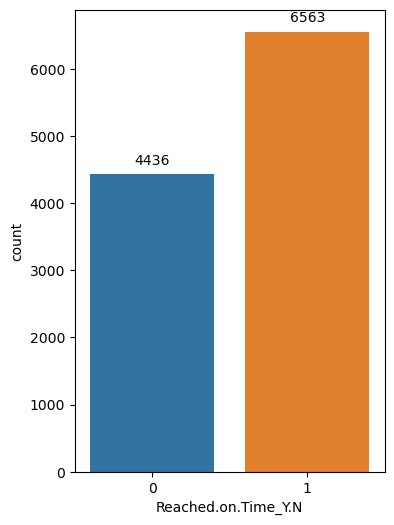

In [14]:
# Countplot target variable visualization
plt.figure(figsize=(4, 6))
ax = sns.countplot(x=df['Reached.on.Time_Y.N'], data=df)

# Add annotations
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
                textcoords='offset points')

In [15]:
df_target.describe()

Reached.on.Time_Y.N
count         10999.000000
mean              0.596691
std               0.490584
min               0.000000
25%               0.000000
50%               1.000000
75%               1.000000
max               1.000000

In [16]:
# categorize customer_rating
df['Customer_rating_category'] = df['Customer_rating'].apply(lambda x: 'bad' if x <= 2 
                                                       else 'average' if x == 3 
                                                       else 'good')

In [17]:
df['Reached_on_Time_cat'] = np.where(df['Reached.on.Time_Y.N'] == 0, 'ontime', 'delay')

In [18]:
df

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   
...                ...                  ...              ...   
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
0                    low      F                44           1233   
1                    low      M                59           3088   
2                    low      M                48           3374   
3                 medium      M                10           1177   
4                 medium      F                46           2484   
...                  ...    ...               ...            ...   
10994             medium      F                 1           1538   
10995             medium      F                 6           1247   
10996                low      F                 4           1155   
10997             medium      M                 2           1210   
10998                low      F                 6           1639   

       Reached.on.Time_Y.N Customer_rating_category Reached_on_Time_cat  
0                        1                      bad               delay  
1                        1                     good               delay  
2                        1                      bad               delay  
3                        1                  average               delay  
4                        1                      bad               delay  
...                    ...                      ...                 ...  
10994                    1                      bad               delay  
10995                    0                      bad              ontime  
10996                    0                     good              ontime  
10997                    0                      bad              ontime  
10998                    0                     good              ontime  

[10999 rows x 14 columns]

## Univariate Analysis

### Distribution of Numerical Data

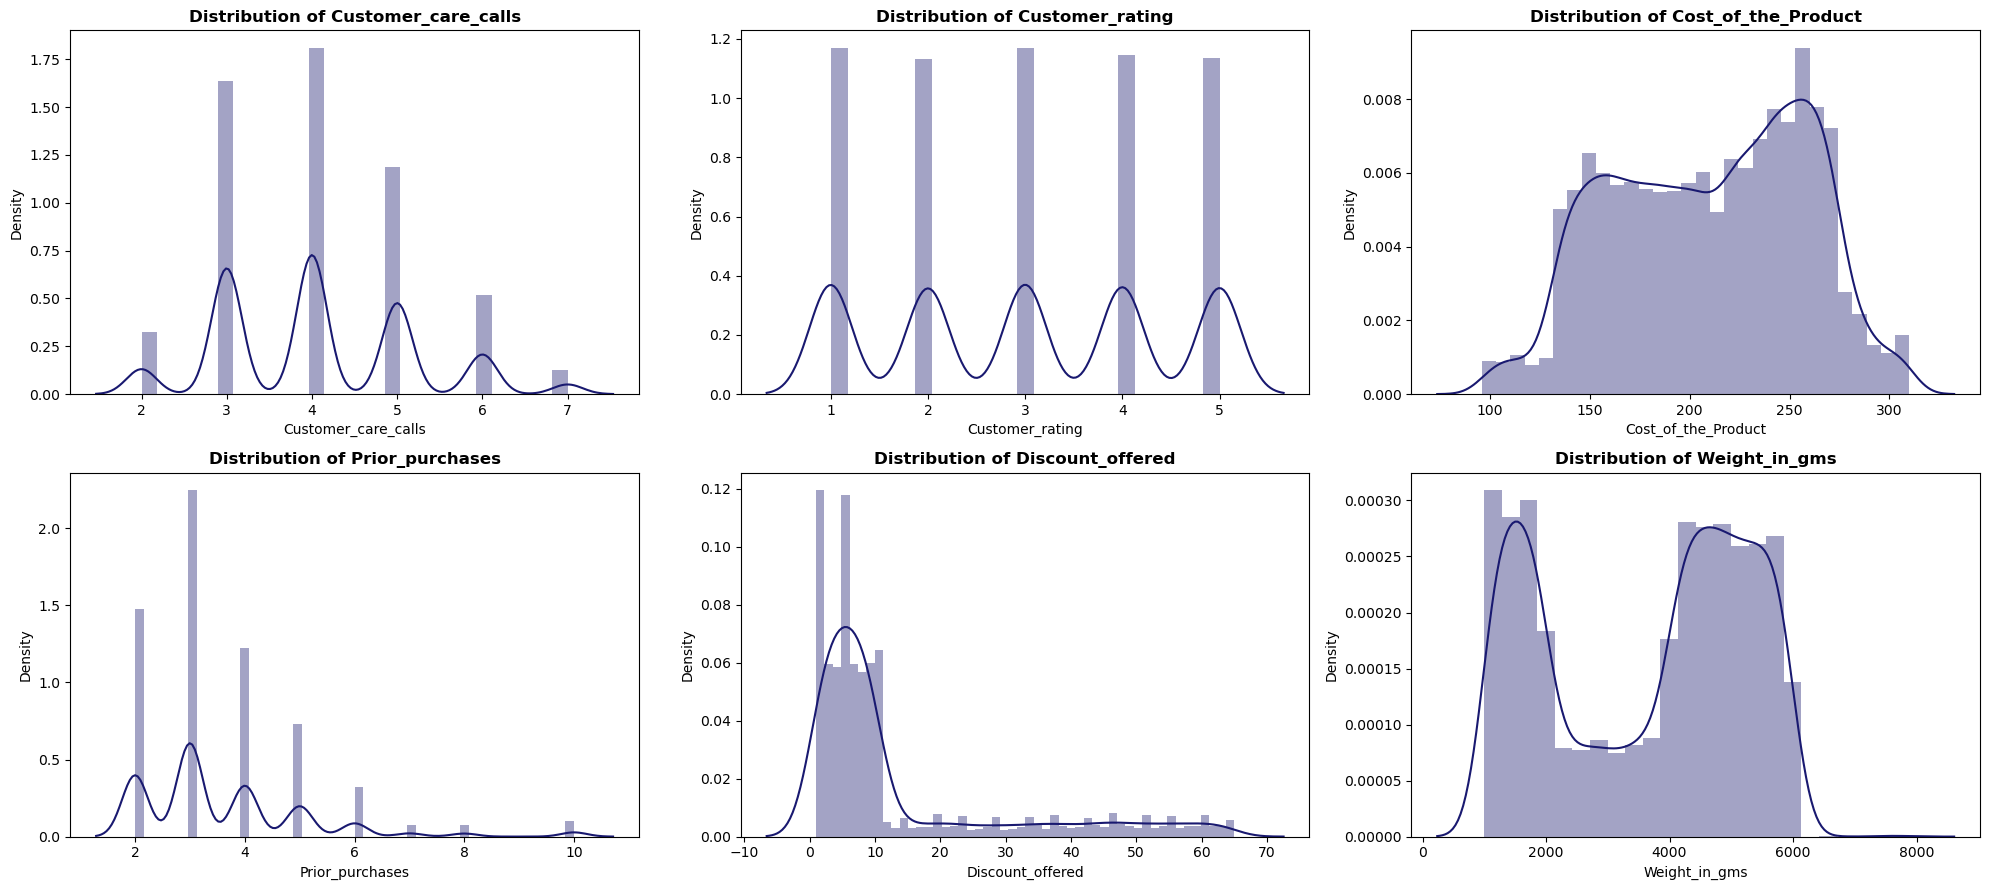

In [19]:
# adjust the figure size for better readability
plt.figure(figsize=(20,9))

# plotting distribution
features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 , i+1)
    sns.distplot(x = df[features[i]], color = 'midnightblue')
    plt.title('Distribution of ' + features[i], fontdict={'fontsize':12, 'fontweight':'bold'})
    plt.xlabel(features[i])
    plt.tight_layout()

### Detect Outliers Using Boxplot

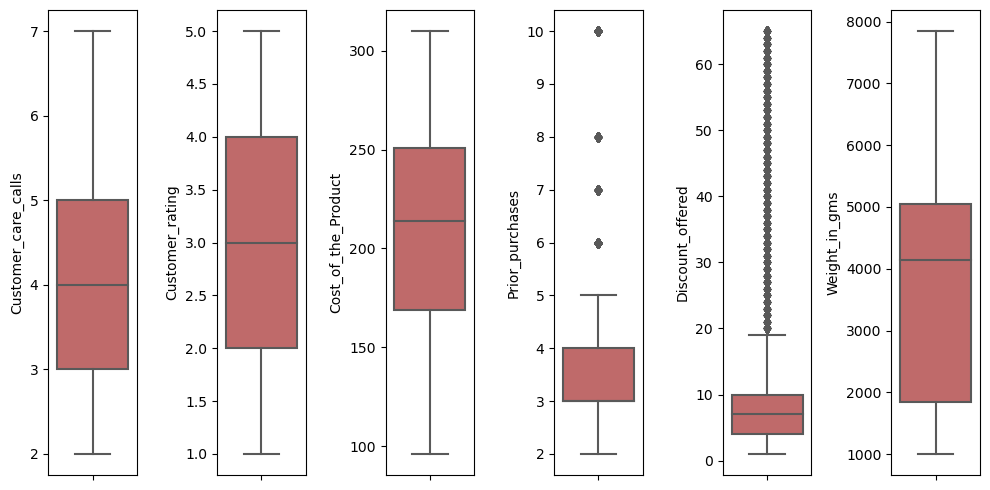

In [20]:
# Adjust the figure size for better readability
plt.figure(figsize=(10,5))

# plotting
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='indianred')
    plt.tight_layout()

### Distribution of Categorical Data

In [21]:
# Plotting distribution data (univariate analysis)
def distribution_data(features, hue):
    # adjust the figure size for better readability
    plt.figure(figsize=(12,10))
        
    # plotting distribution
    for i in range(0, len(features)):
        if len(features) % 2 == 0:
            plt.subplot(2, len(features)//2 , i+1)
        else:
            plt.subplot(2, len(features)//2+1 , i+1)
        ax = sns.countplot(x=df[features[i]], data=df, palette = 'Set2', hue=hue)
        plt.title('Distribution of ' + features[i], fontdict={'fontsize':12, 'fontweight':'bold'})
        for container in ax.containers:
            ax.bar_label(container)
        plt.xlabel(features[i])
        plt.tight_layout()

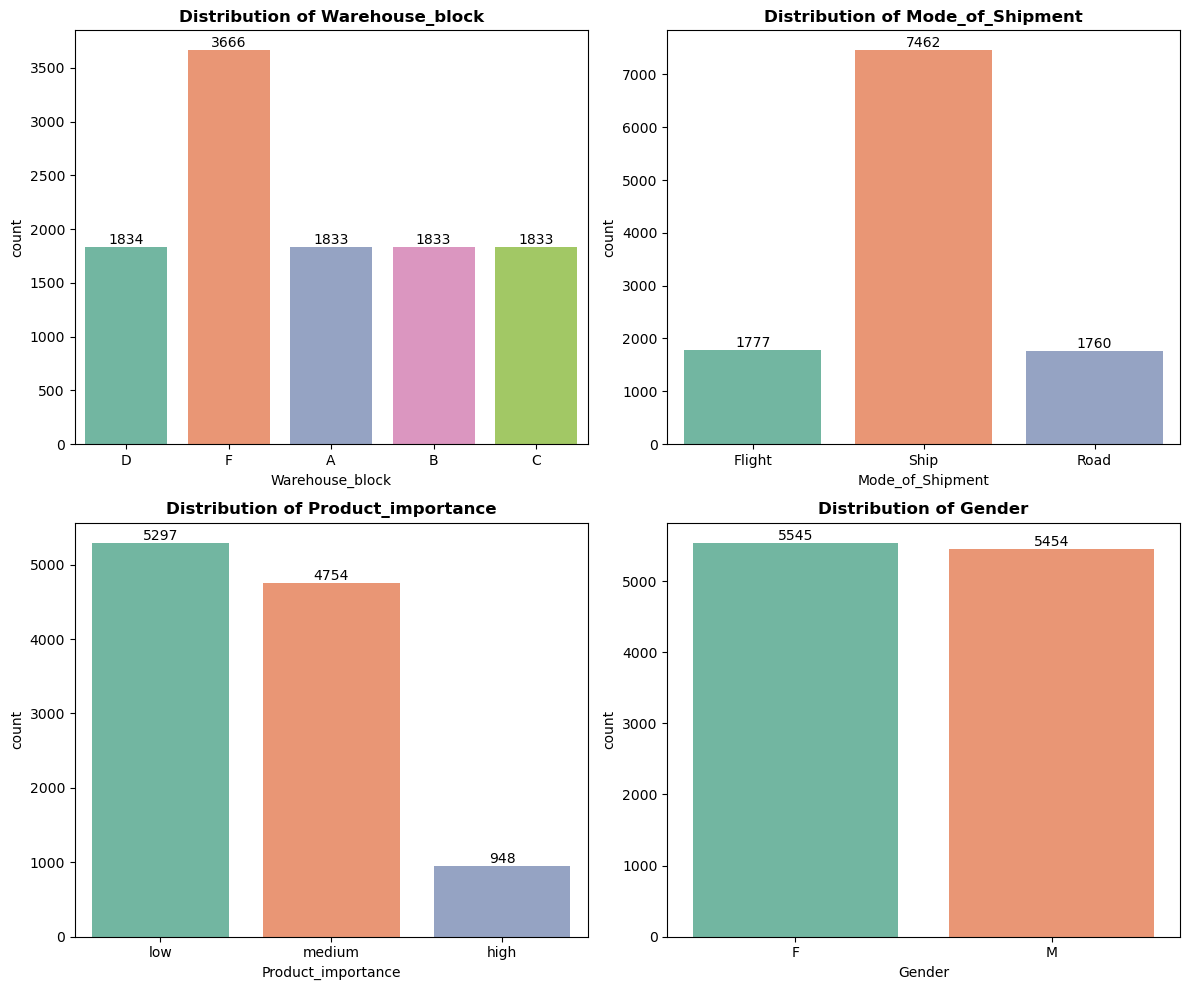

In [22]:
distribution_data(cats, None)

In [23]:
# Percentage of Total Sales Based On Feature Predictor (by ID) with Total Feature Predictor
def grouping_cats_feature(col_name, ratio_name):
    df_group = df.groupby(['Reached_on_Time_cat',col_name]).agg({'ID' : 'nunique'}).reset_index()
    df_group2 = df.groupby(col_name).agg({'ID' : 'nunique'}).reset_index() 
    df_group3 = df_group.merge(df_group2, on = col_name)
    df_group3[ratio_name] = df_group3['ID_x'] / df_group3['ID_y'] * 100
    df_group3[ratio_name] = df_group3[ratio_name].apply(lambda x: round(x,1))
    df_group3.columns = ['late', col_name, 'total_sales', 'total_uniquevalue', ratio_name]
    print(df_group3)

    # visualize grouping_cats_feature
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,2)
    ax = sns.barplot(x=col_name, y=ratio_name, data=df_group3, palette='Set2', hue='late')
    plt.title('Percentage of ' + col_name, fontdict={'fontsize':10, 'fontweight':'bold'})
    for container in ax.containers:
            ax.bar_label(container)
    plt.xlabel(col_name)

    plt.show()

In [24]:
# Percentage of Total Sales Based On Feature Predictor (by ID) with Total Target Variable
def grouping_cats_target(col_name):
    df_group = df.groupby(['Reached_on_Time_cat',col_name]).agg({'ID' : 'nunique'}).reset_index()
    df_group_late = df.groupby('Reached_on_Time_cat').agg({'ID' : 'nunique'}).reset_index()
    df_group_late2 = df_group.merge(df_group_late, on = 'Reached_on_Time_cat')
    df_group_late2['ratio_late(%)'] = df_group_late2['ID_x'] / df_group_late2['ID_y'] * 100
    df_group_late2['ratio_late(%)'] = df_group_late2['ratio_late(%)'].apply(lambda x: round(x,1))
    df_group_late2.columns = ['late', col_name, 'total_sales', 'total_late', 'ratio_late(%)']
    print(df_group_late2) 
    
    # visualize grouping_cats_target
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,2)
    ax = sns.barplot(x=col_name, y='ratio_late(%)', data=df_group_late2, palette = 'Set2', hue='late')
    plt.title('Percentage of ' + col_name + '& late', fontdict={'fontsize':10, 'fontweight':'bold'})
    for container in ax.containers:
            ax.bar_label(container)
    plt.xlabel(col_name)
    
    # Pie plot
    plt.subplot(1,2,1)
    size = df[col_name].value_counts()
    labels = size.index
    if len(labels)==2:
        colors = ['gold', 'salmon']
    if len(labels)==3:
            colors = ['gold', 'brown', 'salmon']
    if len(labels)==4:
            colors = ['gold', 'brown', 'forestgreen', 'salmon']
    if len(labels)==5:
            colors = ['gold', 'brown', 'forestgreen', 'peru', 'salmon']
    if len(labels)==6:
            colors = ['gold', 'brown', 'forestgreen', 'peru', 'plum', 'salmon']
    if len(labels)==8:
            colors = ['gold', 'brown', 'forestgreen', 'peru', 'plum', 'thistle', 'lavender', 'salmon']
    plt.pie(size, colors=colors, explode=tuple([0.1]*len(labels)), labels=labels, shadow=True, autopct='%.2f%%')
    plt.axis('off')
    plt.legend(loc='upper right')
    plt.title('Distribution of ' + col_name, fontdict={'fontsize':12, 'fontweight':'bold'})

In [25]:
# Plotting of continues data with target variable
def relation_with_target (col_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data=df, x=col_name, hue='Reached_on_Time_cat', palette='Set2')
    plt.title('Relation of '+col_name+' & Reached.on.Time_Y.N', fontdict={'fontsize':10, 'fontweight':'bold'})
    plt.show()

In [26]:
# Percentage of continuous data shipment delay
def table_num (col_name):
    bins = pd.cut(df[col_name], 10)
    df2 = pd.DataFrame(df.groupby(bins)['Reached.on.Time_Y.N'].mean())
    df2['value_count'] = (df.groupby(bins)['Reached.on.Time_Y.N'].count()/sum(df.groupby(bins)['Reached.on.Time_Y.N'].count()))
    df2.rename(columns={'Reached.on.Time_Y.N' : 'delayed_shipments'}, inplace=True)
    
    # Styling bar in table
    df2 = (df2.style.bar(subset=[df2.columns[0]], color='lightsteelblue')
                    .bar(subset=['value_count'], color='thistle')
                    .format(formatter={(df2.columns[0]):'{:,.6%}', ('value_count'):'{:,.6%}'})
          )
    return df2

### Target Variable Based On Categorical Data

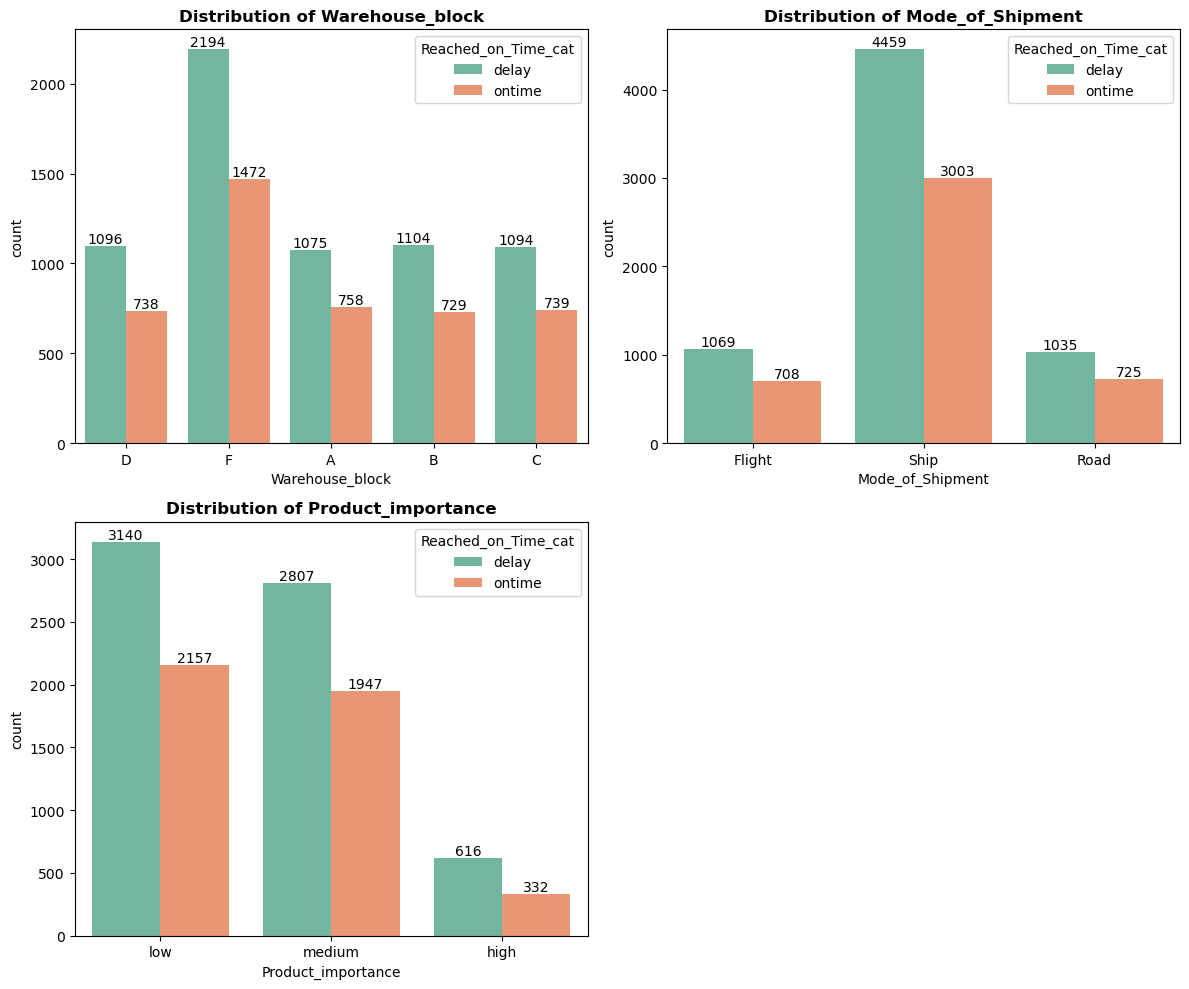

In [27]:
feat = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']
distribution_data(feat, 'Reached_on_Time_cat')

     late Warehouse_block  total_sales  total_late  ratio_late(%)
0   delay               A         1075        6563           16.4
1   delay               B         1104        6563           16.8
2   delay               C         1094        6563           16.7
3   delay               D         1096        6563           16.7
4   delay               F         2194        6563           33.4
5  ontime               A          758        4436           17.1
6  ontime               B          729        4436           16.4
7  ontime               C          739        4436           16.7
8  ontime               D          738        4436           16.6
9  ontime               F         1472        4436           33.2


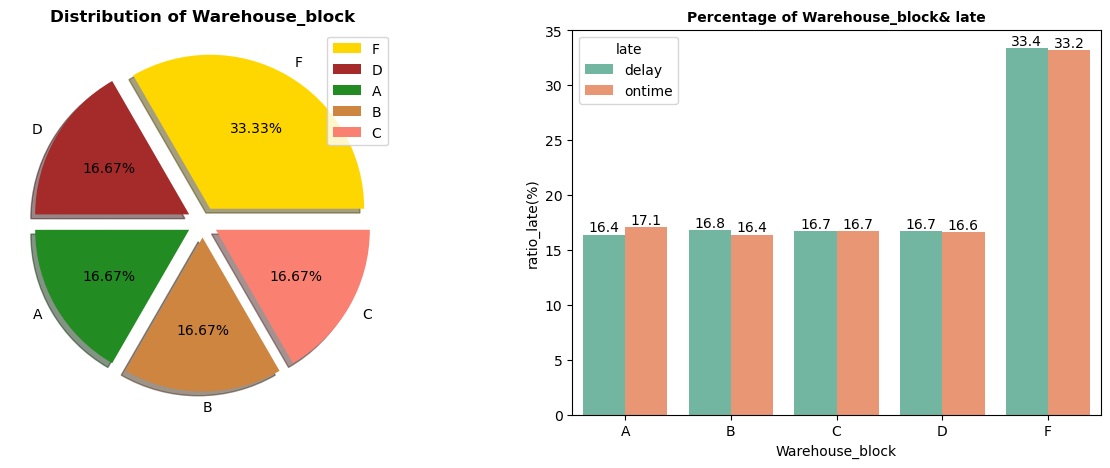

In [28]:
# Percentage of total warehouse_block based on target value
grouping_cats_target('Warehouse_block')

     late Warehouse_block  total_sales  total_uniquevalue  ratio_block(%)
0   delay               A         1075               1833            58.6
1  ontime               A          758               1833            41.4
2   delay               B         1104               1833            60.2
3  ontime               B          729               1833            39.8
4   delay               C         1094               1833            59.7
5  ontime               C          739               1833            40.3
6   delay               D         1096               1834            59.8
7  ontime               D          738               1834            40.2
8   delay               F         2194               3666            59.8
9  ontime               F         1472               3666            40.2


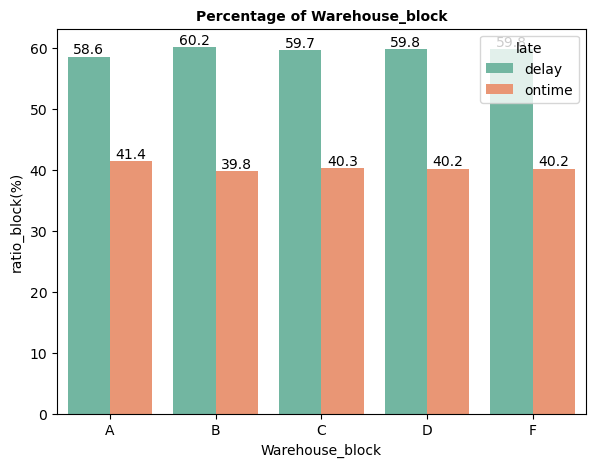

In [29]:
# Percentage of total warehouse_block based on unique value
grouping_cats_feature('Warehouse_block', 'ratio_block(%)')

     late Mode_of_Shipment  total_sales  total_late  ratio_late(%)
0   delay           Flight         1069        6563           16.3
1   delay             Road         1035        6563           15.8
2   delay             Ship         4459        6563           67.9
3  ontime           Flight          708        4436           16.0
4  ontime             Road          725        4436           16.3
5  ontime             Ship         3003        4436           67.7


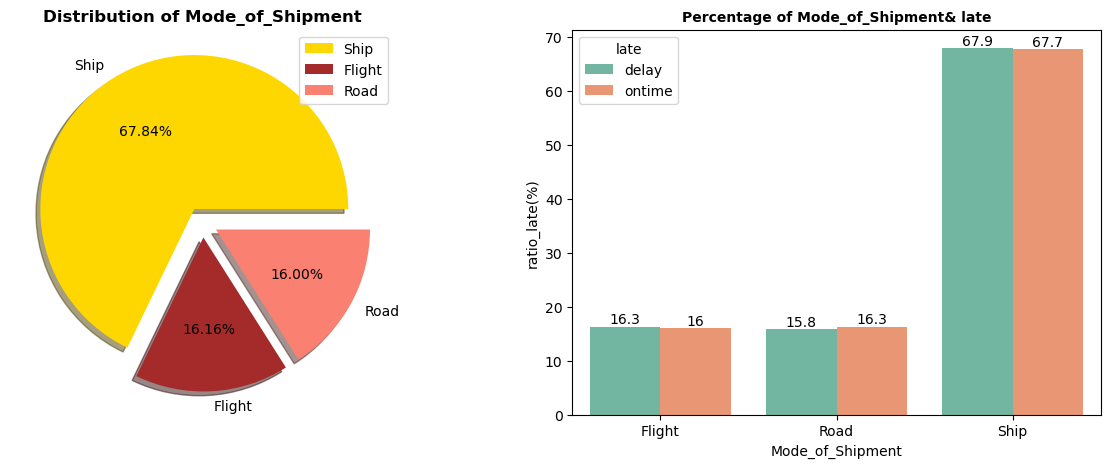

In [30]:
# Percentage of total mode_of_shipment based on target value
grouping_cats_target('Mode_of_Shipment')

     late Mode_of_Shipment  total_sales  total_uniquevalue  ratio_shipment(%)
0   delay           Flight         1069               1777               60.2
1  ontime           Flight          708               1777               39.8
2   delay             Road         1035               1760               58.8
3  ontime             Road          725               1760               41.2
4   delay             Ship         4459               7462               59.8
5  ontime             Ship         3003               7462               40.2


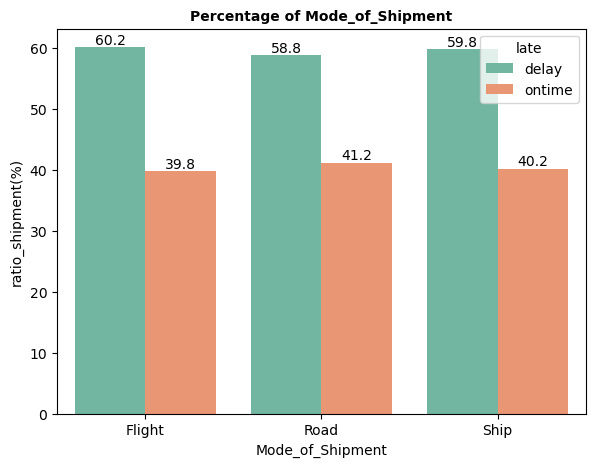

In [31]:
# Percentage of total mode_of_shipment based on unique value
grouping_cats_feature('Mode_of_Shipment', 'ratio_shipment(%)')

     late Product_importance  total_sales  total_late  ratio_late(%)
0   delay               high          616        6563            9.4
1   delay                low         3140        6563           47.8
2   delay             medium         2807        6563           42.8
3  ontime               high          332        4436            7.5
4  ontime                low         2157        4436           48.6
5  ontime             medium         1947        4436           43.9


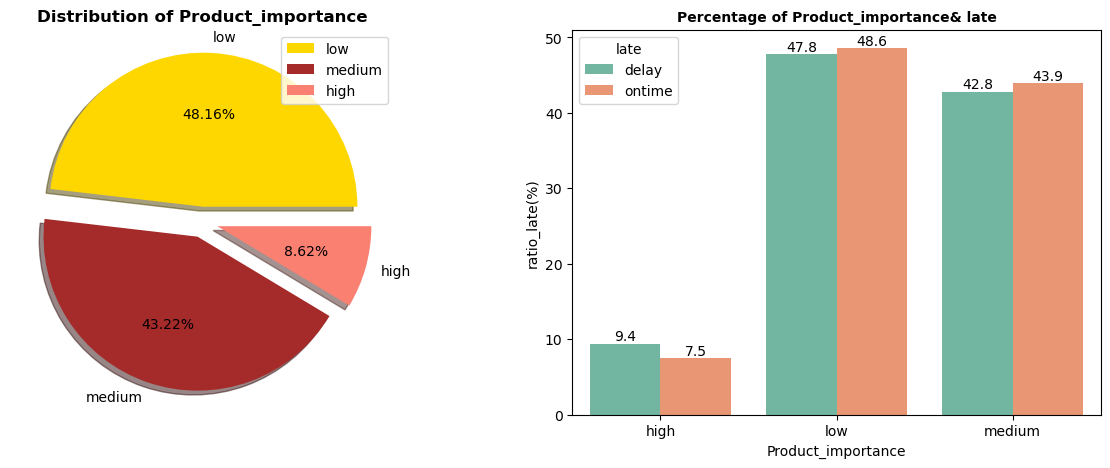

In [32]:
# Percentage of total product_importance based on target value
grouping_cats_target('Product_importance')

     late Product_importance  total_sales  total_uniquevalue  ratio_product(%)
0   delay               high          616                948              65.0
1  ontime               high          332                948              35.0
2   delay                low         3140               5297              59.3
3  ontime                low         2157               5297              40.7
4   delay             medium         2807               4754              59.0
5  ontime             medium         1947               4754              41.0


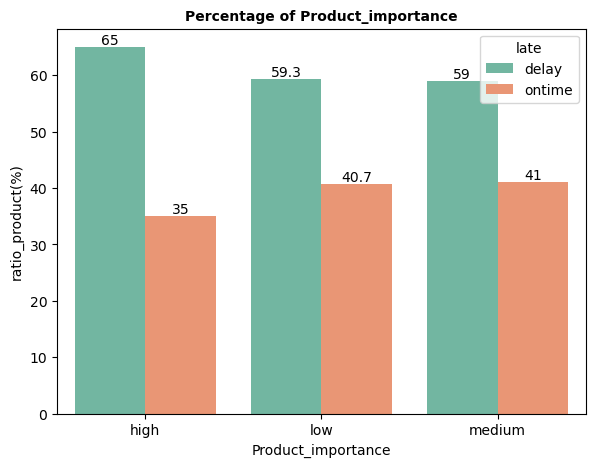

In [33]:
grouping_cats_feature('Product_importance', 'ratio_product(%)')

### Target Variable Based On Numerical Data

      late  Customer_care_calls  total_sales  total_late  ratio_late(%)
0    delay                    2          416        6563            6.3
1    delay                    3         2011        6563           30.6
2    delay                    4         2126        6563           32.4
3    delay                    5         1360        6563           20.7
4    delay                    6          523        6563            8.0
5    delay                    7          127        6563            1.9
6   ontime                    2          222        4436            5.0
7   ontime                    3         1206        4436           27.2
8   ontime                    4         1431        4436           32.3
9   ontime                    5          968        4436           21.8
10  ontime                    6          490        4436           11.0
11  ontime                    7          119        4436            2.7


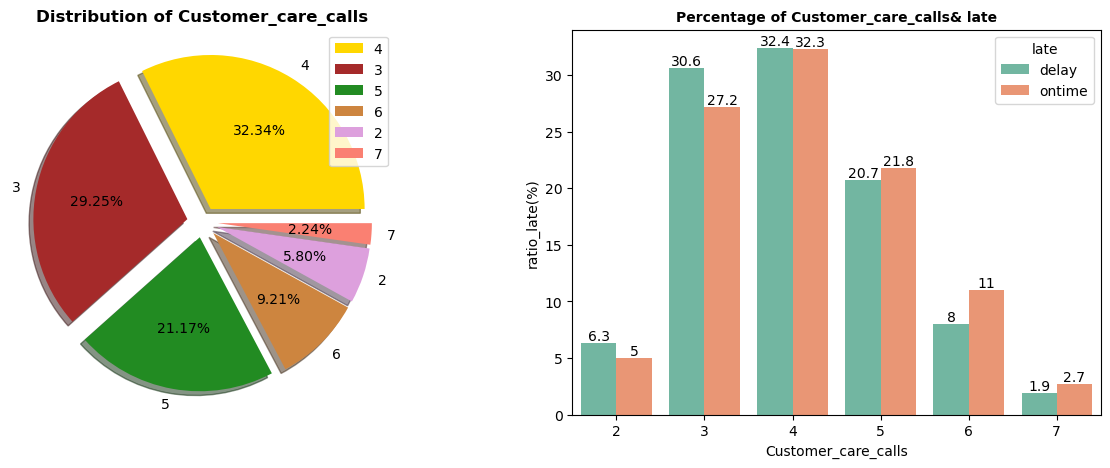

In [34]:
# Percentage of total customer_care_calls based on target value
grouping_cats_target('Customer_care_calls')

      late  Customer_care_calls  total_sales  total_uniquevalue  \
0    delay                    2          416                638   
1   ontime                    2          222                638   
2    delay                    3         2011               3217   
3   ontime                    3         1206               3217   
4    delay                    4         2126               3557   
5   ontime                    4         1431               3557   
6    delay                    5         1360               2328   
7   ontime                    5          968               2328   
8    delay                    6          523               1013   
9   ontime                    6          490               1013   
10   delay                    7          127                246   
11  ontime                    7          119                246   

    ratio_calls(%)  
0             65.2  
1             34.8  
2             62.5  
3             37.5  
4             59.8  
5 

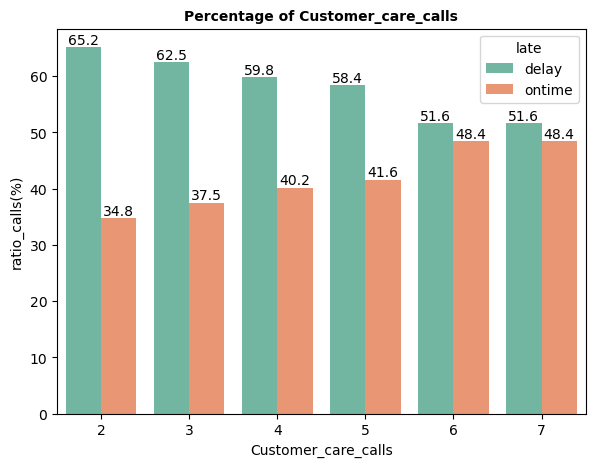

In [35]:
# Percentage of total customer_care_calls based on unique value
grouping_cats_feature('Customer_care_calls', 'ratio_calls(%)')

     late  Customer_rating  total_sales  total_late  ratio_late(%)
0   delay                1         1313        6563           20.0
1   delay                2         1273        6563           19.4
2   delay                3         1357        6563           20.7
3   delay                4         1303        6563           19.9
4   delay                5         1317        6563           20.1
5  ontime                1          922        4436           20.8
6  ontime                2          892        4436           20.1
7  ontime                3          882        4436           19.9
8  ontime                4          886        4436           20.0
9  ontime                5          854        4436           19.3


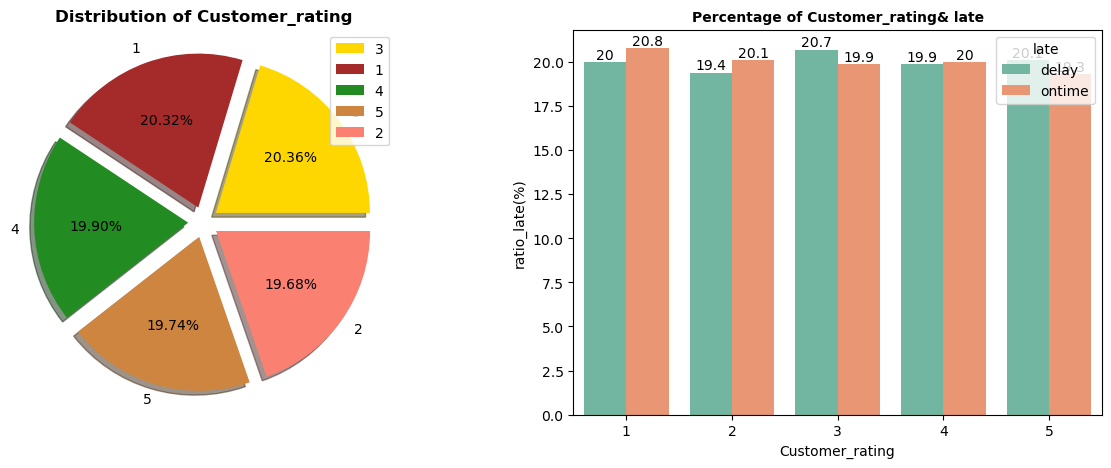

In [36]:
# Percentage of total customer_rating based on target value
grouping_cats_target('Customer_rating')

     late  Customer_rating  total_sales  total_uniquevalue  ratio_rating(%)
0   delay                1         1313               2235             58.7
1  ontime                1          922               2235             41.3
2   delay                2         1273               2165             58.8
3  ontime                2          892               2165             41.2
4   delay                3         1357               2239             60.6
5  ontime                3          882               2239             39.4
6   delay                4         1303               2189             59.5
7  ontime                4          886               2189             40.5
8   delay                5         1317               2171             60.7
9  ontime                5          854               2171             39.3


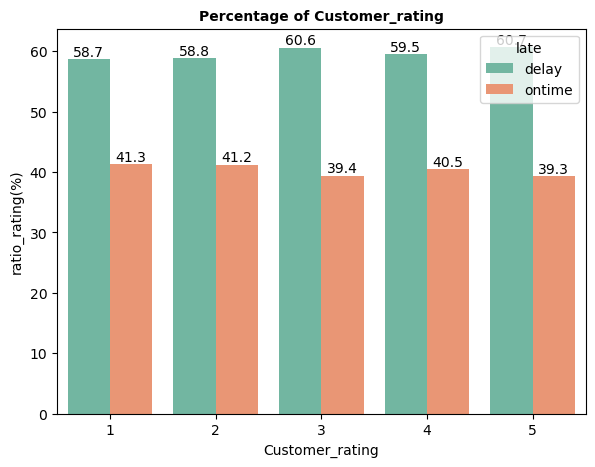

In [37]:
# Percentage of total customer_rating based on unique value
grouping_cats_feature('Customer_rating', 'ratio_rating(%)')

      late  Prior_purchases  total_sales  total_late  ratio_late(%)
0    delay                2         1625        6563           24.8
1    delay                3         2534        6563           38.6
2    delay                4         1171        6563           17.8
3    delay                5          642        6563            9.8
4    delay                6          314        6563            4.8
5    delay                7           92        6563            1.4
6    delay                8           83        6563            1.3
7    delay               10          102        6563            1.6
8   ontime                2          974        4436           22.0
9   ontime                3         1421        4436           32.0
10  ontime                4          984        4436           22.2
11  ontime                5          645        4436           14.5
12  ontime                6          247        4436            5.6
13  ontime                7           44        

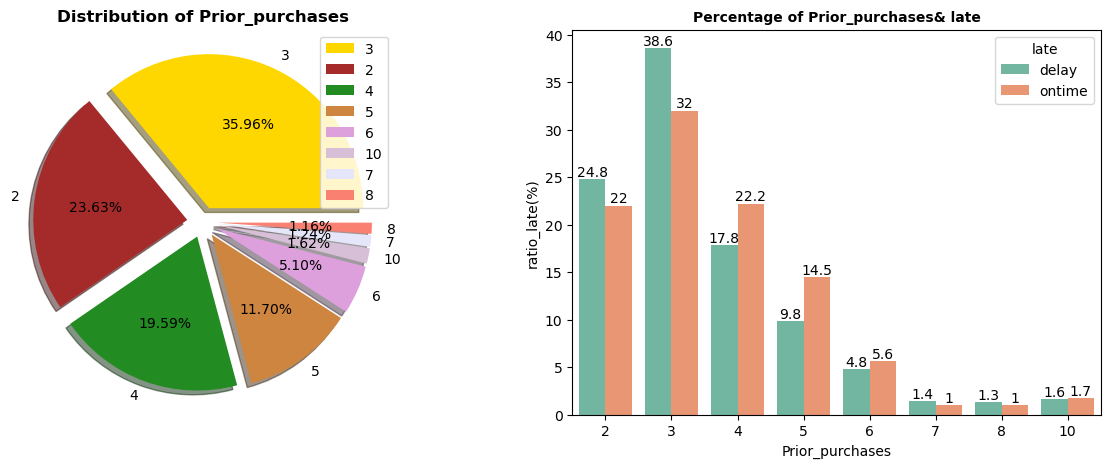

In [38]:
# Percentage of total prior_purchases based on target value
grouping_cats_target('Prior_purchases')

      late  Prior_purchases  total_sales  total_uniquevalue  \
0    delay                2         1625               2599   
1   ontime                2          974               2599   
2    delay                3         2534               3955   
3   ontime                3         1421               3955   
4    delay                4         1171               2155   
5   ontime                4          984               2155   
6    delay                5          642               1287   
7   ontime                5          645               1287   
8    delay                6          314                561   
9   ontime                6          247                561   
10   delay                7           92                136   
11  ontime                7           44                136   
12   delay                8           83                128   
13  ontime                8           45                128   
14   delay               10          102               

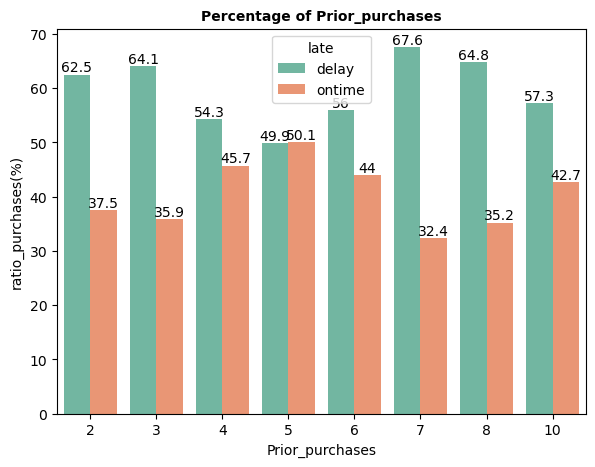

In [39]:
# Percentage of total prior_purchases based on unique value
grouping_cats_feature('Prior_purchases', 'ratio_purchases(%)')

### Which rating has an influence on delivery delays?

     late Customer_rating_category  total_sales  total_late  ratio_late(%)
0   delay                  average         1357        6563           20.7
1   delay                      bad         2586        6563           39.4
2   delay                     good         2620        6563           39.9
3  ontime                  average          882        4436           19.9
4  ontime                      bad         1814        4436           40.9
5  ontime                     good         1740        4436           39.2


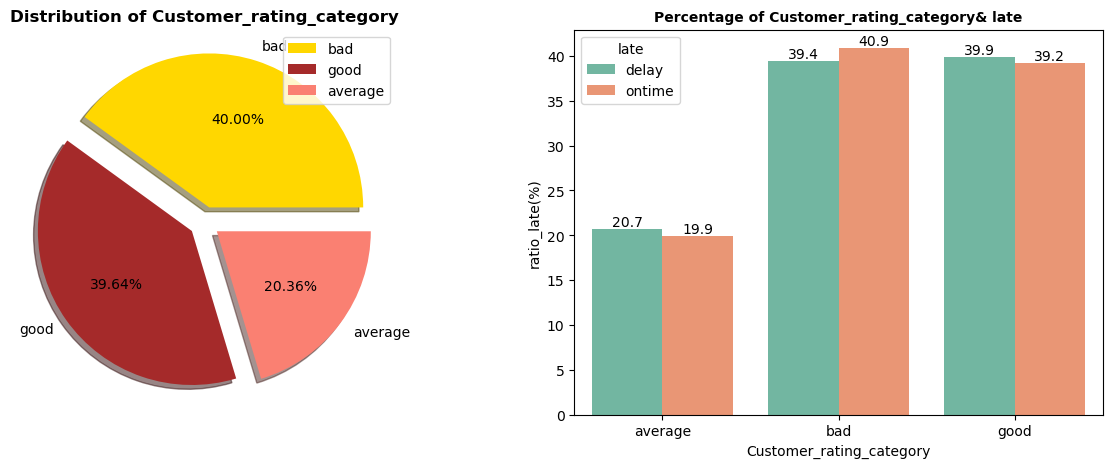

In [40]:
# Percentage of total customer_rating_category based on target value
grouping_cats_target('Customer_rating_category')

     late Customer_rating_category  total_sales  total_uniquevalue  \
0   delay                  average         1357               2239   
1  ontime                  average          882               2239   
2   delay                      bad         2586               4400   
3  ontime                      bad         1814               4400   
4   delay                     good         2620               4360   
5  ontime                     good         1740               4360   

   ratio_rating_cat(%)  
0                 60.6  
1                 39.4  
2                 58.8  
3                 41.2  
4                 60.1  
5                 39.9  


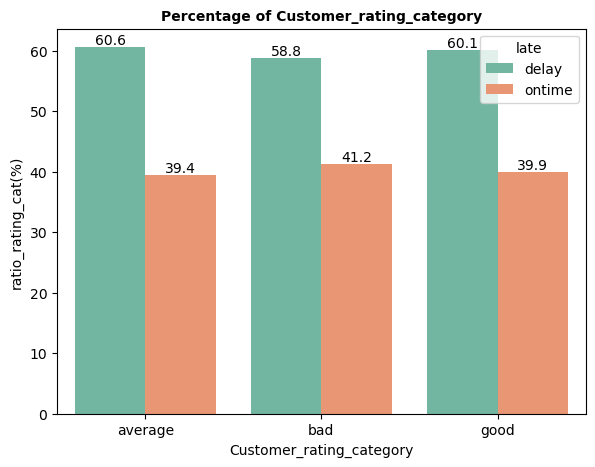

In [41]:
# Percentage of total customer_rating_category based on unique value
grouping_cats_feature('Customer_rating_category', 'ratio_rating_cat(%)')

**Observation:**

Surprisingly, bad ratings are given to shipments that tend to be on time compared to good ratings

### Which do more male or female customers spend their money on ecommerce products?

In [42]:
# Plotting distribution data (univariate analysis)
def distribution_cat_cont(data, cat, num, title, hue):
    # adjust the figure size for better readability
    plt.figure(figsize=(12,5))

    # plotting distribution
    plt.subplot(1,2,1)
    ax = sns.barplot(x=data[cat], y=data[num], data=data, palette = 'viridis', hue=hue)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(title, fontdict={'fontsize':12, 'fontweight':'bold'})
    plt.legend(loc='center')
    plt.tight_layout()

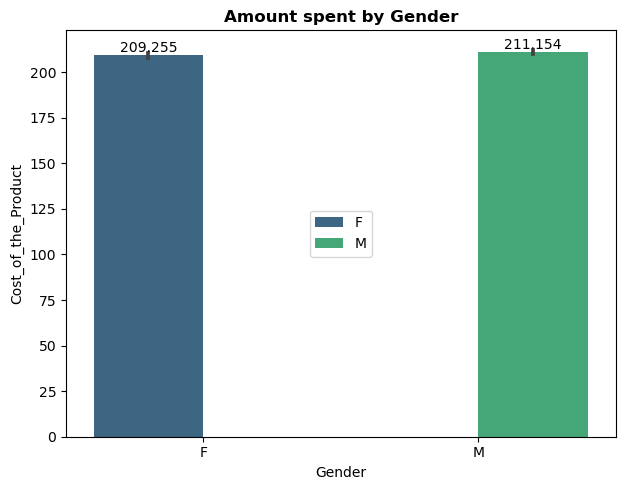

In [43]:
distribution_cat_cont(df, 'Gender', 'Cost_of_the_Product', 'Amount spent by Gender', 'Gender')

**Observation**: Both Female and Male look the same in spending money when buying a product

### Frequency and Percentage of Target Variable

   Reached.on.Time_Y.N  Frequency  Percentage
0                    1       6563       59.67
1                    0       4436       40.33


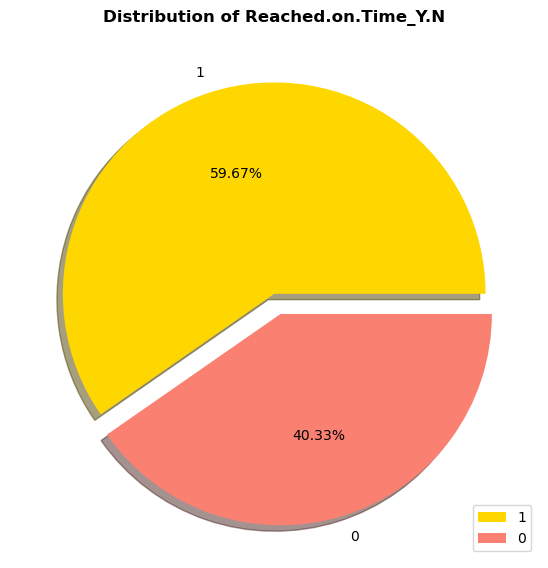

In [44]:
target = df['Reached.on.Time_Y.N'].value_counts().reset_index()
target.rename(columns={'index':'Reached.on.Time_Y.N','Reached.on.Time_Y.N':'Frequency'}, inplace=True)
target['Percentage'] = round((target['Frequency']/target['Frequency'].sum())*100,2)
print(target)

# Pie plot
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
labels = df['Reached.on.Time_Y.N'].unique()
size = df['Reached.on.Time_Y.N'].value_counts()
if len(labels)==2:
    colors = ['gold', 'salmon']
    explode = [0, 0.1]
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.axis('off')
plt.legend(loc='lower right')
plt.title('Distribution of Reached.on.Time_Y.N', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.show()

## Multivariate Analysis

In [45]:
df_drop= df.copy()

# Drop unnecessary columns
unnec_cols = ['ID']
df_drop.drop(columns = unnec_cols, inplace = True)
df_drop.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0                44           1233                    1   
1                59           3088                    1   
2                48           3374                    1   
3                10           1177                    1   
4                46           2484                    1   

  Customer_rating_category Reached_on_Time_cat  
0                      bad               delay  
1                     good               delay  
2                      bad               delay  
3                  average               delay  
4                      bad               delay

### Heatmap Correlation

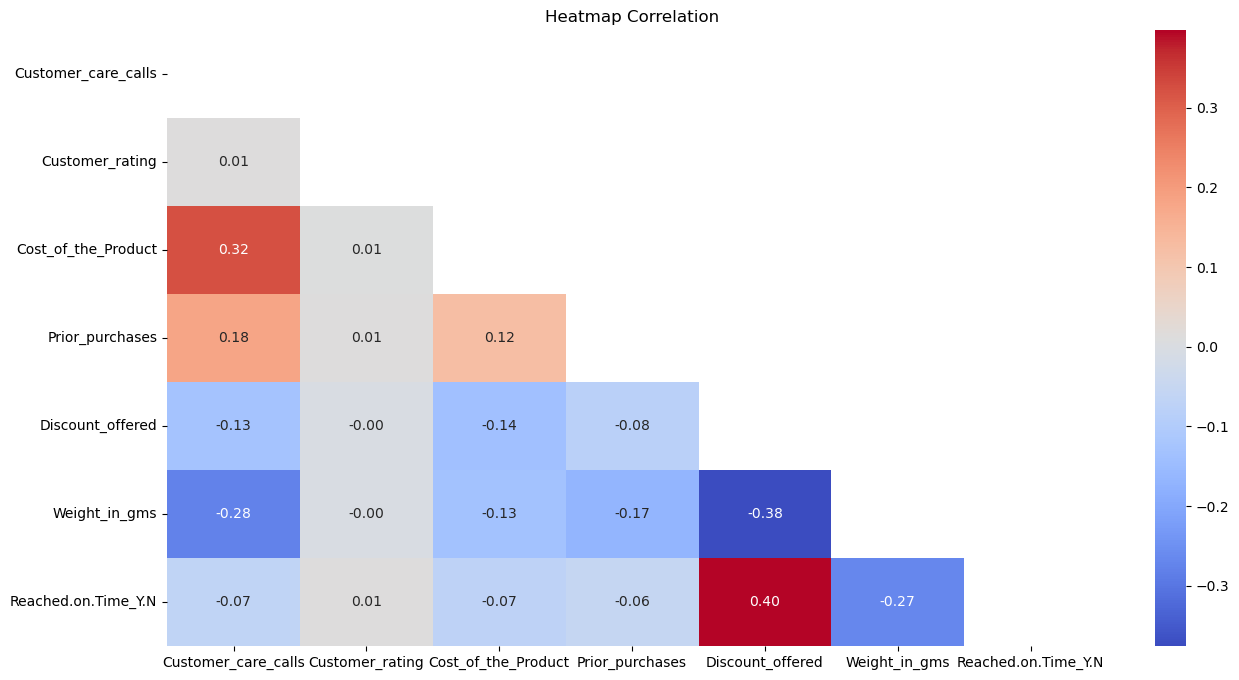

In [46]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plot the heatmap
correlation = df_drop.corr()
mask = np.triu(np.ones_like(df_drop.corr(), dtype= bool))
sns.heatmap(correlation, annot=True, mask= mask, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Correlation')
plt.show()

### Pairplot

<Figure size 1500x1500 with 0 Axes>

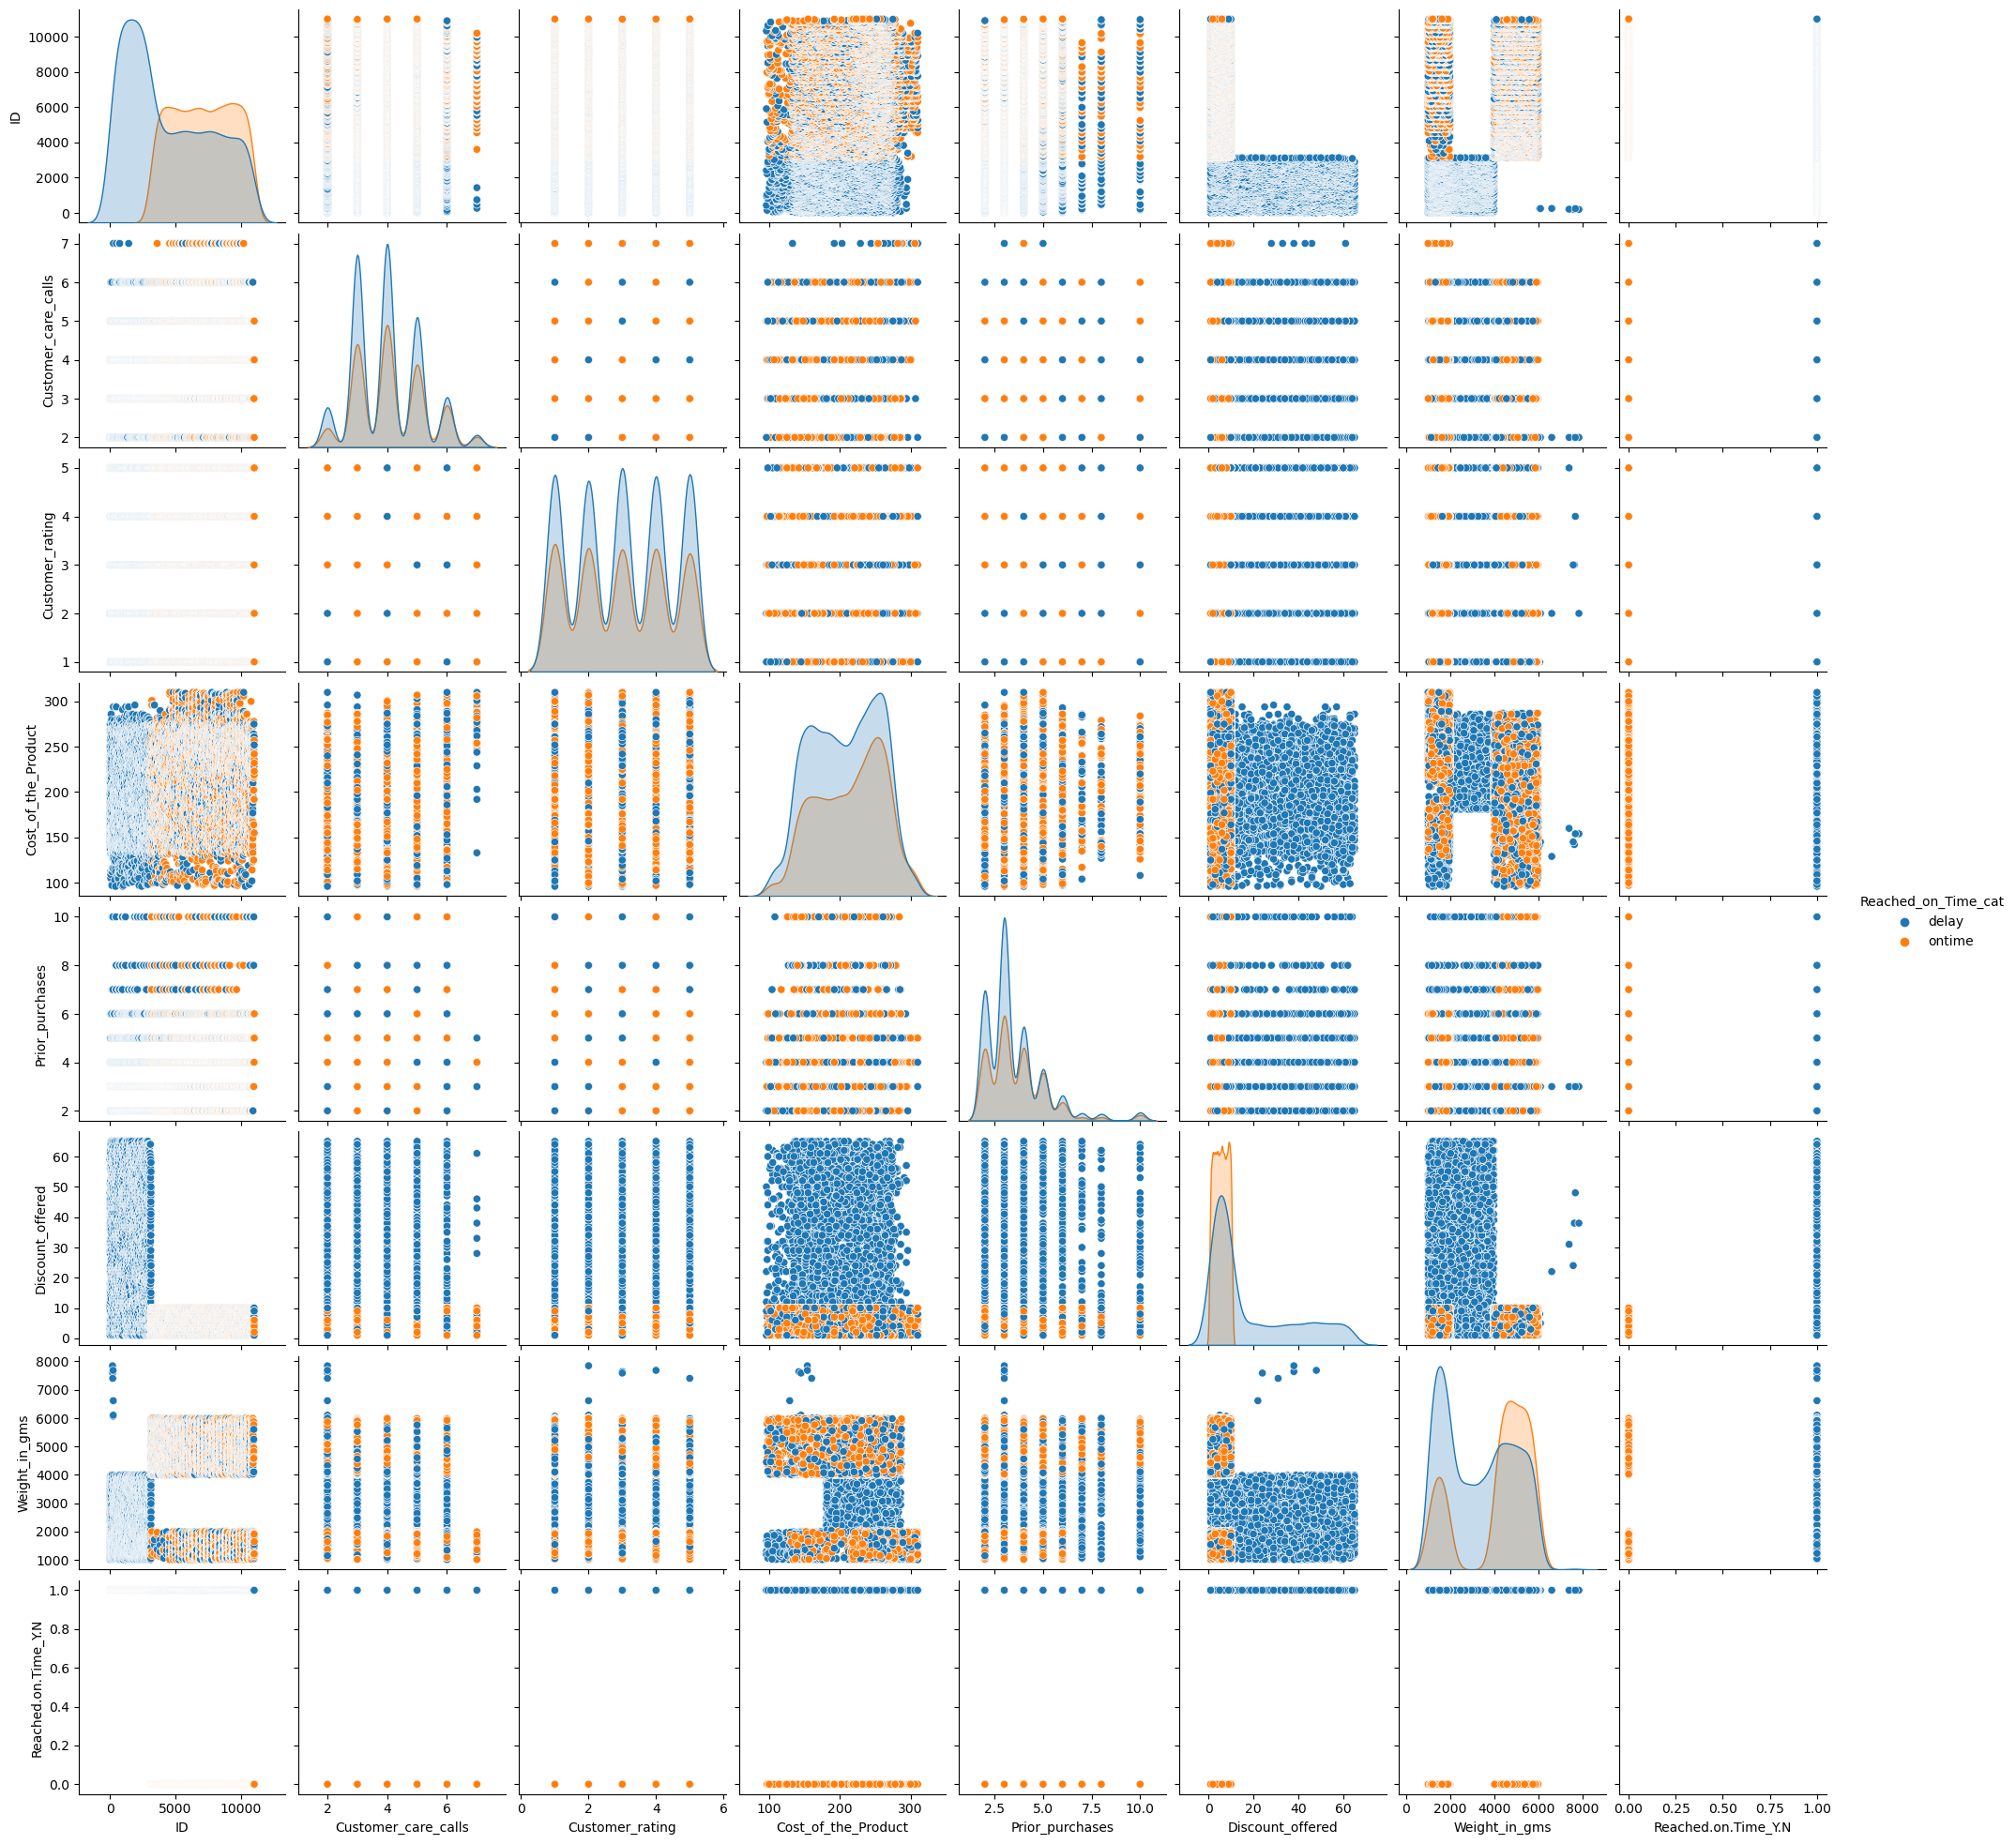

In [47]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Reached_on_Time_cat')

## Business Insight

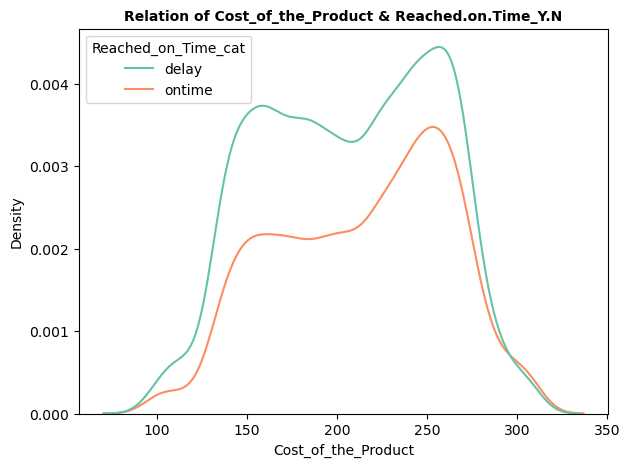

In [48]:
# Relation of cost_of_the_product with Target Variable
relation_with_target('Cost_of_the_Product')

In [49]:
table_num('Cost_of_the_Product')

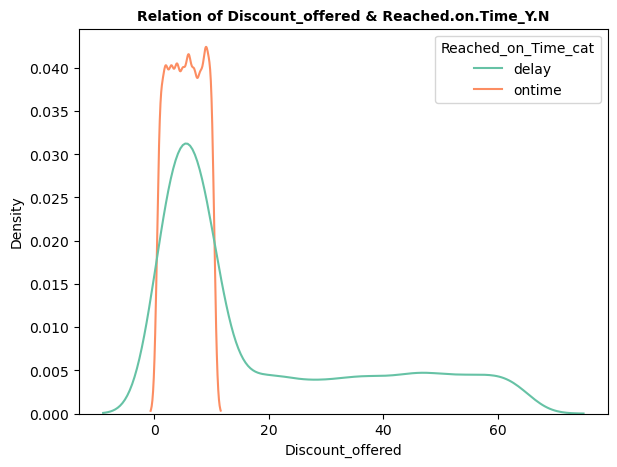

In [50]:
# Relation of discount_offered with Target Variable
relation_with_target('Discount_offered')

In [51]:
table_num('Discount_offered')

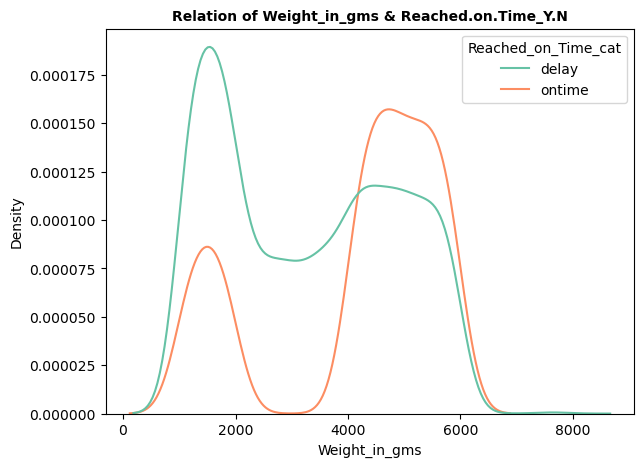

In [52]:
# Relation of weight_in_gms with Target Variable
relation_with_target('Weight_in_gms')

In [53]:
table_num('Weight_in_gms')

## Feature Selection

### Using Anova

In [54]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename)
    
    # split into input (X) and output (y) variables
    X = data[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']].values
    y = data['Reached.on.Time_Y.N'].values
    return X, y

# load the dataset
X, y = load_dataset('Train.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y , random_state=42)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (7699, 5) (7699,)
Test (3300, 5) (3300,)


In [55]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename)
    # split into input (X) and output (y) variables
    X = data[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]
    y = data['Reached.on.Time_Y.N']
    return X.values, y.values

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k= 5)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('Train.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 48.262272
Feature 1: 34.090599
Feature 2: 33.321451
Feature 3: 1456.697129
Feature 4: 587.982096


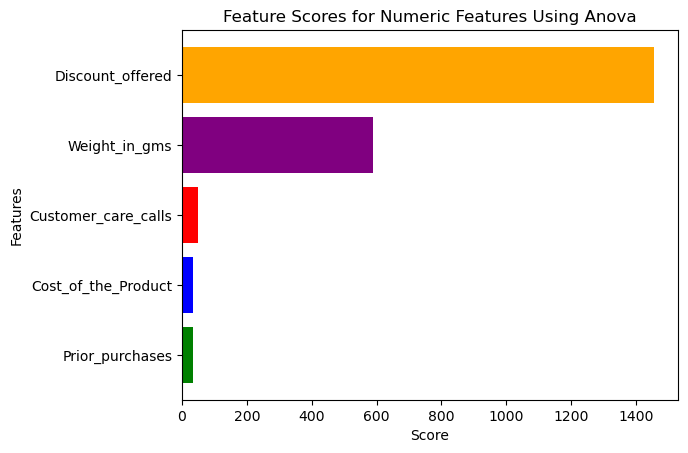

In [56]:
features = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
scores = fs.scores_
colors = ['red', 'blue', 'green', 'orange', 'purple']
idx = scores.argsort()[::1] # sorting index dari skor terbesar ke terkecil
scores_sorted = scores[idx]
features_sorted = [features[i] for i in idx]

plt.barh(features_sorted, scores_sorted, color=[colors[i] for i in idx])
plt.title('Feature Scores for Numeric Features Using Anova')
plt.xlabel('Score')
plt.ylabel('Features')

plt.show()

In [57]:
# K Feature Selection
# compare different numbers of features selected using anova f-test
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

# split dataset into features (X) and target (y)
X = df[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']]
y = df['Reached.on.Time_Y.N']

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='recall', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.700
Best Config: {'anova__k': 1}


In [58]:
# create a SelectKBest object
selector = SelectKBest(f_classif, k=1)

# fit selector to data
selector.fit(X, y)

# get selected features
selected_features = X.columns[selector.get_support()]

# display selected features
print('Selected features:', list(selected_features))

Selected features: ['Discount_offered']


### Using Chi2

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = pd.read_csv(filename)

    # encode 'Product_importance', 'Gender' using Label Encoding
    label_encoder = LabelEncoder()
    data['Product_importance'] = label_encoder.fit_transform(data['Product_importance'])
    data['Gender'] = label_encoder.fit_transform(data['Gender'])
    

    # encode 'Warehouse_block' and 'Mode_of_Shipment' using One-Hot Encoding
    encoder = OneHotEncoder(sparse=False)
    warehouse_block_encoded = encoder.fit_transform(data[['Warehouse_block']])
    mode_of_shipment_encoded = encoder.fit_transform(data[['Mode_of_Shipment']])

    # concatenate encoded column with other features
    X = np.concatenate((warehouse_block_encoded, mode_of_shipment_encoded, data[['Product_importance', 'Gender']]), axis=1)

    # split into input (X) and output (y) variables
    y = data['Reached.on.Time_Y.N'].values
    return X, y

# load the dataset
X, y = load_dataset('Train.csv')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (7699, 10) (7699,)
Test (3300, 10) (3300,)


In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = pd.read_csv(filename)

    # encode 'Product_importance'
    label_encoder = LabelEncoder()
    data['Product_importance'] = label_encoder.fit_transform(data['Product_importance'])

    # encode 'Warehouse_block' and 'Mode_of_Shipment' using One-Hot Encoding
    encoder = OneHotEncoder(sparse=False)
    warehouse_block_encoded = encoder.fit_transform(data[['Warehouse_block']])
    mode_of_shipment_encoded = encoder.fit_transform(data[['Mode_of_Shipment']])

    # concatenate encoded columns with other features
    X = np.concatenate((warehouse_block_encoded, mode_of_shipment_encoded, np.expand_dims(data['Product_importance'], axis=1)), axis=1)

    # split into input (X) and output (y) variables
    y = data['Reached.on.Time_Y.N'].values
    return X, y

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=chi2, k= 5)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
    
# load the dataset
X, y = load_dataset('Train.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.022761
Feature 1: 0.275723
Feature 2: 2.053119
Feature 3: 0.313279
Feature 4: 0.017016
Feature 5: 0.141221
Feature 6: 0.333856
Feature 7: 0.008805
Feature 8: 2.900920


In [61]:
# K Feature Selection
X = df[['Warehouse_block','Mode_of_Shipment','Product_importance']]
y = df['Reached.on.Time_Y.N']

X = pd.get_dummies(X, columns=X.columns)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
chisquare = SelectKBest(score_func=chi2)
pipeline = Pipeline(steps=[('chi2',chisquare), ('lr', model)])
# define the grid
grid = dict()
grid['chi2__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='recall', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 1.000
Best Config: {'chi2__k': 1}


In [62]:
# create a SelectKBest object
selector = SelectKBest(chi2, k=1)

# fit selector to data
selector.fit(X, y)

# get selected features
selected_features = X.columns[selector.get_support()]

# display selected features
print('Selected features:', list(selected_features))

Selected features: ['Product_importance_high']


# Stage 2 - Pre-Processing - E Commerce Shipping

In [63]:
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0                44           1233                    1   
1                59           3088                    1   
2                48           3374                    1   
3                10           1177                    1   
4                46           2484                    1   

  Customer_rating_category Reached_on_Time_cat  
0                      bad               delay  
1                     good               delay  
2                      bad               delay  
3                  average               delay  
4                      bad               delay

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        10999 non-null  int64 
 1   Warehouse_block           10999 non-null  object
 2   Mode_of_Shipment          10999 non-null  object
 3   Customer_care_calls       10999 non-null  int64 
 4   Customer_rating           10999 non-null  int64 
 5   Cost_of_the_Product       10999 non-null  int64 
 6   Prior_purchases           10999 non-null  int64 
 7   Product_importance        10999 non-null  object
 8   Gender                    10999 non-null  object
 9   Discount_offered          10999 non-null  int64 
 10  Weight_in_gms             10999 non-null  int64 
 11  Reached.on.Time_Y.N       10999 non-null  int64 
 12  Customer_rating_category  10999 non-null  object
 13  Reached_on_Time_cat       10999 non-null  object
dtypes: int64(8), object(6)

## Data Cleansing

In [65]:
# Missing Value Check
df.isna().sum()

ID                          0
Warehouse_block             0
Mode_of_Shipment            0
Customer_care_calls         0
Customer_rating             0
Cost_of_the_Product         0
Prior_purchases             0
Product_importance          0
Gender                      0
Discount_offered            0
Weight_in_gms               0
Reached.on.Time_Y.N         0
Customer_rating_category    0
Reached_on_Time_cat         0
dtype: int64

In [66]:
# Check Duplicates Data
df.duplicated().sum()

0

**Observation:**

1. No Missing Value Data Found
2. No Duplicate Data Found

In [67]:
#Pengelompokan kolom berdasarkan jenisnya
number = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Customer_rating', 'Reached.on.Time_Y.N']
category = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Customer_rating_category', 'Reached_on_Time_cat']

## Feature Encoding

In [68]:
#Melihat value setiap variabel/feature 
category_encoding = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for column in category_encoding:
  print(f"Value counts of \033[1m{column}\033[0m column")
  print(df[column].value_counts())
  print('---'*10, '\n')

Value counts of Warehouse_block column
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
------------------------------ 

Value counts of Mode_of_Shipment column
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
------------------------------ 

Value counts of Product_importance column
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
------------------------------ 

Value counts of Gender column
F    5545
M    5454
Name: Gender, dtype: int64
------------------------------ 



### Label Encoding

In [69]:
#Label encoding
mapping_gender = {
    'F' : 0,
    'M' : 1
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

df['Gender_num'] = df['Gender'].map(mapping_gender)
df['Product_importance_num'] = df['Product_importance'].map(mapping_product_importance)

In [70]:
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0                44           1233                    1   
1                59           3088                    1   
2                48           3374                    1   
3                10           1177                    1   
4                46           2484                    1   

  Customer_rating_category Reached_on_Time_cat  Gender_num  \
0                      bad               delay           0   
1                     good               delay           1   
2                      bad               delay           1   
3                  average               delay           1   
4                      bad               delay           0   

   Product_importance_num  
0                       0  
1                       0  
2                       0  
3                       1  
4                       1

### One Hot Encoding

In [71]:
#One hot encoding

for cat in ['Warehouse_block', 'Mode_of_Shipment']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [72]:
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  ...  Gender_num  Product_importance_num  \
0                44  ...           0                       0   
1                59  ...           1                       0   
2                48  ...           1                       0   
3                10  ...           1                       1   
4                46  ...           0                       1   

  Warehouse_block_A Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  \
0                 0                 0                  0                  1   
1                 0                 0                  0                  0   
2                 1                 0                  0                  0   
3                 0                 1                  0                  0   
4                 0                 0                  1                  0   

   Warehouse_block_F  Mode_of_Shipment_Flight  Mode_of_Shipment_Road  \
0                  0                        1                      0   
1                  1                        1                      0   
2                  0                        1                      0   
3                  0                        1                      0   
4                  0                        1                      0   

   Mode_of_Shipment_Ship  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 24 columns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        10999 non-null  int64 
 1   Warehouse_block           10999 non-null  object
 2   Mode_of_Shipment          10999 non-null  object
 3   Customer_care_calls       10999 non-null  int64 
 4   Customer_rating           10999 non-null  int64 
 5   Cost_of_the_Product       10999 non-null  int64 
 6   Prior_purchases           10999 non-null  int64 
 7   Product_importance        10999 non-null  object
 8   Gender                    10999 non-null  object
 9   Discount_offered          10999 non-null  int64 
 10  Weight_in_gms             10999 non-null  int64 
 11  Reached.on.Time_Y.N       10999 non-null  int64 
 12  Customer_rating_category  10999 non-null  object
 13  Reached_on_Time_cat       10999 non-null  object
 14  Gender_num            

In [74]:
df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
count     10999.000000      10999.000000   10999.000000         10999.000000   
mean          3.567597         13.373216    3634.016729             0.596691   
std           1.522860         16.205527    1635.377251             0.490584   
min           2.000000          1.000000    1001.000000             0.000000   
25%           3.000000          4.000000    1839.500000             0.000000   
50%           3.000000          7.000000    4149.000000             1.000000   
75%           4.000000         10.000000    5050.000000             1.000000   
max          10.000000         65.000000    7846.000000             1.000000   

         Gender_num  Product_importance_num  Warehouse_block_A  \
count  10999.000000            10999.000000       10999.000000   
mean       0.495863                0.604600           0.166652   
std        0.500006                0.641464           0.372681   
min        0.000000                0.000000           0.000000   
25%        0.000000                0.000000           0.000000   
50%        0.000000                1.000000           0.000000   
75%        1.000000                1.000000           0.000000   
max        1.000000                2.000000           1.000000   

       Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  \
count       10999.000000       10999.000000       10999.000000   
mean            0.166652           0.166652           0.166742   
std             0.372681           0.372681           0.372763   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       Warehouse_block_F  Mode_of_Shipment_Flight  Mode_of_Shipment_Road  \
count       10999.000000             10999.000000           10999.000000   
mean            0.333303                 0.161560               0.160015   
std             0.471415                 0.368064               0.366636   
min             0.000000                 0.000000               0.000000   
25%             0.000000                 0.000000               0.000000   
50%             0.000000                 0.000000               0.000000   
75%             1.000000                 0.000000               0.000000   
max             1.000000                 1.000000               1.000000   

       Mode_of_Shipment_Ship  
count           10999.000000  
mean                0.678425  
std                 0.467102  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%                 1.000000  
max                 1.000000

## Scaling

### Normalization

In [75]:
from sklearn.preprocessing import MinMaxScaler
# semua variabel numerik coba kita re-scale
df['norm_Customer_care_calls'] = MinMaxScaler().fit_transform(df['Customer_care_calls'].values.reshape(len(df), 1))
df['norm_Cost_of_the_Product'] = MinMaxScaler().fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))
df['norm_Prior_purchases'] = MinMaxScaler().fit_transform(df['Prior_purchases'].values.reshape(len(df), 1))
df['norm_Discount_offered'] = MinMaxScaler().fit_transform(df['Discount_offered'].values.reshape(len(df), 1))
df['norm_Weight_in_gms'] = MinMaxScaler().fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))

In [76]:
df[{'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
             'norm_Customer_care_calls', 'norm_Cost_of_the_Product', 'norm_Prior_purchases', 'norm_Discount_offered', 'norm_Weight_in_gms'}].describe()

Customer_care_calls  Cost_of_the_Product  norm_Cost_of_the_Product  \
count         10999.000000         10999.000000              10999.000000   
mean              4.054459           210.196836                  0.533630   
std               1.141490            48.063272                  0.224595   
min               2.000000            96.000000                  0.000000   
25%               3.000000           169.000000                  0.341121   
50%               4.000000           214.000000                  0.551402   
75%               5.000000           251.000000                  0.724299   
max               7.000000           310.000000                  1.000000   

       norm_Discount_offered  Prior_purchases  Discount_offered  \
count           10999.000000     10999.000000      10999.000000   
mean                0.193331         3.567597         13.373216   
std                 0.253211         1.522860         16.205527   
min                 0.000000         2.000000          1.000000   
25%                 0.046875         3.000000          4.000000   
50%                 0.093750         3.000000          7.000000   
75%                 0.140625         4.000000         10.000000   
max                 1.000000        10.000000         65.000000   

       norm_Prior_purchases  norm_Customer_care_calls  Weight_in_gms  \
count          10999.000000              10999.000000   10999.000000   
mean               0.195950                  0.410892    3634.016729   
std                0.190358                  0.228298    1635.377251   
min                0.000000                  0.000000    1001.000000   
25%                0.125000                  0.200000    1839.500000   
50%                0.125000                  0.400000    4149.000000   
75%                0.250000                  0.600000    5050.000000   
max                1.000000                  1.000000    7846.000000   

       norm_Weight_in_gms  
count        10999.000000  
mean             0.384663  
std              0.238916  
min              0.000000  
25%              0.122498  
50%              0.459898  
75%              0.591527  
max              1.000000

### Standarization

In [77]:
from sklearn.preprocessing import StandardScaler
# semua variabel numerik coba kita standardisasi
df['std_Customer_care_calls'] = StandardScaler().fit_transform(df['Customer_care_calls'].values.reshape(len(df), 1))
df['std_Cost_of_the_Product'] = StandardScaler().fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))
df['std_Prior_purchases'] = StandardScaler().fit_transform(df['Prior_purchases'].values.reshape(len(df), 1))
df['std_Discount_offered'] = StandardScaler().fit_transform(df['Discount_offered'].values.reshape(len(df), 1))
df['std_Weight_in_gms'] = StandardScaler().fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))

In [78]:
df[{'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
             'std_Customer_care_calls', 'std_Cost_of_the_Product', 'std_Prior_purchases', 'std_Discount_offered', 'std_Weight_in_gms'}].describe()

std_Prior_purchases  Customer_care_calls  std_Discount_offered  \
count         1.099900e+04         10999.000000          1.099900e+04   
mean         -2.067221e-17             4.054459         -4.134443e-17   
std           1.000045e+00             1.141490          1.000045e+00   
min          -1.029424e+00             2.000000         -7.635530e-01   
25%          -3.727348e-01             3.000000         -5.784225e-01   
50%          -3.727348e-01             4.000000         -3.932921e-01   
75%           2.839543e-01             5.000000         -2.081616e-01   
max           4.224088e+00             7.000000          3.185896e+00   

       Cost_of_the_Product  std_Customer_care_calls  std_Cost_of_the_Product  \
count         10999.000000             1.099900e+04             1.099900e+04   
mean            210.196836             2.325624e-16            -1.343694e-16   
std              48.063272             1.000045e+00             1.000045e+00   
min              96.000000            -1.799887e+00            -2.376077e+00   
25%             169.000000            -9.237994e-01            -8.571765e-01   
50%             214.000000            -4.771132e-02             7.913188e-02   
75%             251.000000             8.283768e-01             8.489855e-01   
max             310.000000             2.580553e+00             2.076590e+00   

       Prior_purchases  Discount_offered  Weight_in_gms  std_Weight_in_gms  
count     10999.000000      10999.000000   10999.000000       1.099900e+04  
mean          3.567597         13.373216    3634.016729      -1.188652e-16  
std           1.522860         16.205527    1635.377251       1.000045e+00  
min           2.000000          1.000000    1001.000000      -1.610109e+00  
25%           3.000000          4.000000    1839.500000      -1.097360e+00  
50%           3.000000          7.000000    4149.000000       3.149161e-01  
75%           4.000000         10.000000    5050.000000       8.658844e-01  
max          10.000000         65.000000    7846.000000       2.575659e+00

### Log Transformation

<Axes: xlabel='Discount_offered', ylabel='Density'>

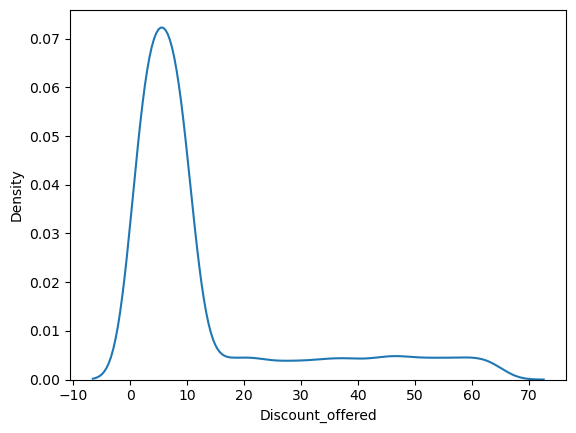

In [79]:
#distribusi Discount_Offered (nilai asli)
sns.kdeplot(df['Discount_offered'])

<Axes: xlabel='Discount_offered', ylabel='Density'>

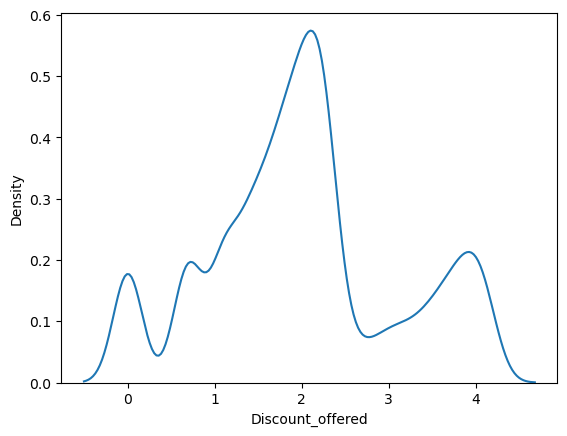

In [80]:
#distribusi Discount_Offered (setelah log transformation)
sns.kdeplot(np.log(df['Discount_offered']))

<Axes: xlabel='Prior_purchases', ylabel='Density'>

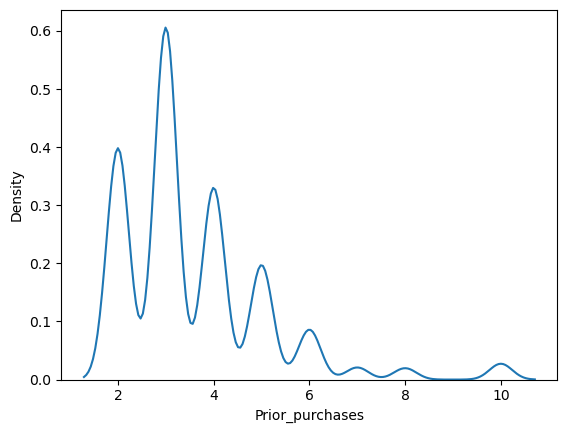

In [81]:
#distribusi Prior_Purchases (nilai asli)
sns.kdeplot(df['Prior_purchases'])

<Axes: xlabel='Prior_purchases', ylabel='Density'>

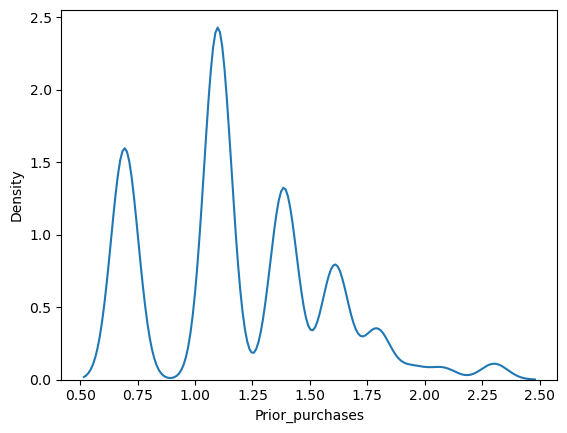

In [82]:
#distribusi Prior_Purchases (setelah log transformation)
sns.kdeplot(np.log(df['Prior_purchases']))

In [83]:
# Tranformasi log
df['log_Discount_offered'] = np.log(df['Discount_offered'])
df['log_Prior_purchases'] = np.log(df['Prior_purchases'])

In [84]:
df[{'Discount_offered', 'log_Discount_offered', 'Prior_purchases', 'log_Prior_purchases'}].describe()

log_Prior_purchases  Prior_purchases  Discount_offered  \
count         10999.000000     10999.000000      10999.000000   
mean              1.195669         3.567597         13.373216   
std               0.379769         1.522860         16.205527   
min               0.693147         2.000000          1.000000   
25%               1.098612         3.000000          4.000000   
50%               1.098612         3.000000          7.000000   
75%               1.386294         4.000000         10.000000   
max               2.302585        10.000000         65.000000   

       log_Discount_offered  
count          10999.000000  
mean               1.998420  
std                1.083692  
min                0.000000  
25%                1.386294  
50%                1.945910  
75%                2.302585  
max                4.174387

<Axes: xlabel='Weight_in_gms', ylabel='Density'>

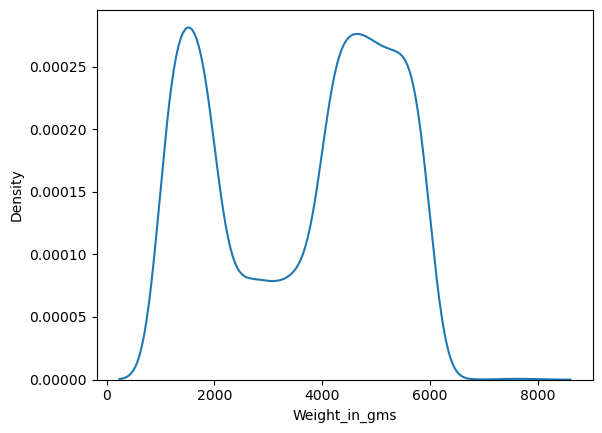

In [85]:
sns.kdeplot(df['Weight_in_gms'])

<Axes: xlabel='Weight_in_gms', ylabel='Density'>

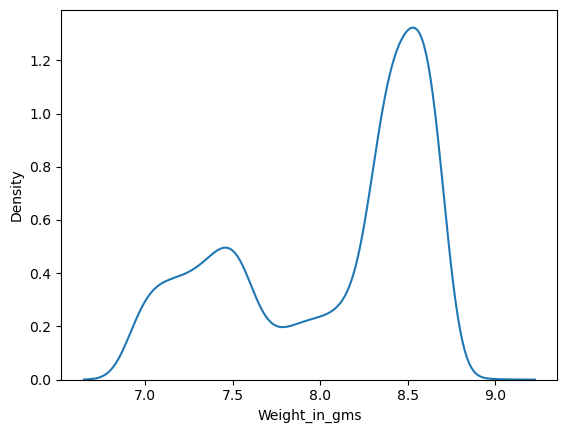

In [86]:
sns.kdeplot(np.log(df['Weight_in_gms']))

In [87]:
# root square Weight_in_gms
df['rts_Weight_in_gms'] = np.sqrt(df['Weight_in_gms'])

<Axes: xlabel='rts_Weight_in_gms', ylabel='Density'>

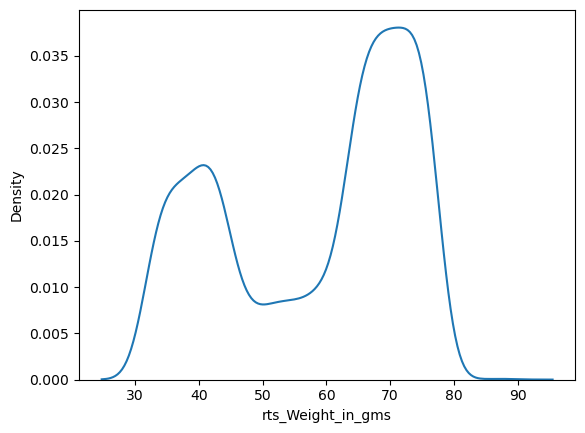

In [88]:
sns.kdeplot(df['rts_Weight_in_gms'])

## Outlier Handling

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10999 non-null  int64  
 1   Warehouse_block           10999 non-null  object 
 2   Mode_of_Shipment          10999 non-null  object 
 3   Customer_care_calls       10999 non-null  int64  
 4   Customer_rating           10999 non-null  int64  
 5   Cost_of_the_Product       10999 non-null  int64  
 6   Prior_purchases           10999 non-null  int64  
 7   Product_importance        10999 non-null  object 
 8   Gender                    10999 non-null  object 
 9   Discount_offered          10999 non-null  int64  
 10  Weight_in_gms             10999 non-null  int64  
 11  Reached.on.Time_Y.N       10999 non-null  int64  
 12  Customer_rating_category  10999 non-null  object 
 13  Reached_on_Time_cat       10999 non-null  object 
 14  Gender

In [90]:
#Pengelompokan kolom berdasarkan jenisnya
number = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 
          'Customer_rating', 'Reached.on.Time_Y.N', 'log_Discount_offered', 'log_Prior_purchases']
category = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Customer_rating_category', 'Reached_on_Time_cat']

### Using Zscore

In [91]:
print(f'Jumlah baris sebelum outlier dihilangkan: {len(df)}')

filtered_entries = np.array([True] * len(df))

for column in number:
    zscore = abs(stats.zscore(df[column])) 
    filtered_entries = (zscore < 3) & filtered_entries 
    
df_outlierhandling = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_outlierhandling)}')

Jumlah baris sebelum outlier dihilangkan: 10999
Jumlah baris setelah memfilter outlier: 10642


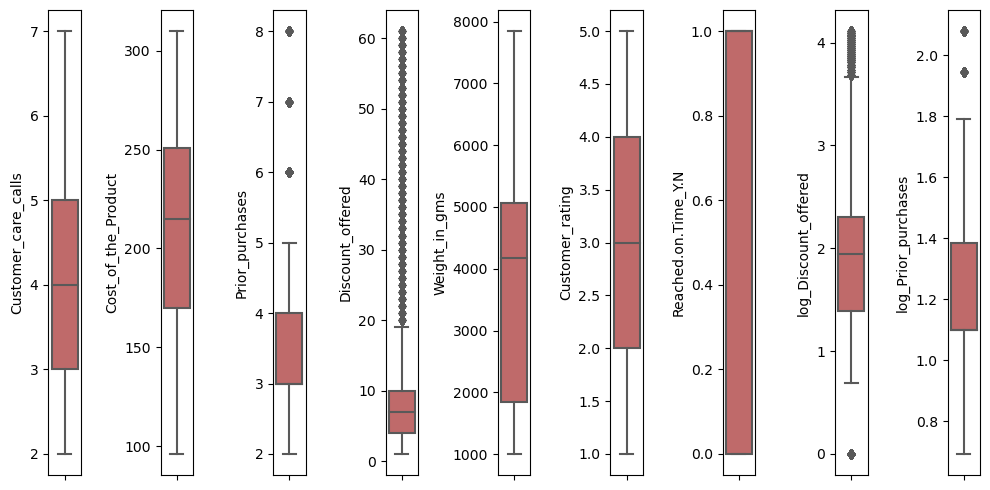

In [92]:
#boxplot
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling[features[i]], color='indianred', orient='v')
  plt.tight_layout()

### Using IQR

In [93]:
#menghilangkan outliers pada log_Prior_Purchases menggunakan batas atas dan bawah IQR
Q1 = df_outlierhandling['log_Prior_purchases'].quantile(0.25)
Q3 = df_outlierhandling['log_Prior_purchases'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_outlierhandling['log_Prior_purchases'] >= lower_limit) 
                        & (df_outlierhandling['log_Prior_purchases'] <= upper_limit))
df_outlierhandling = df_outlierhandling[filtered_entries]

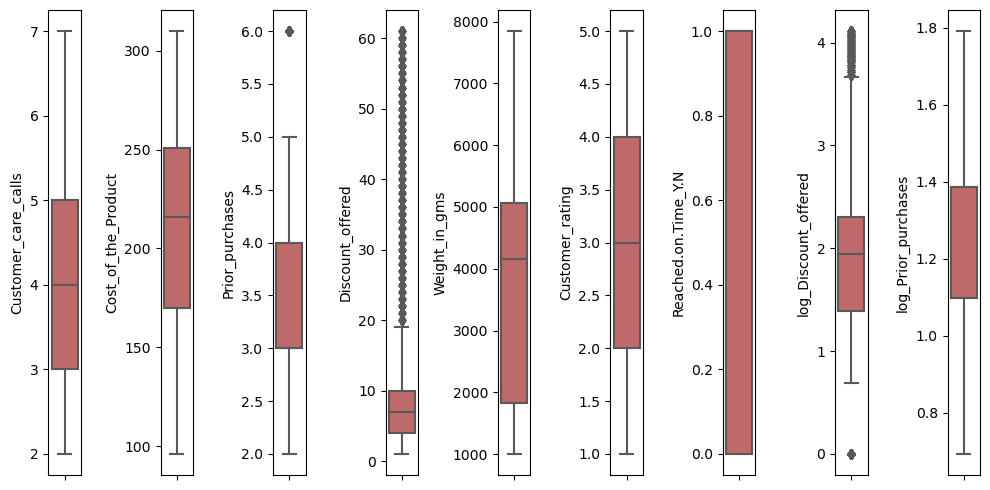

In [94]:
#boxplot
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling[features[i]], color='indianred', orient='v')
  plt.tight_layout()

In [95]:
#menghilangkan outliers pada log_Discount_Offered menggunakan batas atas dan bawah IQR
Q11 = df_outlierhandling['log_Discount_offered'].quantile(0.25)
Q31 = df_outlierhandling['log_Discount_offered'].quantile(0.75)
IQR1 = Q31-Q11
lower_limit1 = Q11 - (1.5*IQR1)
upper_limit1 = Q31 + (1.5*IQR1)
filtered_entries = ((df_outlierhandling['log_Discount_offered'] >= lower_limit) 
                        & (df_outlierhandling['log_Discount_offered'] <= upper_limit))
df_outlierhandling = df_outlierhandling[filtered_entries]

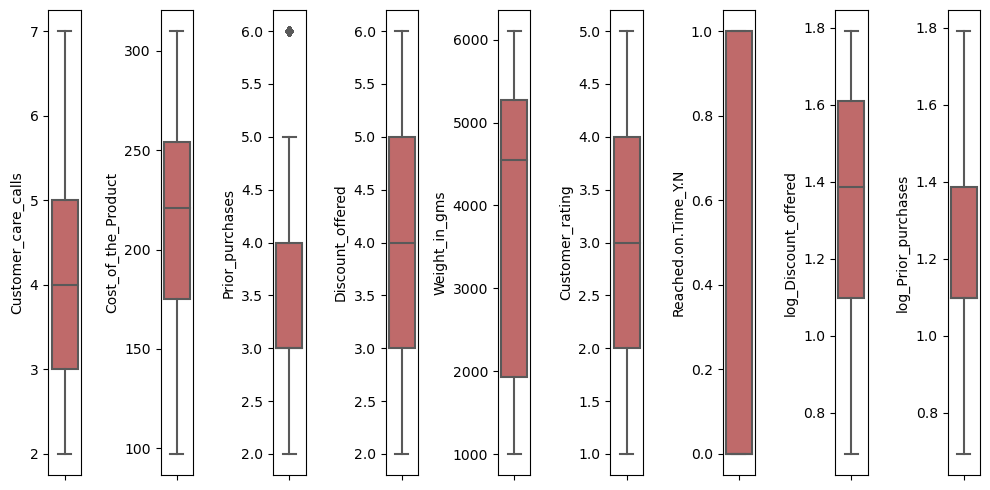

In [96]:
#boxplot
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling[features[i]], color='indianred', orient='v')
  plt.tight_layout()

# Stage 3 - Modeling

In [97]:
df_shipping = pd.read_csv('Train.csv')
df_shipping.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [98]:
# membagi data berdasarkan type datanya
df_shipping.drop(columns="ID", inplace=True)
category = df_shipping.select_dtypes(include='object')
numerical = df_shipping.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
Data category:  ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


**Encoding**

In [99]:
#Label encoding
mapping_gender = {
    'F' : 0,
    'M' : 1
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

df_shipping['Gender_num'] = df_shipping['Gender'].map(mapping_gender)
df_shipping['Product_importance_num'] = df_shipping['Product_importance'].map(mapping_product_importance)

In [100]:
df_shipping.drop(columns=["Gender", "Product_importance"], inplace=True)

In [101]:
df_shipping.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases  Discount_offered  Weight_in_gms  \
0                  177                3                44           1233   
1                  216                2                59           3088   
2                  183                4                48           3374   
3                  176                4                10           1177   
4                  184                3                46           2484   

   Reached.on.Time_Y.N  Gender_num  Product_importance_num  
0                    1           0                       0  
1                    1           1                       0  
2                    1           1                       0  
3                    1           1                       1  
4                    1           0                       1

In [102]:
for cat in ['Warehouse_block', 'Mode_of_Shipment']:
    onehots = pd.get_dummies(df_shipping[cat], prefix=cat)
    df_shipping = df_shipping.join(onehots)

In [103]:
df_shipping.drop(columns=["Warehouse_block", "Mode_of_Shipment", "Customer_rating"], inplace=True)

In [104]:
df_shipping.head()

Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
0                    4                  177                3   
1                    4                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Gender_num  \
0                44           1233                    1           0   
1                59           3088                    1           1   
2                48           3374                    1           1   
3                10           1177                    1           1   
4                46           2484                    1           0   

   Product_importance_num  Warehouse_block_A  Warehouse_block_B  \
0                       0                  0                  0   
1                       0                  0                  0   
2                       0                  1                  0   
3                       1                  0                  1   
4                       1                  0                  0   

   Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                  0                  1                  0   
1                  0                  0                  1   
2                  0                  0                  0   
3                  0                  0                  0   
4                  1                  0                  0   

   Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  
0                        1                      0                      0  
1                        1                      0                      0  
2                        1                      0                      0  
3                        1                      0                      0  
4                        1                      0                      0

In [105]:
# hapus Gender
df_shipping.drop(columns="Gender_num", inplace=True)

In [106]:
df_shipping.describe()

Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
count         10999.000000         10999.000000     10999.000000   
mean              4.054459           210.196836         3.567597   
std               1.141490            48.063272         1.522860   
min               2.000000            96.000000         2.000000   
25%               3.000000           169.000000         3.000000   
50%               4.000000           214.000000         3.000000   
75%               5.000000           251.000000         4.000000   
max               7.000000           310.000000        10.000000   

       Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
count      10999.000000   10999.000000         10999.000000   
mean          13.373216    3634.016729             0.596691   
std           16.205527    1635.377251             0.490584   
min            1.000000    1001.000000             0.000000   
25%            4.000000    1839.500000             0.000000   
50%            7.000000    4149.000000             1.000000   
75%           10.000000    5050.000000             1.000000   
max           65.000000    7846.000000             1.000000   

       Product_importance_num  Warehouse_block_A  Warehouse_block_B  \
count            10999.000000       10999.000000       10999.000000   
mean                 0.604600           0.166652           0.166652   
std                  0.641464           0.372681           0.372681   
min                  0.000000           0.000000           0.000000   
25%                  0.000000           0.000000           0.000000   
50%                  1.000000           0.000000           0.000000   
75%                  1.000000           0.000000           0.000000   
max                  2.000000           1.000000           1.000000   

       Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
count       10999.000000       10999.000000       10999.000000   
mean            0.166652           0.166742           0.333303   
std             0.372681           0.372763           0.471415   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           1.000000   
max             1.000000           1.000000           1.000000   

       Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  
count             10999.000000           10999.000000           10999.000000  
mean                  0.161560               0.160015               0.678425  
std                   0.368064               0.366636               0.467102  
min                   0.000000               0.000000               0.000000  
25%                   0.000000               0.000000               0.000000  
50%                   0.000000               0.000000               1.000000  
75%                   0.000000               0.000000               1.000000  
max                   1.000000               1.000000               1.000000

## 1. Data asli tanpa remove outlier

In [107]:
df_ori = df_shipping.copy()

df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Customer_care_calls      10999 non-null  int64
 1   Cost_of_the_Product      10999 non-null  int64
 2   Prior_purchases          10999 non-null  int64
 3   Discount_offered         10999 non-null  int64
 4   Weight_in_gms            10999 non-null  int64
 5   Reached.on.Time_Y.N      10999 non-null  int64
 6   Product_importance_num   10999 non-null  int64
 7   Warehouse_block_A        10999 non-null  uint8
 8   Warehouse_block_B        10999 non-null  uint8
 9   Warehouse_block_C        10999 non-null  uint8
 10  Warehouse_block_D        10999 non-null  uint8
 11  Warehouse_block_F        10999 non-null  uint8
 12  Mode_of_Shipment_Flight  10999 non-null  uint8
 13  Mode_of_Shipment_Road    10999 non-null  uint8
 14  Mode_of_Shipment_Ship    10999 non-null  uint8
dtypes:

In [108]:
#model evaluation automatization function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score #import evaluation matrix from sklearn

def eval_classification(model, Xtrain, Ytrain, Xtest, Ytest):                 #define a model evaluation function
    print("Test Data Evaluation:")
    Ypred = model.predict(Xtest)                                              #predict Y using testing data
    print("Accuracy (Test Set): %.3f" % accuracy_score(Ytest, Ypred))         #accuracy score
    print("Precision (Test Set): %.3f" % precision_score(Ytest, Ypred))       #precision score
    print("Recall (Test Set): %.3f" % recall_score(Ytest, Ypred))             #recall score
    print("F1-Score (Test Set): %.3f" % f1_score(Ytest, Ypred))               #f1 score
    
    Ypred_proba = model.predict_proba(Xtest)                                                          #predict Y (probability) using testing data 
    print("AUC (Test Set) : %.3f" % roc_auc_score(Ytest, Ypred_proba[:, 1]))                          #roc auc score
    print("Average Precision (Test Set) : %.3f" % average_precision_score(Ytest, Ypred_proba[:, 1]))  #average precision score
    print(" ")
    
    print("Train Data Evaluation:")
    Ypred_train = model.predict(Xtrain)                                          #predict Y using training data
    print("Accuracy (Train Set): %.3f" % accuracy_score(Ytrain, Ypred_train))    #accuracy score
    print("Precision (Train Set): %.3f" % precision_score(Ytrain, Ypred_train))  #precision score
    print("Recall (Train Set): %.3f" % recall_score(Ytrain, Ypred_train))        #recall score
    print("F1-Score (Train Set): %.3f" % f1_score(Ytrain, Ypred_train))          #f1 score
    
    Ypred_train_proba = model.predict_proba(Xtrain)                                                            #predict Y (probability) using training data
    print("AUC (Train Set) : %.3f" % roc_auc_score(Ytrain, Ypred_train_proba[:, 1]))                           #roc auc score
    print("Average Precision (Train Set) : %.3f" % average_precision_score(Ytrain, Ypred_train_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [109]:
# Splitting Features & Target
xlr1 = df_ori.drop(columns = ['Reached.on.Time_Y.N']) # Features
ylr1 = df_ori['Reached.on.Time_Y.N'] # Target

# Splitting Data Train & Data Test
xlrtrain1, xlrtest1, ylrtrain1, ylrtest1 = train_test_split(xlr1, ylr1, test_size = 0.3, stratify=ylr1, random_state = 42)

### Logistic Regression

In [110]:
# Modeling
modelLR1 = LogisticRegression(random_state=42)
modelLR1.fit(xlrtrain1, ylrtrain1)

LogisticRegression(random_state=42)

In [111]:
# Model Prediction
y_pred_trainLR1 = modelLR1.predict(xlrtrain1)
y_pred_trainLR1

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
y_predLR1 = modelLR1.predict(xlrtest1)
y_predLR1

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [113]:
# Model Prediction Probability
modelLR1.predict_proba(xlrtest1)

array([[0.52358884, 0.47641116],
       [0.23566582, 0.76433418],
       [0.34076048, 0.65923952],
       ...,
       [0.46961369, 0.53038631],
       [0.64143272, 0.35856728],
       [0.46588919, 0.53411081]])

In [114]:
# Model Evaluation
eval_classification(modelLR1, xlrtrain1, ylrtrain1, xlrtest1, ylrtest1)

Test Data Evaluation:
Accuracy (Test Set): 0.629
Precision (Test Set): 0.700
Recall (Test Set): 0.661
F1-Score (Test Set): 0.680
AUC (Test Set) : 0.713
Average Precision (Test Set) : 0.832
 
Train Data Evaluation:
Accuracy (Train Set): 0.630
Precision (Train Set): 0.697
Recall (Train Set): 0.673
F1-Score (Train Set): 0.685
AUC (Train Set) : 0.713
Average Precision (Train Set) : 0.832


In [115]:
# Model Validation Average Precision
print('AP test score : ',average_precision_score(ylrtest1, y_predLR1))
print('AP train score : ',average_precision_score(ylrtrain1, y_pred_trainLR1))

AP test score :  0.6652447588873732
AP train score :  0.664050253230356


In [116]:
# Model Validation Accuracy
print('train Accuracy : ',modelLR1.score(xlrtrain1, ylrtrain1))
print('test Accuracy : ',modelLR1.score(xlrtest1, ylrtest1))

train Accuracy :  0.6300818288089363
test Accuracy :  0.6290909090909091


<Axes: >

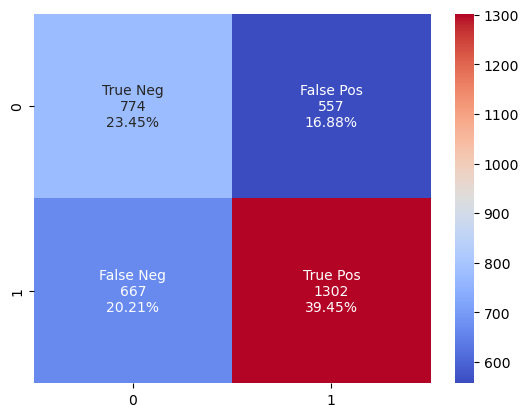

In [117]:
# Confusion Matrix
cf_matrixa = confusion_matrix(ylrtest1, y_predLR1)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

In [118]:
# Logistic Regression Intercept
print(modelLR1.intercept_)

[0.00086434]


In [119]:
# Logistic Regression Coefficient
print(modelLR1.coef_)

[[ 1.59220621e-04 -7.61878429e-04  6.58718694e-05  1.21079118e-01
  -1.43286495e-04  8.70287654e-04  1.47586431e-04  1.81468130e-04
   1.40411281e-05  1.83191657e-04  3.38053118e-04  1.61555529e-04
   9.37206779e-05  6.09064258e-04]]


In [120]:
# Logistic Regression Coefficient Table
koef2={'Feature':['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender','Discount_offered',
       'Weight_in_gms','Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship'],
     'Coefficient':[-5.59874633e-01 , 1.07227510e-01, -4.16402236e-01, -5.89193486e-01,
   2.09167717e-01, -3.19677572e-02 , 6.34152939e+00 ,-1.59915957e+00,
  -2.79614790e-02  ,2.35711612e-02, -4.61884188e-03 , 4.85396819e-03,
   3.80010177e-03 , 2.21622610e-02, -8.01170261e-03, -1.45056481e-02] }
koef_table=pd.DataFrame.from_dict(koef2).sort_values(by=['Coefficient'],ascending=False).reset_index(drop=True)
koef_table

Feature  Coefficient
0      Discount_offered     6.341529
1    Product_importance     0.209168
2       Customer_rating     0.107228
3           Warehouse_B     0.023571
4       Shipment_Flight     0.022162
5           Warehouse_D     0.004854
6           Warehouse_F     0.003800
7           Warehouse_C    -0.004619
8         Shipment_Road    -0.008012
9         Shipment_Ship    -0.014506
10          Warehouse_A    -0.027961
11               Gender    -0.031968
12  Cost_of_the_Product    -0.416402
13  Customer_care_calls    -0.559875
14      Prior_purchases    -0.589193
15        Weight_in_gms    -1.599160

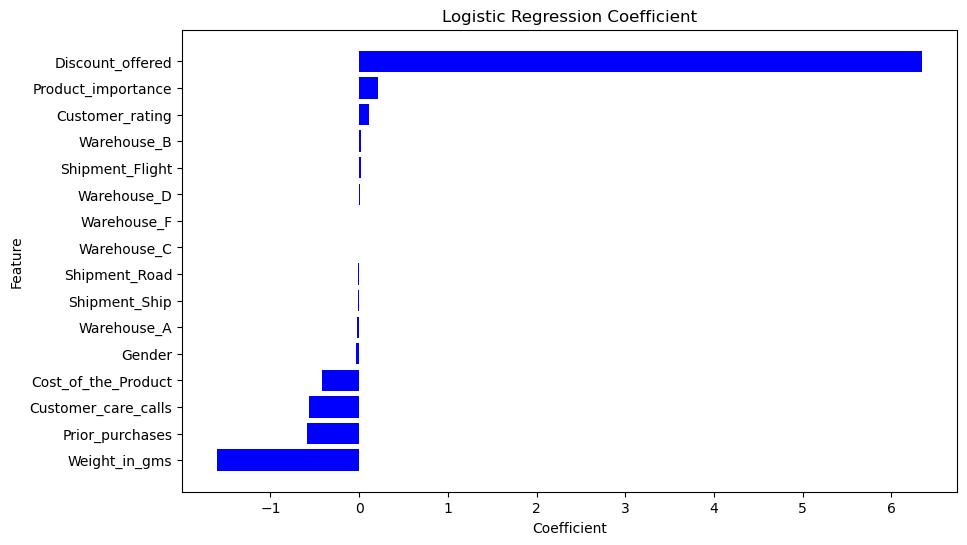

In [121]:
import matplotlib.pyplot as plt

# Sort the dataframe by coefficient in ascending order
koef_table_sorted = koef_table.sort_values(by='Coefficient', ascending=True)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(koef_table_sorted['Feature'], koef_table_sorted['Coefficient'], color='blue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficient')

plt.show()

### Tuning Hyperparameter Logistic Regression

In [122]:
# Splitting Features & Target
xlr1 = df_ori.drop(columns = ['Reached.on.Time_Y.N']) # Features
ylr1 = df_ori['Reached.on.Time_Y.N'] # Target

# Splitting Data Train & Data Test
xlrtrain1, xlrtest1, ylrtrain1, ylrtest1 = train_test_split(xlr1, ylr1, test_size = 0.3, stratify=ylr1, random_state = 42)

In [123]:
#Tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1','l2']
C = [0.0001,0.001,0.002]
hyperparams = dict(penalty = penalty, C=C)

lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparams, cv=5,random_state=42, scoring='recall')
rs.fit(xlrtrain1,ylrtrain1)
y_pred = rs.predict(xlrtest1)
y_pred_proba = rs.predict_proba(xlrtest1)

# Model Evaluation
eval_classification(rs, xlrtrain1, ylrtrain1, xlrtest1, ylrtest1)

Test Data Evaluation:
Accuracy (Test Set): 0.635
Precision (Test Set): 0.703
Recall (Test Set): 0.671
F1-Score (Test Set): 0.687
AUC (Test Set) : 0.715
Average Precision (Test Set) : 0.832
 
Train Data Evaluation:
Accuracy (Train Set): 0.632
Precision (Train Set): 0.698
Recall (Train Set): 0.674
F1-Score (Train Set): 0.686
AUC (Train Set) : 0.715
Average Precision (Train Set) : 0.833


### KNN

In [124]:
# train test split
xk1 = df_ori.drop(columns="Reached.on.Time_Y.N")
yk1 = df_ori['Reached.on.Time_Y.N']
xktrain1, xktest1, yktrain1, yktest1 = train_test_split(xk1, yk1, test_size=0.3, stratify=yk1, random_state=42)
print("training: ", xktrain1.shape[0])
print("testing: ", yktest1.shape[0])

training:  7699
testing:  3300


In [125]:
from sklearn.neighbors import KNeighborsClassifier  #import knn from sklearn
knn = KNeighborsClassifier()                        #initialize algorithm with specified name model
knn.fit(xktrain1, yktrain1)                           #fit algorithm with train data
eval_classification(knn, xktrain1, yktrain1, xktest1, yktest1)

Test Data Evaluation:
Accuracy (Test Set): 0.655
Precision (Test Set): 0.722
Recall (Test Set): 0.686
F1-Score (Test Set): 0.703
AUC (Test Set) : 0.727
Average Precision (Test Set) : 0.808
 
Train Data Evaluation:
Accuracy (Train Set): 0.786
Precision (Train Set): 0.837
Recall (Train Set): 0.796
F1-Score (Train Set): 0.816
AUC (Train Set) : 0.872
Average Precision (Train Set) : 0.899


### Tuning Hyperparameter KNN

In [126]:
# train test split
xk1 = df_ori.drop(columns="Reached.on.Time_Y.N")
yk1 = df_ori['Reached.on.Time_Y.N']
xktrain1, xktest1, yktrain1, yktest1 = train_test_split(xk1, yk1, test_size=0.3, stratify=yk1, random_state=42)
print("training: ", xktrain1.shape[0])
print("testing: ", yktest1.shape[0])

training:  7699
testing:  3300


In [127]:
#list of hyperparameter
n_neighbors = list(range(1,51))
p=[1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

#init model
knn_model = KNeighborsClassifier()
knn_model_tun = RandomizedSearchCV(knn_model, hyperparameters, cv=5, random_state=42, scoring='recall')

#fit model & evaluation
knn_model_tun.fit(xktrain1, yktrain1)
eval_classification(knn_model_tun, xktrain1, yktrain1, xktest1, yktest1)

Test Data Evaluation:
Accuracy (Test Set): 0.660
Precision (Test Set): 0.743
Recall (Test Set): 0.657
F1-Score (Test Set): 0.697
AUC (Test Set) : 0.737
Average Precision (Test Set) : 0.849
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [128]:
# best param
knn_model_tun.best_params_

{'weights': 'distance', 'p': 2, 'n_neighbors': 15, 'algorithm': 'auto'}

In [129]:
y_pred = knn_model_tun.predict(xktest1)

<Axes: >

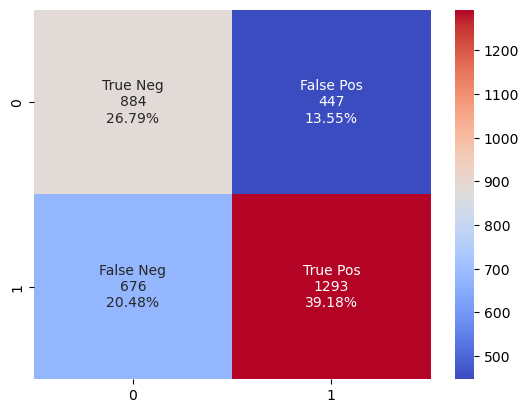

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(yktest1, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

### Decision Tree

In [131]:
# train test split
X = df_ori.drop(columns="Reached.on.Time_Y.N")
y = df_ori['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  7699
testing:  3300


In [132]:
from sklearn.tree import DecisionTreeClassifier       #import decision tree from sklearn
dt = DecisionTreeClassifier(random_state=42)     #initialize algorithm with specified name model
dt.fit(X_train, y_train)                         #fit algorithm with train data
eval_classification(dt, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.641
Precision (Test Set): 0.700
Recall (Test Set): 0.697
F1-Score (Test Set): 0.699
AUC (Test Set) : 0.628
Average Precision (Test Set) : 0.669
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


### Tuning Hyperparmater Decision Tree

In [133]:
# train test split
X = df_ori.drop(columns="Reached.on.Time_Y.N")
y = df_ori['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  7699
testing:  3300


In [134]:
#list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] #maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 200] #minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 100] #minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] #number of features to consider at every split
criterion = ['gini', 'entropy'] #the function to measure the quality of a split
splitter = ['best', 'random'] #the strategy used to choose the split at each node

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

In [135]:
#initiate model
dt = DecisionTreeClassifier(random_state=42)
dt_tun = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
dt_tun.fit(X_train, y_train) #fit model

eval_classification(dt_tun, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.634
Precision (Test Set): 0.694
Recall (Test Set): 0.690
F1-Score (Test Set): 0.692
AUC (Test Set) : 0.620
Average Precision (Test Set) : 0.664
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [136]:
dt_tun.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 94,
 'criterion': 'gini'}

In [137]:
y_pred = dt_tun.predict(X_test)

<Axes: >

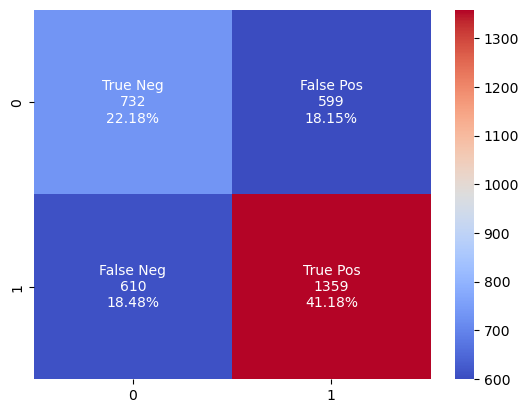

In [138]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(yktest1, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

### XGBoost

In [139]:
# Splitting Features & Target
xlr2 = df_ori.drop(columns="Reached.on.Time_Y.N")
ylr2 = df_ori['Reached.on.Time_Y.N']

# Splitting data Train & data Test
xltrain2, xltest2, yltrain2, yltest2 = train_test_split(xlr2, ylr2, test_size = 0.3, stratify=ylr2 ,random_state = 42)

In [140]:
model_xg = XGBClassifier(random_state = 42)
model_xg.fit(xltrain2,yltrain2)
eval_classification(model_xg, xltrain2, yltrain2, xltest2, yltest2)

Test Data Evaluation:
Accuracy (Test Set): 0.646
Precision (Test Set): 0.732
Recall (Test Set): 0.643
F1-Score (Test Set): 0.685
AUC (Test Set) : 0.734
Average Precision (Test Set) : 0.848
 
Train Data Evaluation:
Accuracy (Train Set): 0.911
Precision (Train Set): 0.960
Recall (Train Set): 0.887
F1-Score (Train Set): 0.922
AUC (Train Set) : 0.978
Average Precision (Train Set) : 0.986


### Tuning Hyperparameter XGBoost

In [141]:
# Splitting Features & Target
xl3 = df_ori.drop(columns="Reached.on.Time_Y.N")
yl3 = df_ori['Reached.on.Time_Y.N']

# Splitting Data Train & Data Test
xltrain3, xltest3, yltrain3, yltest3 = train_test_split(xl3, yl3, test_size = 0.3, stratify=yl3, random_state = 42)

In [142]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],x
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, random_state=42, cv=5, scoring='recall')
xg_tuned.fit(xltrain3,yltrain3)
eval_classification(xg_tuned, xltrain3, yltrain3, xltest3, yltest3)

Test Data Evaluation:
Accuracy (Test Set): 0.640
Precision (Test Set): 0.707
Recall (Test Set): 0.678
F1-Score (Test Set): 0.692
AUC (Test Set) : 0.727
Average Precision (Test Set) : 0.845
 
Train Data Evaluation:
Accuracy (Train Set): 0.917
Precision (Train Set): 0.945
Recall (Train Set): 0.915
F1-Score (Train Set): 0.929
AUC (Train Set) : 0.975
Average Precision (Train Set) : 0.984


In [143]:
# best param
xg_tuned.best_params_

{'tree_method': 'hist',
 'min_child_weight': 2,
 'max_depth': 110,
 'lambda': 0.2,
 'gamma': 0.5,
 'eta': 0.7777777777777778,
 'colsample_bytree': 1.0,
 'alpha': 0.1}

<Axes: >

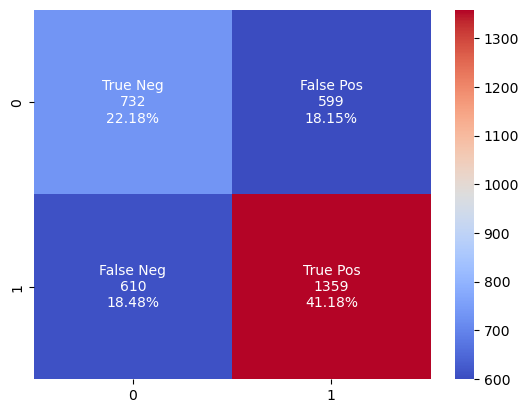

In [144]:
y_pred = dt_tun.predict(xltest3)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(yltest3, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

### AdaBoost

In [145]:
# train test split
X = df_ori.drop(columns="Reached.on.Time_Y.N")
y = df_ori['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  7699
testing:  3300


In [146]:
model_ab = AdaBoostClassifier()
model_ab.fit(X_train,y_train)
eval_classification(model_ab, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.671
Precision (Test Set): 0.845
Recall (Test Set): 0.550
F1-Score (Test Set): 0.666
AUC (Test Set) : 0.740
Average Precision (Test Set) : 0.849
 
Train Data Evaluation:
Accuracy (Train Set): 0.687
Precision (Train Set): 0.849
Recall (Train Set): 0.579
F1-Score (Train Set): 0.689
AUC (Train Set) : 0.762
Average Precision (Train Set) : 0.862


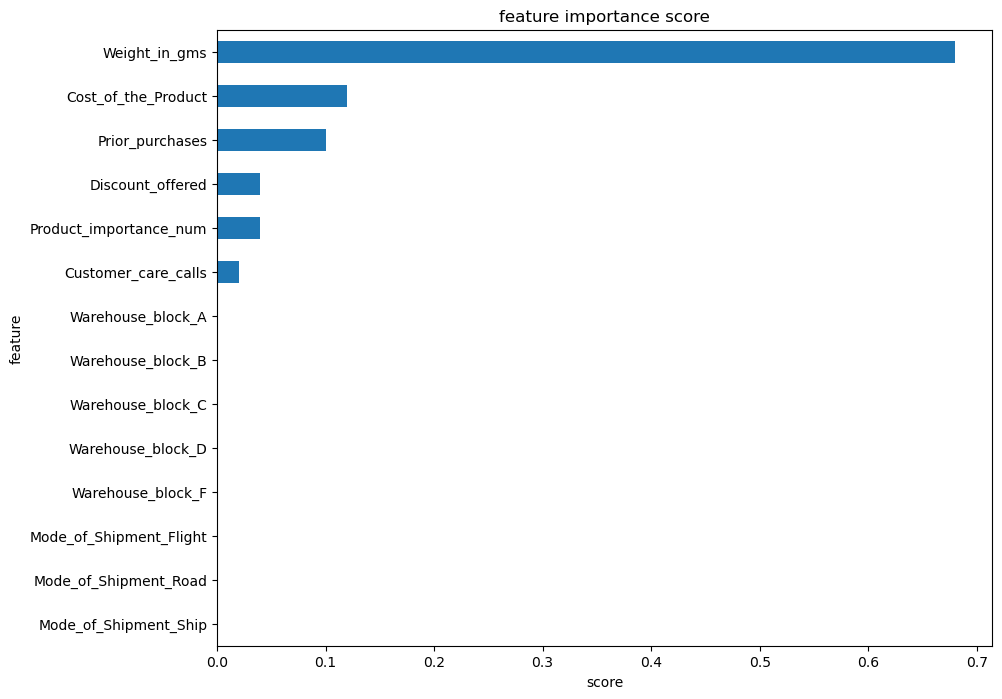

In [147]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

show_feature_importance(model_ab)

### Tuning Hyperparameter AdaBoost

In [148]:
# train test split
X = df_ori.drop(columns="Reached.on.Time_Y.N")
y = df_ori['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  7699
testing:  3300


In [149]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

In [150]:
# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)
eval_classification(ab_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.669
Precision (Test Set): 0.785
Recall (Test Set): 0.614
F1-Score (Test Set): 0.689
AUC (Test Set) : 0.735
Average Precision (Test Set) : 0.800
 
Train Data Evaluation:
Accuracy (Train Set): 0.674
Precision (Train Set): 0.786
Recall (Train Set): 0.623
F1-Score (Train Set): 0.695
AUC (Train Set) : 0.739
Average Precision (Train Set) : 0.805


In [151]:
# best param
ab_tuned.best_params_

{'n_estimators': 1842,
 'learning_rate': 0.09154271356783919,
 'algorithm': 'SAMME'}

<Axes: >

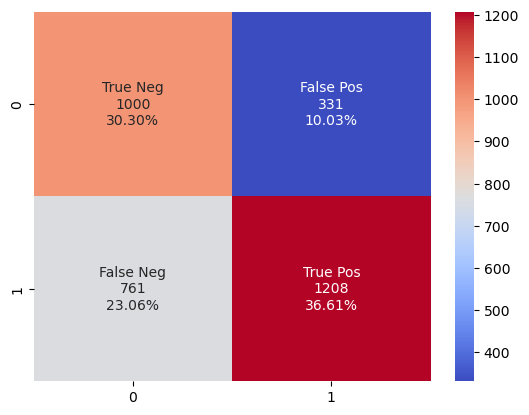

In [152]:
y_pred = ab_tuned.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

### Random Forest

In [153]:
# Splitting Features & Target
xr4 = df_ori.drop(columns="Reached.on.Time_Y.N")
yr4 = df_ori['Reached.on.Time_Y.N']

# Splitting Data Train & Data Test
xrtrain4, xrtest4, yrtrain4, yrtest4 = train_test_split(xr4, yr4, test_size = 0.3, stratify= yr4, random_state =42)

In [154]:
# Evaluation Metrics
RFr4 = RandomForestClassifier(random_state = 42)
RFr4.fit(xrtrain4, yrtrain4)
predictionr4 = RFr4.predict(xrtest4)
eval_classification(RFr4, xrtrain4, yrtrain4, xrtest4, yrtest4)

Test Data Evaluation:
Accuracy (Test Set): 0.652
Precision (Test Set): 0.745
Recall (Test Set): 0.633
F1-Score (Test Set): 0.684
AUC (Test Set) : 0.730
Average Precision (Test Set) : 0.844
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


### Tuning Hyperparameter Random Forest

In [155]:
# Splitting Features & Target
xr4 = df_ori.drop(columns="Reached.on.Time_Y.N")
yr4 = df_ori['Reached.on.Time_Y.N']

# Splitting Data Train & Data Test
xrtrain4, xrtest4, yrtrain4, yrtest4 = train_test_split(xr4, yr4, test_size = 0.3, stratify= yr4, random_state =42)

In [156]:
hyperparameters_rf = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], #the number of features to consider when looking for the best split
                       n_jobs = [-1] #the number of jobs to run in parallel computation. -1 means using all processors
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters_rf, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(xrtrain4,yrtrain4)
eval_classification(rf_tuned, xrtrain4, yrtrain4, xrtest4, yrtest4)

Test Data Evaluation:
Accuracy (Test Set): 0.651
Precision (Test Set): 0.745
Recall (Test Set): 0.632
F1-Score (Test Set): 0.684
AUC (Test Set) : 0.735
Average Precision (Test Set) : 0.849
 
Train Data Evaluation:
Accuracy (Train Set): 0.999
Precision (Train Set): 0.999
Recall (Train Set): 1.000
F1-Score (Train Set): 0.999
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [157]:
# best param
rf_tuned.best_params_

{'n_jobs': -1,
 'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 110,
 'criterion': 'gini',
 'bootstrap': True}

<Axes: >

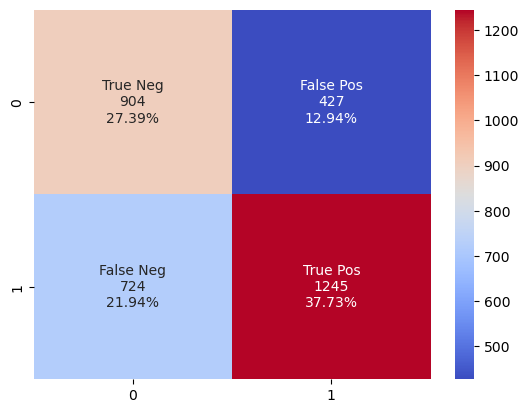

In [158]:
y_pred = rf_tuned.predict(xrtest4)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(yrtest4, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

## 2. Data dengan Log Transfirmation

In [159]:
df_log = df_shipping.copy()

df_log.head()

Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
0                    4                  177                3   
1                    4                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0                44           1233                    1   
1                59           3088                    1   
2                48           3374                    1   
3                10           1177                    1   
4                46           2484                    1   

   Product_importance_num  Warehouse_block_A  Warehouse_block_B  \
0                       0                  0                  0   
1                       0                  0                  0   
2                       0                  1                  0   
3                       1                  0                  1   
4                       1                  0                  0   

   Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
0                  0                  1                  0   
1                  0                  0                  1   
2                  0                  0                  0   
3                  0                  0                  0   
4                  1                  0                  0   

   Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  
0                        1                      0                      0  
1                        1                      0                      0  
2                        1                      0                      0  
3                        1                      0                      0  
4                        1                      0                      0

In [160]:
#tranformasi log
df_log['log_Discount_offered'] = np.log(df_shipping['Discount_offered'])
df_log['log_Prior_purchases'] = np.log(df_shipping['Prior_purchases'])

In [161]:
df_log[{'Discount_offered', 'log_Discount_offered', 'Prior_purchases', 'log_Prior_purchases'}].describe()

log_Prior_purchases  Prior_purchases  Discount_offered  \
count         10999.000000     10999.000000      10999.000000   
mean              1.195669         3.567597         13.373216   
std               0.379769         1.522860         16.205527   
min               0.693147         2.000000          1.000000   
25%               1.098612         3.000000          4.000000   
50%               1.098612         3.000000          7.000000   
75%               1.386294         4.000000         10.000000   
max               2.302585        10.000000         65.000000   

       log_Discount_offered  
count          10999.000000  
mean               1.998420  
std                1.083692  
min                0.000000  
25%                1.386294  
50%                1.945910  
75%                2.302585  
max                4.174387

In [162]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_care_calls      10999 non-null  int64  
 1   Cost_of_the_Product      10999 non-null  int64  
 2   Prior_purchases          10999 non-null  int64  
 3   Discount_offered         10999 non-null  int64  
 4   Weight_in_gms            10999 non-null  int64  
 5   Reached.on.Time_Y.N      10999 non-null  int64  
 6   Product_importance_num   10999 non-null  int64  
 7   Warehouse_block_A        10999 non-null  uint8  
 8   Warehouse_block_B        10999 non-null  uint8  
 9   Warehouse_block_C        10999 non-null  uint8  
 10  Warehouse_block_D        10999 non-null  uint8  
 11  Warehouse_block_F        10999 non-null  uint8  
 12  Mode_of_Shipment_Flight  10999 non-null  uint8  
 13  Mode_of_Shipment_Road    10999 non-null  uint8  
 14  Mode_of_Shipment_Ship 

In [163]:
#model evaluation automatization function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score #import evaluation matrix from sklearn

def eval_classification(model, Xtrain, Ytrain, Xtest, Ytest):                 #define a model evaluation function
    print("Test Data Evaluation:")
    Ypred = model.predict(Xtest)                                              #predict Y using testing data
    print("Accuracy (Test Set): %.3f" % accuracy_score(Ytest, Ypred))         #accuracy score
    print("Precision (Test Set): %.3f" % precision_score(Ytest, Ypred))       #precision score
    print("Recall (Test Set): %.3f" % recall_score(Ytest, Ypred))             #recall score
    print("F1-Score (Test Set): %.3f" % f1_score(Ytest, Ypred))               #f1 score
    
    Ypred_proba = model.predict_proba(Xtest)                                                          #predict Y (probability) using testing data 
    print("AUC (Test Set) : %.3f" % roc_auc_score(Ytest, Ypred_proba[:, 1]))                          #roc auc score
    print("Average Precision (Test Set) : %.3f" % average_precision_score(Ytest, Ypred_proba[:, 1]))  #average precision score
    print(" ")
    
    print("Train Data Evaluation:")
    Ypred_train = model.predict(Xtrain)                                          #predict Y using training data
    print("Accuracy (Train Set): %.3f" % accuracy_score(Ytrain, Ypred_train))    #accuracy score
    print("Precision (Train Set): %.3f" % precision_score(Ytrain, Ypred_train))  #precision score
    print("Recall (Train Set): %.3f" % recall_score(Ytrain, Ypred_train))        #recall score
    print("F1-Score (Train Set): %.3f" % f1_score(Ytrain, Ypred_train))          #f1 score
    
    Ypred_train_proba = model.predict_proba(Xtrain)                                                            #predict Y (probability) using training data
    print("AUC (Train Set) : %.3f" % roc_auc_score(Ytrain, Ypred_train_proba[:, 1]))                           #roc auc score
    print("Average Precision (Train Set) : %.3f" % average_precision_score(Ytrain, Ypred_train_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [164]:
df_log.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Product_importance_num', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'log_Discount_offered', 'log_Prior_purchases'],
      dtype='object')

In [165]:
# Split Feature and Label
X = df_log.drop(columns=['Prior_purchases','Discount_offered','Reached.on.Time_Y.N'])
y = df_log['Reached.on.Time_Y.N'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

### Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [167]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [168]:
model.predict_proba(X_test)

array([[0.50330252, 0.49669748],
       [0.26243617, 0.73756383],
       [0.24538685, 0.75461315],
       ...,
       [0.49079576, 0.50920424],
       [0.67471453, 0.32528547],
       [0.45586977, 0.54413023]])

In [169]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [170]:
eval_classification(model, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.625
Precision (Test Set): 0.666
Recall (Test Set): 0.747
F1-Score (Test Set): 0.704
AUC (Test Set) : 0.713
Average Precision (Test Set) : 0.832
 
Train Data Evaluation:
Accuracy (Train Set): 0.631
Precision (Train Set): 0.670
Recall (Train Set): 0.754
F1-Score (Train Set): 0.709
AUC (Train Set) : 0.714
Average Precision (Train Set) : 0.833


### Hyperparameter Tuning LR

In [171]:
# Split Feature and Label
X = df_log.drop(columns=['Prior_purchases','Discount_offered','Reached.on.Time_Y.N'])
y = df_log['Reached.on.Time_Y.N'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [172]:
# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.631
Precision (Test Set): 0.665
Recall (Test Set): 0.767
F1-Score (Test Set): 0.713
AUC (Test Set) : 0.716
Average Precision (Test Set) : 0.830
 
Train Data Evaluation:
Accuracy (Train Set): 0.634
Precision (Train Set): 0.666
Recall (Train Set): 0.774
F1-Score (Train Set): 0.716
AUC (Train Set) : 0.717
Average Precision (Train Set) : 0.831


### KNN

In [173]:
knn = KNeighborsClassifier()                        #initialize algorithm with specified name model
knn.fit(X_train, y_train)                           #fit algorithm with train data
eval_classification(knn, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.650
Precision (Test Set): 0.717
Recall (Test Set): 0.683
F1-Score (Test Set): 0.699
AUC (Test Set) : 0.721
Average Precision (Test Set) : 0.802
 
Train Data Evaluation:
Accuracy (Train Set): 0.787
Precision (Train Set): 0.835
Recall (Train Set): 0.802
F1-Score (Train Set): 0.818
AUC (Train Set) : 0.873
Average Precision (Train Set) : 0.899


### Hyperparameter KNN

In [174]:
#list of hyperparameter
n_neighbors = list(range(1,51))
p=[1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

#init model
knn_model = KNeighborsClassifier()
knn_model_tun = RandomizedSearchCV(knn_model, hyperparameters, cv=5, random_state=42, scoring='recall')

#fit model & evaluation
knn_model_tun.fit(X_train, y_train)
eval_classification(knn_model_tun, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.658
Precision (Test Set): 0.738
Recall (Test Set): 0.662
F1-Score (Test Set): 0.698
AUC (Test Set) : 0.736
Average Precision (Test Set) : 0.845
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


### Decision Tree

In [175]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.640
Precision (Test Set): 0.698
Recall (Test Set): 0.698
F1-Score (Test Set): 0.698
AUC (Test Set) : 0.626
Average Precision (Test Set) : 0.667
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


### Hyperparameter Tuning DT

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.644
Precision (Test Set): 0.719
Recall (Test Set): 0.663
F1-Score (Test Set): 0.690
AUC (Test Set) : 0.694
Average Precision (Test Set) : 0.770
 
Train Data Evaluation:
Accuracy (Train Set): 0.841
Precision (Train Set): 0.899
Recall (Train Set): 0.827
F1-Score (Train Set): 0.861
AUC (Train Set) : 0.934
Average Precision (Train Set) : 0.955


In [177]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


Text(0.5, 1.0, 'feature importance score')

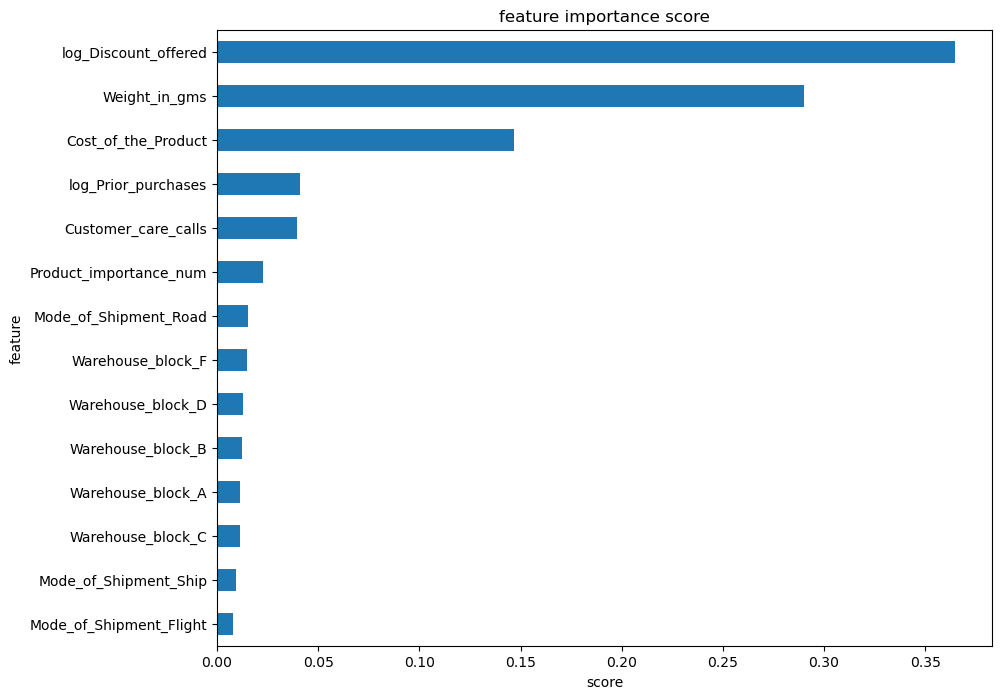

In [178]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### Random Forest

In [179]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
eval_classification(rf, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.661
Precision (Test Set): 0.754
Recall (Test Set): 0.640
F1-Score (Test Set): 0.693
AUC (Test Set) : 0.735
Average Precision (Test Set) : 0.847
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


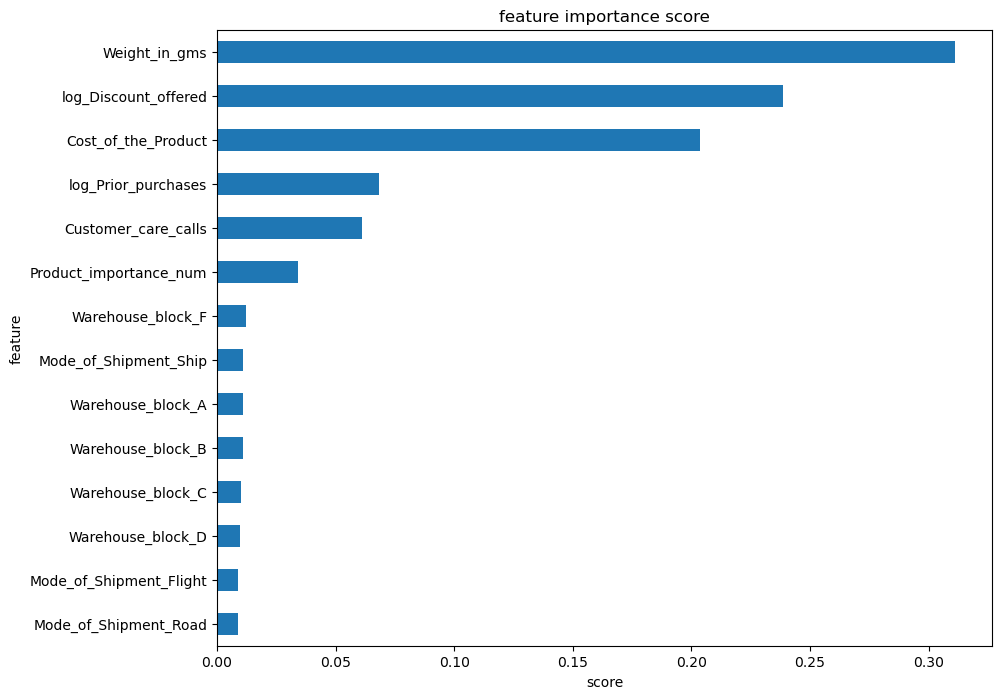

In [180]:
show_feature_importance(rf)

### Hyperparameter Tuning RF

In [181]:
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rf_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.659
Precision (Test Set): 0.756
Recall (Test Set): 0.634
F1-Score (Test Set): 0.690
AUC (Test Set) : 0.737
Average Precision (Test Set) : 0.850
 
Train Data Evaluation:
Accuracy (Train Set): 0.999
Precision (Train Set): 0.999
Recall (Train Set): 1.000
F1-Score (Train Set): 0.999
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [182]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


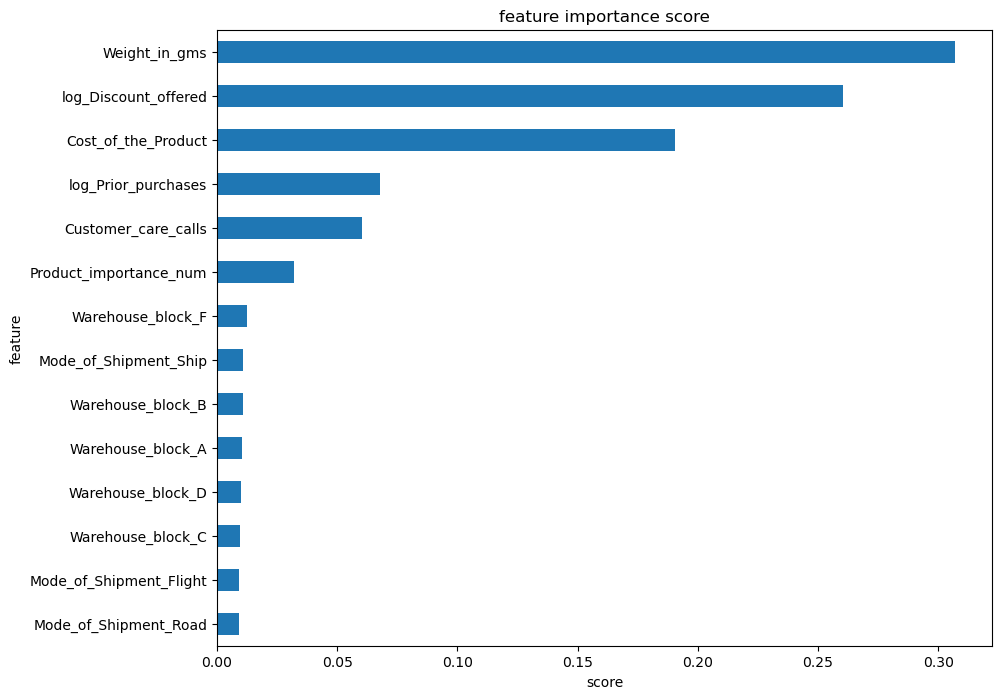

In [183]:
show_feature_importance(rf_tuned.best_estimator_)

### AdaBost

In [184]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

eval_classification(ab, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.671
Precision (Test Set): 0.845
Recall (Test Set): 0.550
F1-Score (Test Set): 0.666
AUC (Test Set) : 0.740
Average Precision (Test Set) : 0.849
 
Train Data Evaluation:
Accuracy (Train Set): 0.687
Precision (Train Set): 0.849
Recall (Train Set): 0.579
F1-Score (Train Set): 0.689
AUC (Train Set) : 0.762
Average Precision (Train Set) : 0.862


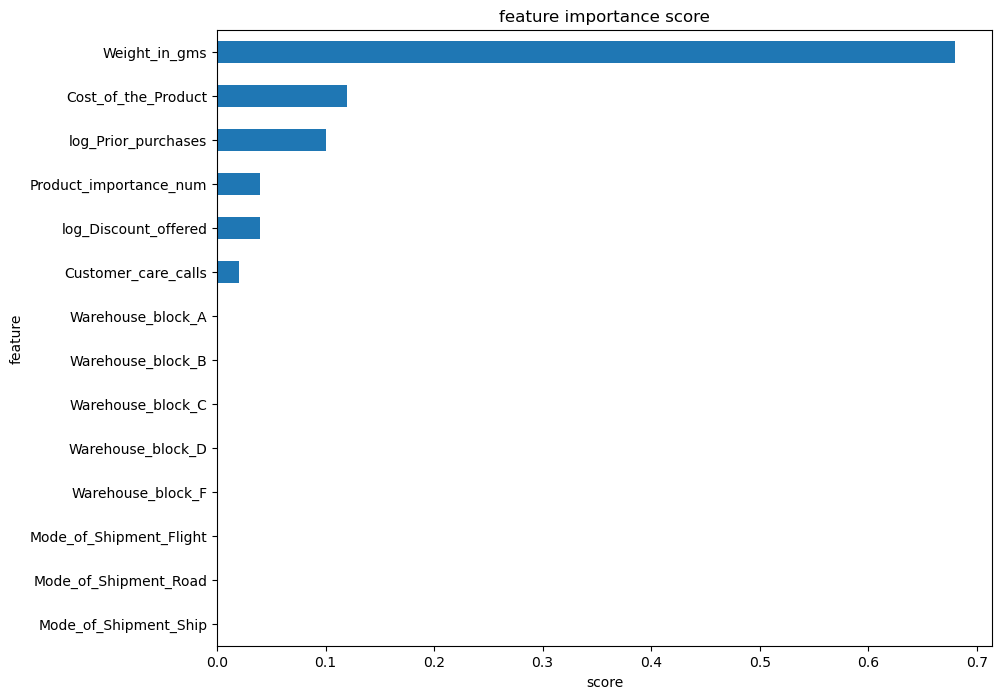

In [185]:
show_feature_importance(ab)

### Hyperparameter Tuning Adaboost

In [186]:
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.669
Precision (Test Set): 0.785
Recall (Test Set): 0.614
F1-Score (Test Set): 0.689
AUC (Test Set) : 0.735
Average Precision (Test Set) : 0.800
 
Train Data Evaluation:
Accuracy (Train Set): 0.674
Precision (Train Set): 0.786
Recall (Train Set): 0.623
F1-Score (Train Set): 0.695
AUC (Train Set) : 0.739
Average Precision (Train Set) : 0.805


In [187]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1842
Best learning_rate: 0.09154271356783919
Best algorithm: SAMME


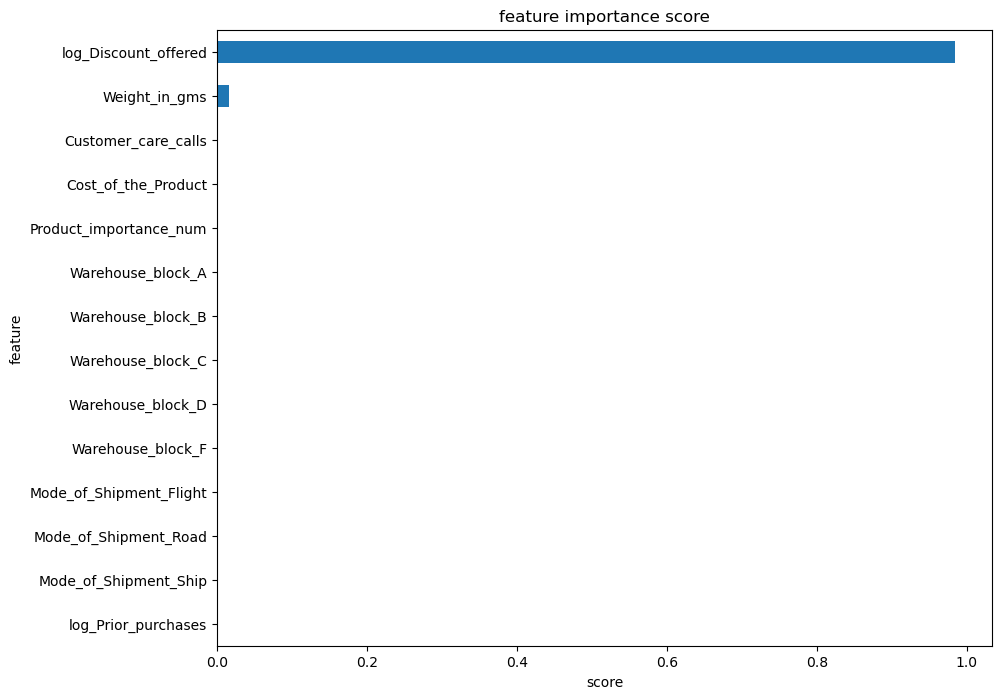

In [188]:
show_feature_importance(ab_tuned.best_estimator_)

### XGBoost

In [189]:
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

eval_classification(xg, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.646
Precision (Test Set): 0.732
Recall (Test Set): 0.643
F1-Score (Test Set): 0.685
AUC (Test Set) : 0.734
Average Precision (Test Set) : 0.848
 
Train Data Evaluation:
Accuracy (Train Set): 0.911
Precision (Train Set): 0.960
Recall (Train Set): 0.887
F1-Score (Train Set): 0.922
AUC (Train Set) : 0.978
Average Precision (Train Set) : 0.986


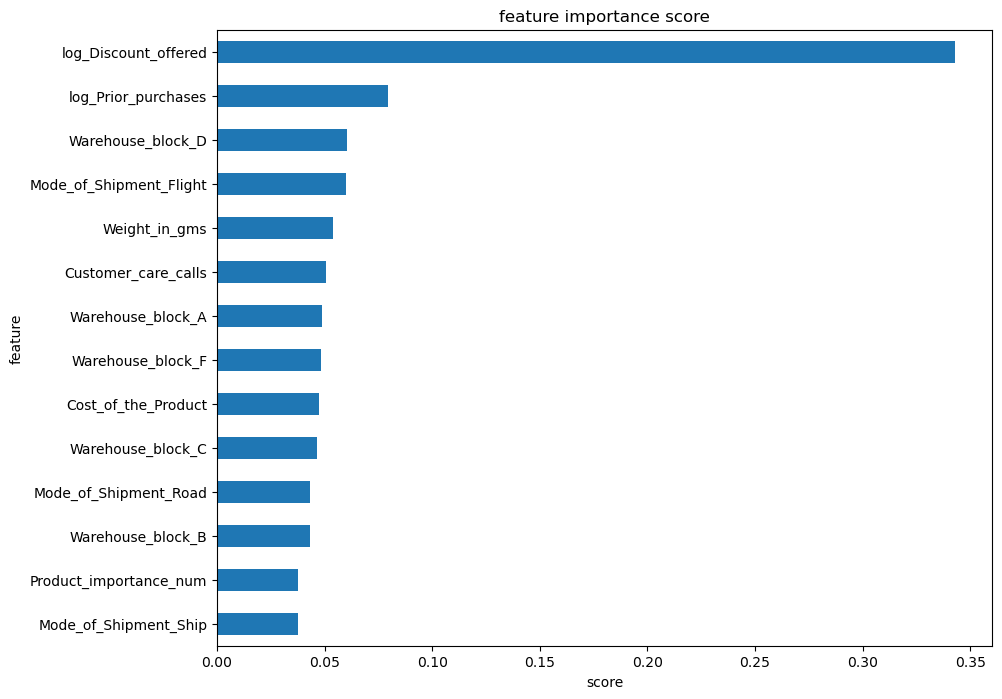

In [190]:
show_feature_importance(xg)

### Hyperparameter Tuning XGBoost

In [191]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.650
Precision (Test Set): 0.724
Recall (Test Set): 0.669
F1-Score (Test Set): 0.696
AUC (Test Set) : 0.732
Average Precision (Test Set) : 0.847
 
Train Data Evaluation:
Accuracy (Train Set): 0.701
Precision (Train Set): 0.764
Recall (Train Set): 0.721
F1-Score (Train Set): 0.742
AUC (Train Set) : 0.792
Average Precision (Train Set) : 0.880


In [192]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 90
Best min_child_weight: 6
Best gamma: 0.4
Best tree_method: hist
Best colsample_bytree: 0.1
Best eta: 0.13131313131313133
Best lambda: 0.0
Best alpha: 0.30000000000000004


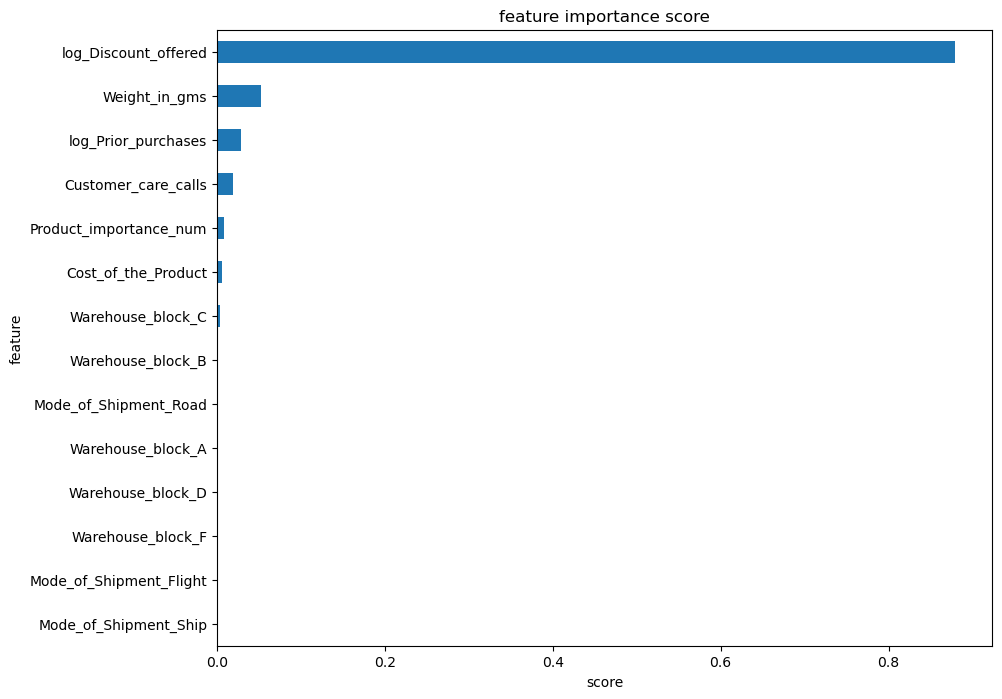

In [193]:
show_feature_importance(xg_tuned.best_estimator_)

## 3. Data dengan IQR Outlier Handling

In [194]:
new_num_col = df_shipping.columns.to_list()

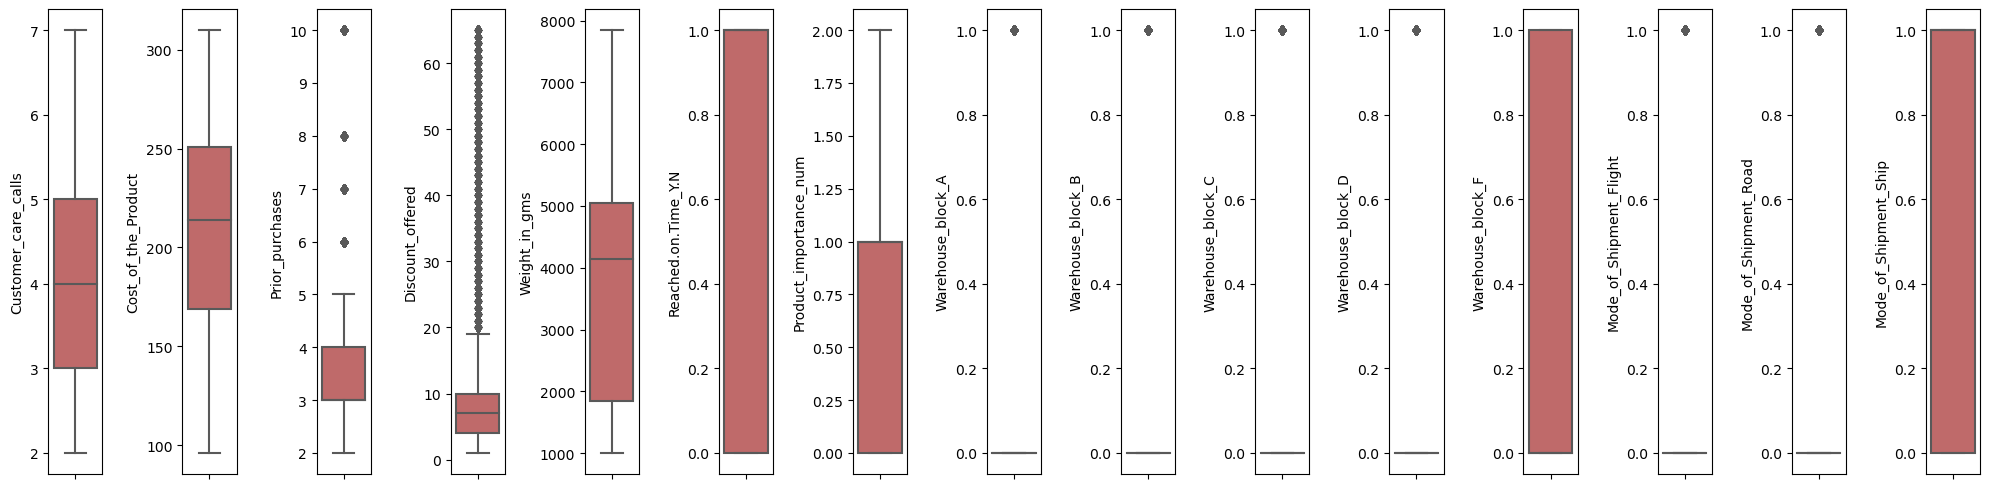

In [195]:
plt.figure(figsize=(20,5))
for i in range(0, len(new_num_col)):
  plt.subplot(1, len(new_num_col), i+1)
  sns.boxplot(y=df_shipping[new_num_col[i]], color='indianred', orient='v')
  plt.tight_layout()

In [196]:
df_remot = df_shipping.copy()

Q1 = df_remot['Discount_offered'].quantile(0.25)
Q3 = df_remot['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_remot['Discount_offered'] >= lower_limit) & (df_remot['Discount_offered'] <= upper_limit))
df_remot = df_remot[filtered_entries]

In [197]:
df_remot.shape

(8790, 15)

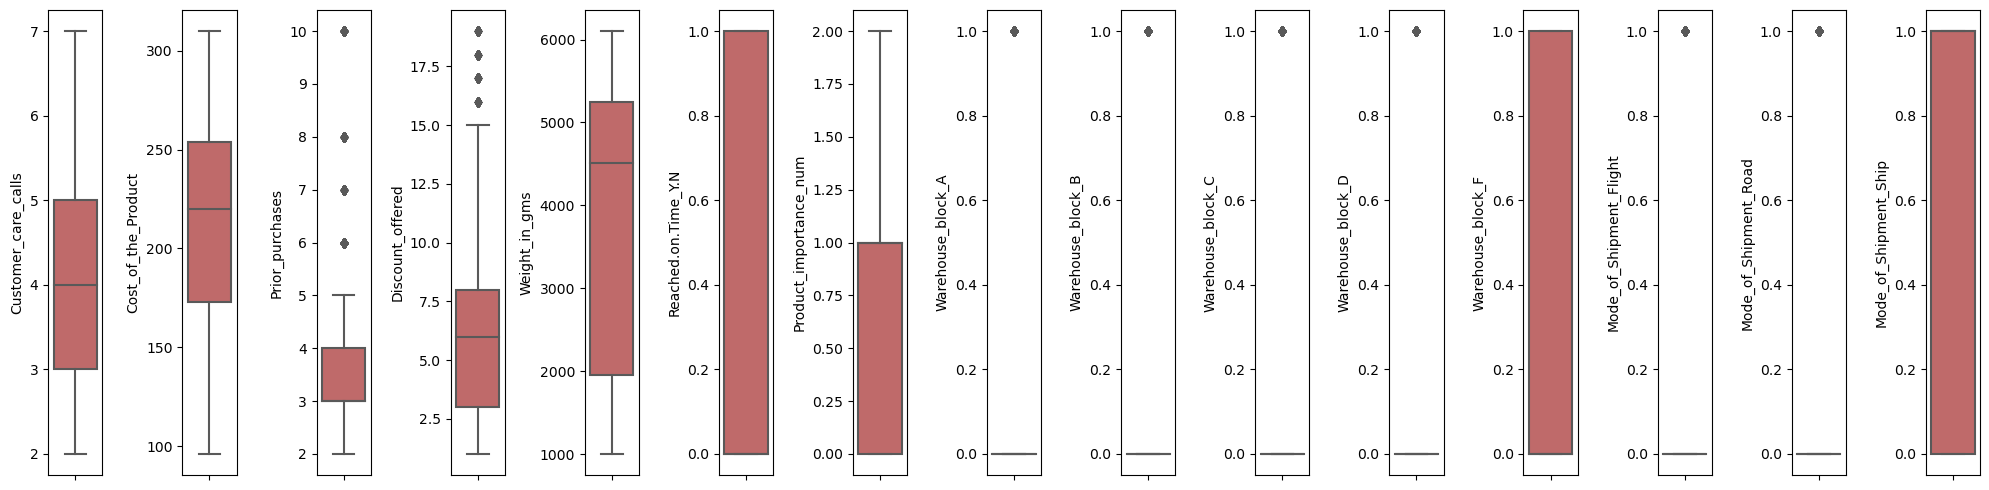

In [198]:
new_nums_col = df_remot.columns.to_list()

plt.figure(figsize=(20,5))
for i in range(0, len(new_nums_col)):
  plt.subplot(1, len(new_nums_col), i+1)
  sns.boxplot(y=df_remot[new_nums_col[i]], color='indianred', orient='v')
  plt.tight_layout()

In [199]:
df_remot['Reached.on.Time_Y.N'].value_counts()

0    4436
1    4354
Name: Reached.on.Time_Y.N, dtype: int64

### Scaling

In [200]:
df_remot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 3 to 10998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Customer_care_calls      8790 non-null   int64
 1   Cost_of_the_Product      8790 non-null   int64
 2   Prior_purchases          8790 non-null   int64
 3   Discount_offered         8790 non-null   int64
 4   Weight_in_gms            8790 non-null   int64
 5   Reached.on.Time_Y.N      8790 non-null   int64
 6   Product_importance_num   8790 non-null   int64
 7   Warehouse_block_A        8790 non-null   uint8
 8   Warehouse_block_B        8790 non-null   uint8
 9   Warehouse_block_C        8790 non-null   uint8
 10  Warehouse_block_D        8790 non-null   uint8
 11  Warehouse_block_F        8790 non-null   uint8
 12  Mode_of_Shipment_Flight  8790 non-null   uint8
 13  Mode_of_Shipment_Road    8790 non-null   uint8
 14  Mode_of_Shipment_Ship    8790 non-null   uint8
dtypes: 

In [201]:
from sklearn.preprocessing import StandardScaler
df_remot['Customer_care_calls_std'] = StandardScaler().fit_transform(df_remot['Customer_care_calls'].values.reshape(len(df_remot), 1))
df_remot['Cost_of_the_Product_std'] = StandardScaler().fit_transform(df_remot['Cost_of_the_Product'].values.reshape(len(df_remot), 1))
df_remot['Prior_purchases_std'] = StandardScaler().fit_transform(df_remot['Prior_purchases'].values.reshape(len(df_remot), 1))
df_remot['Product_importance_std'] = StandardScaler().fit_transform(df_remot['Product_importance_num'].values.reshape(len(df_remot), 1))
df_remot['Discount_offered_std'] = StandardScaler().fit_transform(df_remot['Discount_offered'].values.reshape(len(df_remot), 1))
df_remot['Weight_in_gms_std'] = StandardScaler().fit_transform(df_remot['Weight_in_gms'].values.reshape(len(df_remot), 1))

In [202]:
df_remot.head()

Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
3                     3                  176                4   
5                     3                  162                3   
6                     3                  250                3   
8                     3                  150                3   
10                    3                  189                2   

    Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
3                 10           1177                    1   
5                 12           1417                    1   
6                  3           2371                    1   
8                 11           1861                    1   
10                12           2888                    1   

    Product_importance_num  Warehouse_block_A  Warehouse_block_B  \
3                        1                  0                  1   
5                        1                  0                  0   
6                        0                  0                  0   
8                        0                  1                  0   
10                       1                  0                  0   

    Warehouse_block_C  ...  Warehouse_block_F  Mode_of_Shipment_Flight  \
3                   0  ...                  0                        1   
5                   0  ...                  1                        1   
6                   0  ...                  0                        1   
8                   0  ...                  0                        1   
10                  1  ...                  0                        1   

    Mode_of_Shipment_Road  Mode_of_Shipment_Ship  Customer_care_calls_std  \
3                       0                      0                -0.970013   
5                       0                      0                -0.970013   
6                       0                      0                -0.970013   
8                       0                      0                -0.970013   
10                      0                      0                -0.970013   

    Cost_of_the_Product_std  Prior_purchases_std  Product_importance_std  \
3                 -0.785046             0.242925                0.636274   
5                 -1.076270            -0.417753                0.636274   
6                  0.754277            -0.417753               -0.936518   
8                 -1.325890            -0.417753               -0.936518   
10                -0.514625            -1.078432                0.636274   

    Discount_offered_std  Weight_in_gms_std  
3               1.142258          -1.712137  
5               1.709851          -1.564028  
6              -0.844319          -0.975298  
8               1.426054          -1.290028  
10              1.709851          -0.656249  

[5 rows x 21 columns]

In [203]:
df_remot['Reached.on.Time_Y.N'].value_counts(normalize=True)

0    0.504664
1    0.495336
Name: Reached.on.Time_Y.N, dtype: float64

In [204]:
#model evaluation automatization function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score #import evaluation matrix from sklearn

def eval_classification(model, Xtrain, Ytrain, Xtest, Ytest):                 #define a model evaluation function
    print("Test Data Evaluation:")
    Ypred = model.predict(Xtest)                                              #predict Y using testing data
    print("Accuracy (Test Set): %.3f" % accuracy_score(Ytest, Ypred))         #accuracy score
    print("Precision (Test Set): %.3f" % precision_score(Ytest, Ypred))       #precision score
    print("Recall (Test Set): %.3f" % recall_score(Ytest, Ypred))             #recall score
    print("F1-Score (Test Set): %.3f" % f1_score(Ytest, Ypred))               #f1 score
    
    Ypred_proba = model.predict_proba(Xtest)                                                          #predict Y (probability) using testing data 
    print("AUC (Test Set) : %.3f" % roc_auc_score(Ytest, Ypred_proba[:, 1]))                          #roc auc score
    print("Average Precision (Test Set) : %.3f" % average_precision_score(Ytest, Ypred_proba[:, 1]))  #average precision score
    print(" ")
    
    print("Train Data Evaluation:")
    Ypred_train = model.predict(Xtrain)                                          #predict Y using training data
    print("Accuracy (Train Set): %.3f" % accuracy_score(Ytrain, Ypred_train))    #accuracy score
    print("Precision (Train Set): %.3f" % precision_score(Ytrain, Ypred_train))  #precision score
    print("Recall (Train Set): %.3f" % recall_score(Ytrain, Ypred_train))        #recall score
    print("F1-Score (Train Set): %.3f" % f1_score(Ytrain, Ypred_train))          #f1 score
    
    Ypred_train_proba = model.predict_proba(Xtrain)                                                            #predict Y (probability) using training data
    print("AUC (Train Set) : %.3f" % roc_auc_score(Ytrain, Ypred_train_proba[:, 1]))                           #roc auc score
    print("Average Precision (Train Set) : %.3f" % average_precision_score(Ytrain, Ypred_train_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [205]:
df_remot.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Product_importance_num', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Customer_care_calls_std',
       'Cost_of_the_Product_std', 'Prior_purchases_std',
       'Product_importance_std', 'Discount_offered_std', 'Weight_in_gms_std'],
      dtype='object')

### Logistic Regression

In [206]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [207]:
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train)
eval_classification(model_log_reg, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.558
Precision (Test Set): 0.561
Recall (Test Set): 0.499
F1-Score (Test Set): 0.528
AUC (Test Set) : 0.588
Average Precision (Test Set) : 0.637
 
Train Data Evaluation:
Accuracy (Train Set): 0.558
Precision (Train Set): 0.561
Recall (Train Set): 0.501
F1-Score (Train Set): 0.529
AUC (Train Set) : 0.588
Average Precision (Train Set) : 0.633


### Hyperparameter Tuning LR

In [208]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [209]:
penalty = ['l1', 'l2']
C = [0.00001, 0.0001, 0.001, 0.01, 0.1]
hyperparameters_logreg = dict(penalty=penalty, C=C)
model_logreg = LogisticRegression()
model_logreg_tun = GridSearchCV(model_logreg, hyperparameters_logreg, cv=5, scoring='recall')
model_logreg_tun.fit(X_train, y_train)
eval_classification(model_logreg_tun, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.558
Precision (Test Set): 0.561
Recall (Test Set): 0.498
F1-Score (Test Set): 0.528
AUC (Test Set) : 0.588
Average Precision (Test Set) : 0.637
 
Train Data Evaluation:
Accuracy (Train Set): 0.558
Precision (Train Set): 0.561
Recall (Train Set): 0.501
F1-Score (Train Set): 0.529
AUC (Train Set) : 0.588
Average Precision (Train Set) : 0.633


In [210]:
# best param
model_logreg_tun.best_params_

{'C': 0.1, 'penalty': 'l2'}

<Axes: >

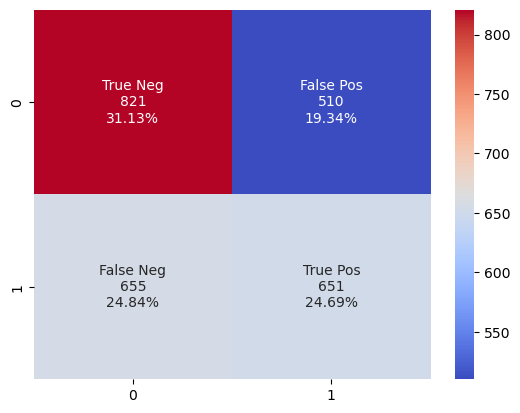

In [211]:
y_pred = model_logreg_tun.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

### KNN

In [212]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [213]:
from sklearn.neighbors import KNeighborsClassifier  #import knn from sklearn
knn = KNeighborsClassifier()                        #initialize algorithm with specified name model
knn.fit(X_train, y_train)                           #fit algorithm with train data
eval_classification(knn, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.550
Precision (Test Set): 0.550
Recall (Test Set): 0.509
F1-Score (Test Set): 0.529
AUC (Test Set) : 0.570
Average Precision (Test Set) : 0.572
 
Train Data Evaluation:
Accuracy (Train Set): 0.710
Precision (Train Set): 0.725
Recall (Train Set): 0.668
F1-Score (Train Set): 0.696
AUC (Train Set) : 0.781
Average Precision (Train Set) : 0.749


### Hyperparameter KNN

In [214]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [215]:
#list of hyperparameter
n_neighbors = list(range(1,51))
p=[1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

#init model
knn_model = KNeighborsClassifier()
knn_model_tun = RandomizedSearchCV(knn_model, hyperparameters, cv=5, random_state=42, scoring='recall')

#fit model & evaluation
knn_model_tun.fit(X_train, y_train)
eval_classification(knn_model_tun, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.547
Precision (Test Set): 0.552
Recall (Test Set): 0.449
F1-Score (Test Set): 0.496
AUC (Test Set) : 0.572
Average Precision (Test Set) : 0.626
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [216]:
# best param
knn_model_tun.best_params_

{'weights': 'distance', 'p': 2, 'n_neighbors': 15, 'algorithm': 'auto'}

<Axes: >

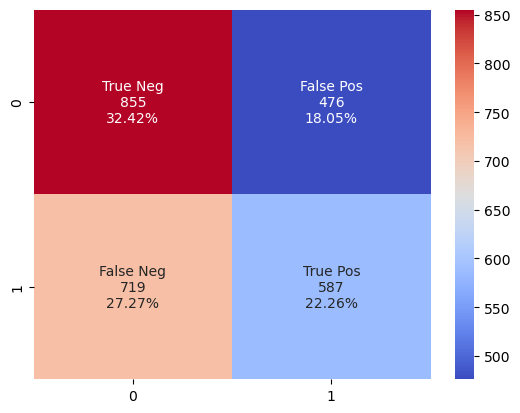

In [217]:
y_pred = knn_model_tun.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

### Random Forest

In [218]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [219]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
eval_classification(model_rf, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.577
Precision (Test Set): 0.592
Recall (Test Set): 0.469
F1-Score (Test Set): 0.523
AUC (Test Set) : 0.616
Average Precision (Test Set) : 0.667
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


### Hyperparameter RF

In [220]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [221]:
hyperparameters_rf = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], #the number of features to consider when looking for the best split
                       n_jobs = [-1] #the number of jobs to run in parallel computation. -1 means using all processors
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters_rf, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_train,y_train)
eval_classification(rf_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.581
Precision (Test Set): 0.598
Recall (Test Set): 0.470
F1-Score (Test Set): 0.527
AUC (Test Set) : 0.609
Average Precision (Test Set) : 0.669
 
Train Data Evaluation:
Accuracy (Train Set): 0.998
Precision (Train Set): 0.999
Recall (Train Set): 0.998
F1-Score (Train Set): 0.998
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [222]:
# best param
rf_tuned.best_params_

{'n_jobs': -1,
 'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 110,
 'criterion': 'gini',
 'bootstrap': True}

<Axes: >

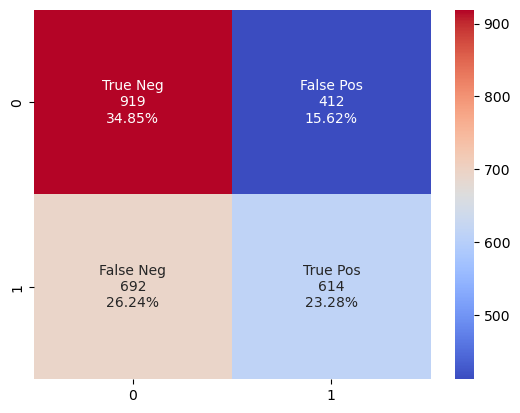

In [223]:
y_pred = rf_tuned.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

### Decision Tree

In [224]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [225]:
from sklearn.tree import DecisionTreeClassifier       #import decision tree from sklearn
dt = DecisionTreeClassifier(random_state=42)     #initialize algorithm with specified name model
dt.fit(X_train, y_train)                         #fit algorithm with train data
eval_classification(dt, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.568
Precision (Test Set): 0.562
Recall (Test Set): 0.573
F1-Score (Test Set): 0.568
AUC (Test Set) : 0.568
Average Precision (Test Set) : 0.534
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


### Hyperparameter DT

In [226]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [227]:
#list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] #maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 200] #minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 100] #minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] #number of features to consider at every split
criterion = ['gini', 'entropy'] #the function to measure the quality of a split
splitter = ['best', 'random'] #the strategy used to choose the split at each node

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

#initiate model
dt = DecisionTreeClassifier(random_state=42)
dt_tun = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
dt_tun.fit(X_train, y_train) #fit model

eval_classification(dt_tun, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.551
Precision (Test Set): 0.547
Recall (Test Set): 0.550
F1-Score (Test Set): 0.548
AUC (Test Set) : 0.551
Average Precision (Test Set) : 0.524
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [228]:
# best param
dt_tun.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 94,
 'criterion': 'gini'}

<Axes: >

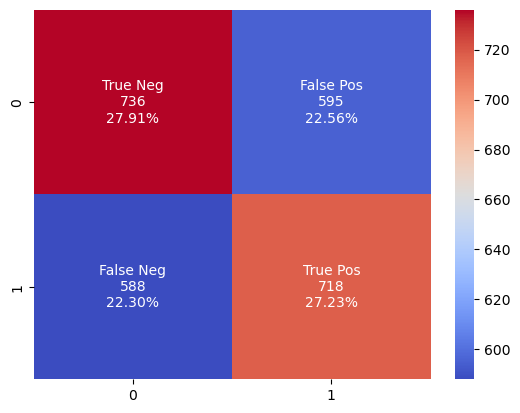

In [229]:
y_pred = dt_tun.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

### XGBoost

In [230]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [231]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
eval_classification(model_xgb, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.559
Precision (Test Set): 0.566
Recall (Test Set): 0.472
F1-Score (Test Set): 0.515
AUC (Test Set) : 0.600
Average Precision (Test Set) : 0.665
 
Train Data Evaluation:
Accuracy (Train Set): 0.892
Precision (Train Set): 0.932
Recall (Train Set): 0.844
F1-Score (Train Set): 0.886
AUC (Train Set) : 0.966
Average Precision (Train Set) : 0.967


### Hyperparameter XGB

In [232]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [233]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, random_state=42, cv=5, scoring='recall')
xg_tuned.fit(X_train,y_train)
eval_classification(xg_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.564
Precision (Test Set): 0.566
Recall (Test Set): 0.518
F1-Score (Test Set): 0.541
AUC (Test Set) : 0.599
Average Precision (Test Set) : 0.661
 
Train Data Evaluation:
Accuracy (Train Set): 0.986
Precision (Train Set): 0.992
Recall (Train Set): 0.980
F1-Score (Train Set): 0.986
AUC (Train Set) : 0.999
Average Precision (Train Set) : 0.999


In [234]:
# best param
xg_tuned.best_params_

{'tree_method': 'auto',
 'min_child_weight': 6,
 'max_depth': 60,
 'lambda': 0.6000000000000001,
 'gamma': 0.4,
 'eta': 0.3535353535353536,
 'colsample_bytree': 0.6000000000000001,
 'alpha': 0.6000000000000001}

<Axes: >

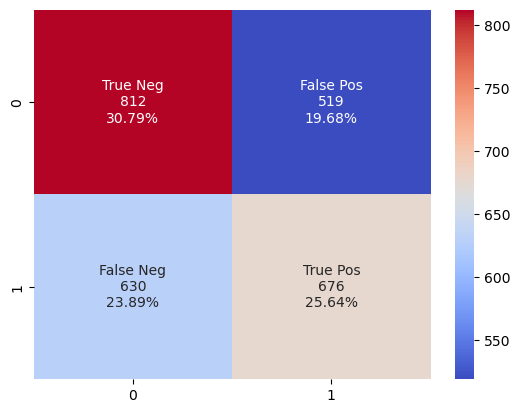

In [235]:
y_pred = xg_tuned.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

### AdaBoost

In [236]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [237]:
model_ab = AdaBoostClassifier()
model_ab.fit(X_train,y_train)
eval_classification(model_ab, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.593
Precision (Test Set): 0.644
Recall (Test Set): 0.400
F1-Score (Test Set): 0.493
AUC (Test Set) : 0.625
Average Precision (Test Set) : 0.674
 
Train Data Evaluation:
Accuracy (Train Set): 0.605
Precision (Train Set): 0.657
Recall (Train Set): 0.423
F1-Score (Train Set): 0.515
AUC (Train Set) : 0.638
Average Precision (Train Set) : 0.686


### Hyperparameter AdaBoost

In [238]:
# train test split
X = df_remot.drop(columns=["Reached.on.Time_Y.N", "Customer_care_calls", "Cost_of_the_Product", "Prior_purchases", "Product_importance_num", "Discount_offered", "Weight_in_gms"])
y = df_remot['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [239]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)
eval_classification(ab_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.591
Precision (Test Set): 0.628
Recall (Test Set): 0.428
F1-Score (Test Set): 0.509
AUC (Test Set) : 0.602
Average Precision (Test Set) : 0.589
 
Train Data Evaluation:
Accuracy (Train Set): 0.590
Precision (Train Set): 0.626
Recall (Train Set): 0.428
F1-Score (Train Set): 0.508
AUC (Train Set) : 0.601
Average Precision (Train Set) : 0.589


In [240]:
# best param
ab_tuned.best_params_

{'n_estimators': 1842,
 'learning_rate': 0.09154271356783919,
 'algorithm': 'SAMME'}

<Axes: >

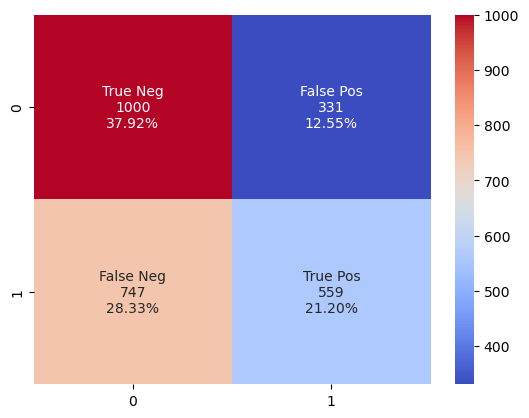

In [241]:
y_pred = ab_tuned.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='coolwarm')

## 4. Data dengan Z-Score Outlier Handling

In [242]:
df_zs = df.copy()

df_zs.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  ...  norm_Discount_offered  norm_Weight_in_gms  \
0                44  ...               0.671875            0.033893   
1                59  ...               0.906250            0.304894   
2                48  ...               0.734375            0.346676   
3                10  ...               0.140625            0.025712   
4                46  ...               0.703125            0.216654   

  std_Customer_care_calls std_Cost_of_the_Product  std_Prior_purchases  \
0               -0.047711               -0.690722            -0.372735   
1               -0.047711                0.120746            -1.029424   
2               -1.799887               -0.565881             0.283954   
3               -0.923799               -0.711529             0.283954   
4               -1.799887               -0.545074            -0.372735   

   std_Discount_offered  std_Weight_in_gms  log_Discount_offered  \
0              1.889983          -1.468240              3.784190   
1              2.815636          -0.333893              4.077537   
2              2.136824          -0.159002              3.871201   
3             -0.208162          -1.502484              2.302585   
4              2.013404          -0.703244              3.828641   

   log_Prior_purchases  rts_Weight_in_gms  
0             1.098612          35.114100  
1             0.693147          55.569776  
2             1.386294          58.086143  
3             1.386294          34.307434  
4             1.098612          49.839743  

[5 rows x 37 columns]

In [243]:
df_zs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10999 non-null  int64  
 1   Warehouse_block           10999 non-null  object 
 2   Mode_of_Shipment          10999 non-null  object 
 3   Customer_care_calls       10999 non-null  int64  
 4   Customer_rating           10999 non-null  int64  
 5   Cost_of_the_Product       10999 non-null  int64  
 6   Prior_purchases           10999 non-null  int64  
 7   Product_importance        10999 non-null  object 
 8   Gender                    10999 non-null  object 
 9   Discount_offered          10999 non-null  int64  
 10  Weight_in_gms             10999 non-null  int64  
 11  Reached.on.Time_Y.N       10999 non-null  int64  
 12  Customer_rating_category  10999 non-null  object 
 13  Reached_on_Time_cat       10999 non-null  object 
 14  Gender

In [244]:
#classify column/variable based on it's types
integer = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

In [245]:
#model evaluation automatization function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score #import evaluation matrix from sklearn

def eval_classification(model, Xtrain, Ytrain, Xtest, Ytest):                 #define a model evaluation function
    print("Test Data Evaluation:")
    Ypred = model.predict(Xtest)                                              #predict Y using testing data
    print("Accuracy (Test Set): %.3f" % accuracy_score(Ytest, Ypred))         #accuracy score
    print("Precision (Test Set): %.3f" % precision_score(Ytest, Ypred))       #precision score
    print("Recall (Test Set): %.3f" % recall_score(Ytest, Ypred))             #recall score
    print("F1-Score (Test Set): %.3f" % f1_score(Ytest, Ypred))               #f1 score
    
    Ypred_proba = model.predict_proba(Xtest)                                                          #predict Y (probability) using testing data 
    print("AUC (Test Set) : %.3f" % roc_auc_score(Ytest, Ypred_proba[:, 1]))                          #roc auc score
    print("Average Precision (Test Set) : %.3f" % average_precision_score(Ytest, Ypred_proba[:, 1]))  #average precision score
    print(" ")
    
    print("Train Data Evaluation:")
    Ypred_train = model.predict(Xtrain)                                          #predict Y using training data
    print("Accuracy (Train Set): %.3f" % accuracy_score(Ytrain, Ypred_train))    #accuracy score
    print("Precision (Train Set): %.3f" % precision_score(Ytrain, Ypred_train))  #precision score
    print("Recall (Train Set): %.3f" % recall_score(Ytrain, Ypred_train))        #recall score
    print("F1-Score (Train Set): %.3f" % f1_score(Ytrain, Ypred_train))          #f1 score
    
    Ypred_train_proba = model.predict_proba(Xtrain)                                                            #predict Y (probability) using training data
    print("AUC (Train Set) : %.3f" % roc_auc_score(Ytrain, Ypred_train_proba[:, 1]))                           #roc auc score
    print("Average Precision (Train Set) : %.3f" % average_precision_score(Ytrain, Ypred_train_proba[:, 1]))

In [246]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [247]:
#filter outliers using z-score
from scipy import stats

print(f'Jumlah baris sebelum outlier dihilangkan: {len(df_zs)}')

filtered_entries = np.array([True] * len(df_zs))

for column in integer:
    zscore = abs(stats.zscore(df_zs[column])) #count absolute z-score
    filtered_entries = (zscore < 3) & filtered_entries # keep sample with absolute z-score < 3
    
df_outlierhandling_z = df_zs[filtered_entries] #create a new data frame with filter

print(f'Jumlah baris setelah memfilter outlier: {len(df_outlierhandling_z)}')

Jumlah baris sebelum outlier dihilangkan: 10999
Jumlah baris setelah memfilter outlier: 10642


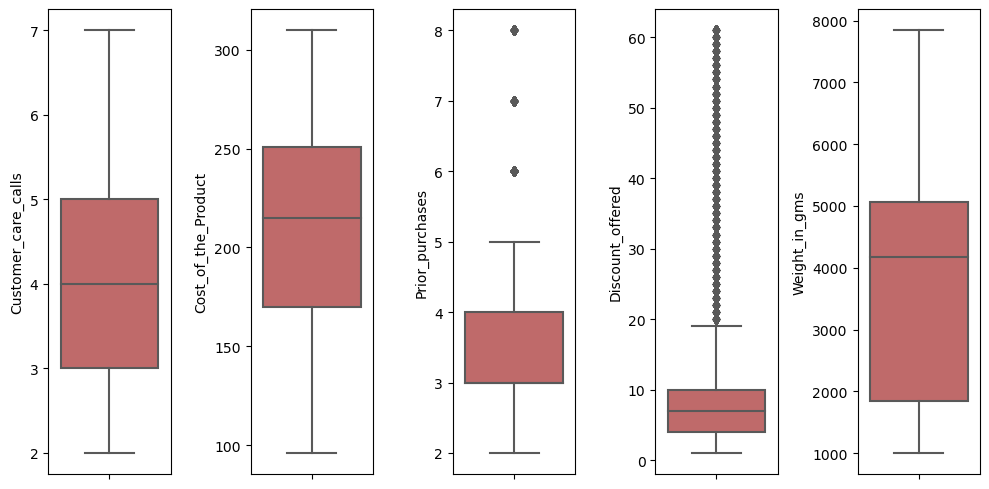

In [248]:
#boxplot after filter
features = integer
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling_z[features[i]], color='indianred', orient='v')
  plt.tight_layout()

**Split Train and Test**

In [249]:
#define feature(X) and target(Y)
X = df_outlierhandling_z.drop(columns=['ID',
                                       'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Customer_rating_category', 'Reached_on_Time_cat',
                                       'norm_Customer_care_calls', 'norm_Cost_of_the_Product', 'norm_Prior_purchases', 'norm_Discount_offered', 'norm_Weight_in_gms',
                                       'std_Customer_care_calls', 'std_Cost_of_the_Product', 'std_Prior_purchases', 'std_Discount_offered', 'std_Weight_in_gms',
                                       'log_Discount_offered', 'log_Prior_purchases', 'rts_Weight_in_gms', 'Reached.on.Time_Y.N'])

Y = df_outlierhandling_z['Reached.on.Time_Y.N'] #target/label

#splitting the data into train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state = 42)

### Logistic Regression

In [250]:
from sklearn.linear_model import LogisticRegression  #import logistic regression from sklearn
logreg = LogisticRegression(random_state=42)         #initialize algorithm with specified name model
logreg.fit(X_train, Y_train)                         #fit algorithm with train data
Y_pred = logreg.predict(X_test)                      #predict Y using testing data

In [251]:
#confussion matrix
from sklearn.metrics import confusion_matrix #import package from sklearn
confusion_matrix(Y_test, Y_pred)             #see confusion matrix

array([[ 759,  549],
       [ 668, 1217]], dtype=int64)

In [252]:
#call model evaluation function
eval_classification(logreg, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.619
Precision (Test Set): 0.689
Recall (Test Set): 0.646
F1-Score (Test Set): 0.667
AUC (Test Set) : 0.702
Average Precision (Test Set) : 0.822
 
Train Data Evaluation:
Accuracy (Train Set): 0.634
Precision (Train Set): 0.700
Recall (Train Set): 0.664
F1-Score (Train Set): 0.681
AUC (Train Set) : 0.712
Average Precision (Train Set) : 0.827


### Hyperparameter LR

In [253]:
#hyperparameter tuning (using random search)

from sklearn.model_selection import RandomizedSearchCV

#tested hyperparameters list
penalty = ['l2','l1', 'elasticnet']
C = [0.0001, 0.001, 0.002] #inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

#initiate model
lr = LogisticRegression(random_state=42) #init Logres dengan Gridsearch, cross validation = 5
rs = RandomizedSearchCV(lr, hyperparameters, cv=5, random_state=42, scoring='recall')

#fit model & evaluation
rs.fit(X_train, Y_train)
Y_pred = rs.predict(X_test)

eval_classification(rs, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.624
Precision (Test Set): 0.689
Recall (Test Set): 0.660
F1-Score (Test Set): 0.675
AUC (Test Set) : 0.706
Average Precision (Test Set) : 0.823
 
Train Data Evaluation:
Accuracy (Train Set): 0.630
Precision (Train Set): 0.694
Recall (Train Set): 0.668
F1-Score (Train Set): 0.681
AUC (Train Set) : 0.709
Average Precision (Train Set) : 0.824


In [254]:
#best hyperparameter? (using random search)
print('Best penalty:', rs.best_estimator_.get_params()['penalty'])
print('Best C:', rs.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.0001


### KNN

In [255]:
from sklearn.neighbors import KNeighborsClassifier  #import knn from sklearn
knn = KNeighborsClassifier()                        #initialize algorithm with specified name model
knn.fit(X_train, Y_train)                           #fit algorithm with train data
Y_pred = knn.predict(X_test)                        #predict Y using testing data 

In [256]:
#confussion matrix
from sklearn.metrics import confusion_matrix #import package from sklearn
confusion_matrix(Y_test, Y_pred)             #see confusion matrix

array([[ 786,  522],
       [ 614, 1271]], dtype=int64)

In [257]:
#call model evaluation function
eval_classification(knn, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.644
Precision (Test Set): 0.709
Recall (Test Set): 0.674
F1-Score (Test Set): 0.691
AUC (Test Set) : 0.719
Average Precision (Test Set) : 0.800
 
Train Data Evaluation:
Accuracy (Train Set): 0.778
Precision (Train Set): 0.834
Recall (Train Set): 0.781
F1-Score (Train Set): 0.806
AUC (Train Set) : 0.864
Average Precision (Train Set) : 0.891


### Hyperparameter KNN

In [258]:
#hyperparameter tuning (using random search)

#list of hyperparameter
n_neighbors = list(range(1,51))
p=[1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

#init model
kn = KNeighborsClassifier()
rs = RandomizedSearchCV(kn, hyperparameters, cv=5, random_state=42, scoring='recall')

#fit model & evaluation
rs.fit(X_train, Y_train)
Y_pred = rs.predict(X_test)
eval_classification(rs, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.642
Precision (Test Set): 0.719
Recall (Test Set): 0.646
F1-Score (Test Set): 0.681
AUC (Test Set) : 0.725
Average Precision (Test Set) : 0.837
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [259]:
#best hyperparameter? (using random search)
print('Best n_neighbors:', rs.best_estimator_.get_params()['n_neighbors'])
print('Best p:', rs.best_estimator_.get_params()['p'])
print('Best algorithm:', rs.best_estimator_.get_params()['algorithm'])
print('weights:', rs.best_estimator_.get_params()['weights'])

Best n_neighbors: 15
Best p: 2
Best algorithm: auto
weights: distance


### Decision Tree

In [260]:
from sklearn.tree import DecisionTreeClassifier       #import decision tree from sklearn
dectree = DecisionTreeClassifier(random_state=42)     #initialize algorithm with specified name model
dectree.fit(X_train, Y_train)                         #fit algorithm with train data
Y_pred = dectree.predict(X_test)                      #predict Y using testing data

In [261]:
#confussion matrix
from sklearn.metrics import confusion_matrix #import package from sklearn
confusion_matrix(Y_test, Y_pred)             #see confusion matrix

array([[ 697,  611],
       [ 543, 1342]], dtype=int64)

In [262]:
#call model evaluation function
eval_classification(dectree, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.639
Precision (Test Set): 0.687
Recall (Test Set): 0.712
F1-Score (Test Set): 0.699
AUC (Test Set) : 0.622
Average Precision (Test Set) : 0.659
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


### Hyperparameter DT

In [263]:
#hyperparameter tuning (using random search)
from sklearn.model_selection import RandomizedSearchCV

#list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] #maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 200] #minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 100] #minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] #number of features to consider at every split
criterion = ['gini', 'entropy'] #the function to measure the quality of a split
splitter = ['best', 'random'] #the strategy used to choose the split at each node

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

#initiate model
dt = DecisionTreeClassifier(random_state=42)
rs = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
rs.fit(X_train, Y_train) #fit model

#predict & evaluation
Y_pred = rs.predict(X_test)
eval_classification(rs, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.625
Precision (Test Set): 0.678
Recall (Test Set): 0.694
F1-Score (Test Set): 0.686
AUC (Test Set) : 0.609
Average Precision (Test Set) : 0.651
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [264]:
#best hyperparameter? (using random search)
print('Best max_depth:', rs.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', rs.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', rs.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', rs.best_estimator_.get_params()['max_features'])
print('Best criterion:', rs.best_estimator_.get_params()['criterion'])
print('Best splitter:', rs.best_estimator_.get_params()['splitter'])

Best max_depth: 94
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: log2
Best criterion: gini
Best splitter: best


### Random Forest

In [265]:
from sklearn.ensemble import RandomForestClassifier    #import random forrest from sklearn
ranfor = RandomForestClassifier(random_state=42)       #initialize algorithm with specified name model
ranfor.fit(X_train, Y_train)                           #fit algorithm with train data

Y_pred = ranfor.predict(X_test)                        #predict Y using testing data 

In [266]:
eval_classification(ranfor, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.647
Precision (Test Set): 0.743
Recall (Test Set): 0.614
F1-Score (Test Set): 0.673
AUC (Test Set) : 0.720
Average Precision (Test Set) : 0.836
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


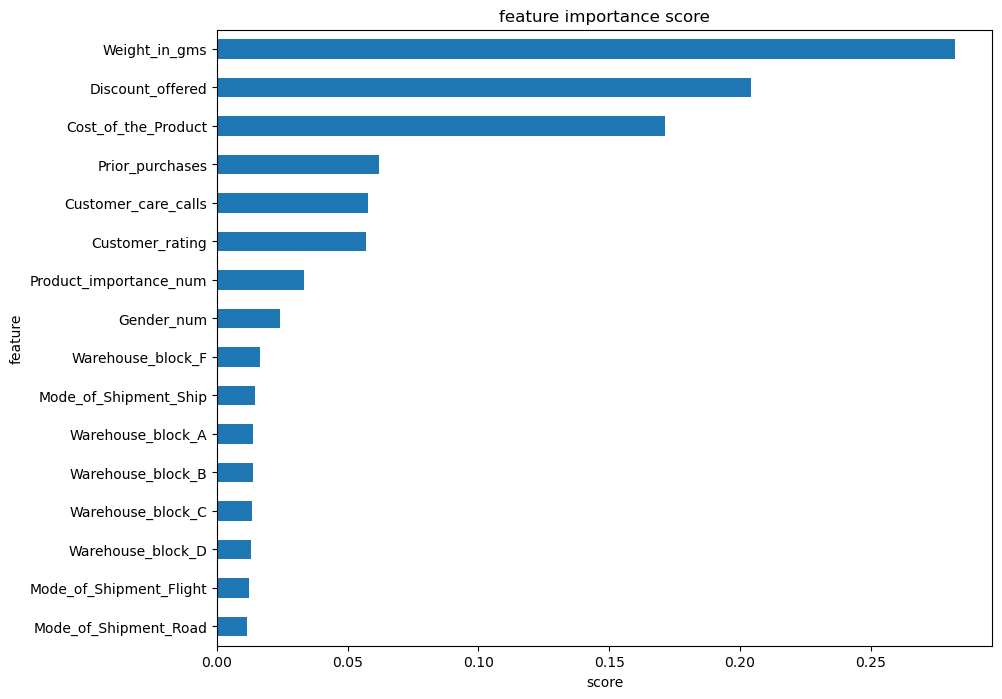

In [267]:
show_feature_importance(ranfor)

### Hyperparameter Random Forest

In [268]:
#List Hyperparameters
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], #total subtree 
                       bootstrap = [True], #use bootstrapping or no
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  #maximum depth of the tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], #total node minimum samples required for new leaf splitting
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], #total leaf minimum samples to form a new leaf
                       max_features = ['auto', 'sqrt', 'log2'], #the number of features to consider when looking for the best split
                       n_jobs = [-1], #the number of jobs to run in parallel computation. -1 means using all processors
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rs.fit(X_train,Y_train)

#predict & evaluation
Y_pred = rs.predict(X_test)
eval_classification(rs, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.649
Precision (Test Set): 0.746
Recall (Test Set): 0.616
F1-Score (Test Set): 0.675
AUC (Test Set) : 0.721
Average Precision (Test Set) : 0.838
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [269]:
#best hyperparameter? (using random search)
print('n_estimators:', rs.best_estimator_.get_params()['n_estimators'])
print('bootstrap:', rs.best_estimator_.get_params()['bootstrap'])
print('criterion:', rs.best_estimator_.get_params()['criterion'])
print('max_depth:', rs.best_estimator_.get_params()['max_depth'])
print('min_samples_split:', rs.best_estimator_.get_params()['min_samples_split'])
print('min_samples_leaf:', rs.best_estimator_.get_params()['min_samples_leaf'])
print('max_features:', rs.best_estimator_.get_params()['max_features'])
print('n_jobs:', rs.best_estimator_.get_params()['n_jobs'])

n_estimators: 400
bootstrap: True
criterion: gini
max_depth: 110
min_samples_split: 4
min_samples_leaf: 1
max_features: log2
n_jobs: -1


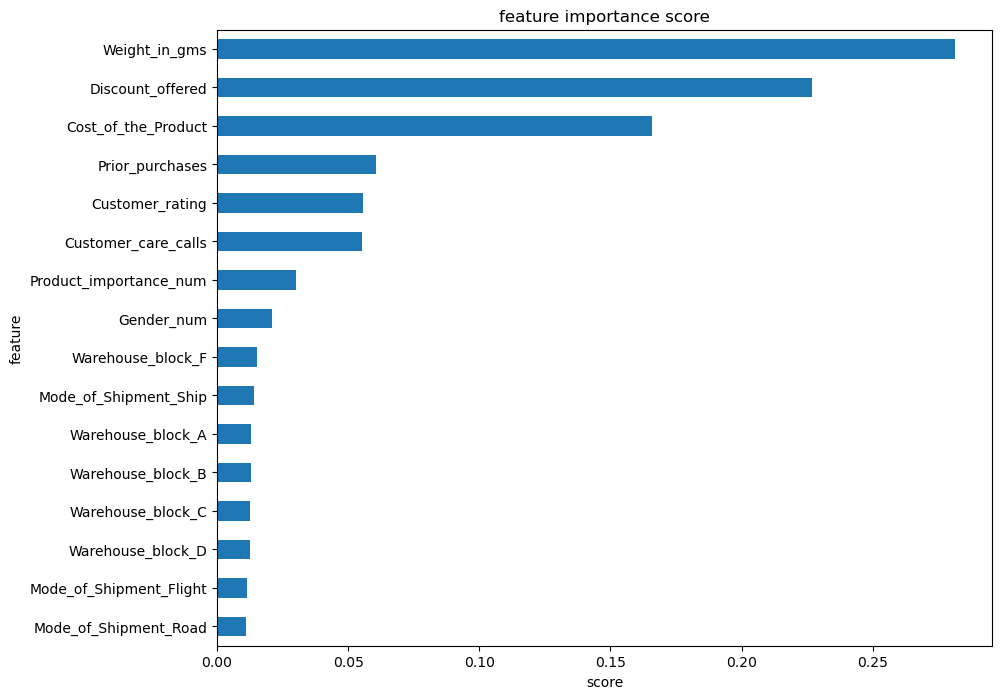

In [270]:
show_feature_importance(rs.best_estimator_)

### AdaBoost

In [271]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,Y_train)

Y_pred = ab.predict(X_test)

In [272]:
eval_classification(ab, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.663
Precision (Test Set): 0.783
Recall (Test Set): 0.594
F1-Score (Test Set): 0.675
AUC (Test Set) : 0.734
Average Precision (Test Set) : 0.843
 
Train Data Evaluation:
Accuracy (Train Set): 0.683
Precision (Train Set): 0.808
Recall (Train Set): 0.606
F1-Score (Train Set): 0.693
AUC (Train Set) : 0.757
Average Precision (Train Set) : 0.856


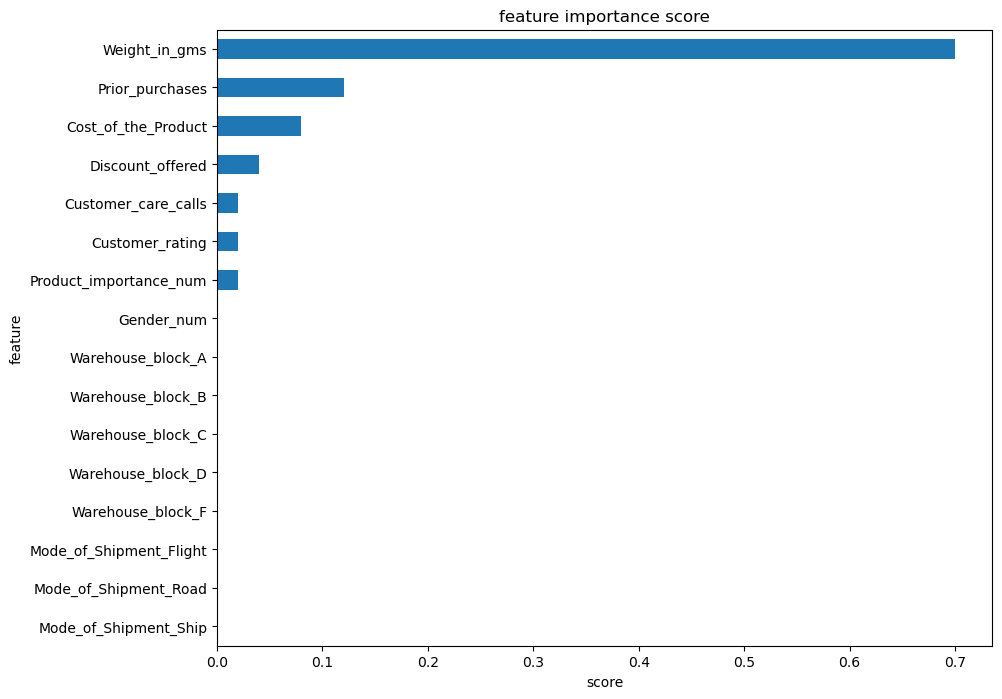

In [273]:
show_feature_importance(ab)

### Hyperparameter AdaBoost

In [274]:
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
adb = AdaBoostClassifier(random_state=42)
rs = RandomizedSearchCV(adb, hyperparameters, random_state=42, cv=5, scoring='recall')
rs.fit(X_train, Y_train)

# Predict & Evaluation
Y_pred = rs.predict(X_test)#Check performa dari model
eval_classification(rs, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.666
Precision (Test Set): 0.767
Recall (Test Set): 0.623
F1-Score (Test Set): 0.688
AUC (Test Set) : 0.731
Average Precision (Test Set) : 0.837
 
Train Data Evaluation:
Accuracy (Train Set): 0.671
Precision (Train Set): 0.781
Recall (Train Set): 0.616
F1-Score (Train Set): 0.689
AUC (Train Set) : 0.747
Average Precision (Train Set) : 0.847


In [275]:
#best hyperparameter? (using random search)
print('n_estimators:', rs.best_estimator_.get_params()['n_estimators'])
print('learning_rate:', rs.best_estimator_.get_params()['learning_rate'])
print('algorithm:', rs.best_estimator_.get_params()['algorithm'])

n_estimators: 100
learning_rate: 0.09478947368421052
algorithm: SAMME.R


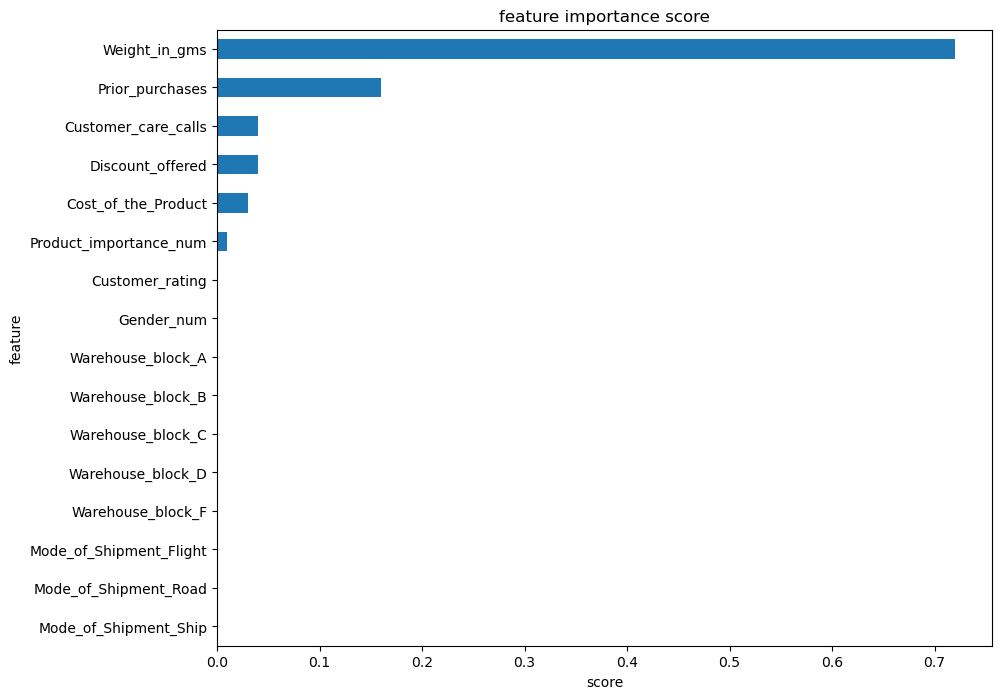

In [276]:
show_feature_importance(rs.best_estimator_)

### XGBoost

In [277]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, Y_train)

Y_pred = xg.predict(X_test)

In [278]:
eval_classification(xg, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.643
Precision (Test Set): 0.725
Recall (Test Set): 0.637
F1-Score (Test Set): 0.678
AUC (Test Set) : 0.721
Average Precision (Test Set) : 0.838
 
Train Data Evaluation:
Accuracy (Train Set): 0.923
Precision (Train Set): 0.967
Recall (Train Set): 0.901
F1-Score (Train Set): 0.933
AUC (Train Set) : 0.982
Average Precision (Train Set) : 0.988


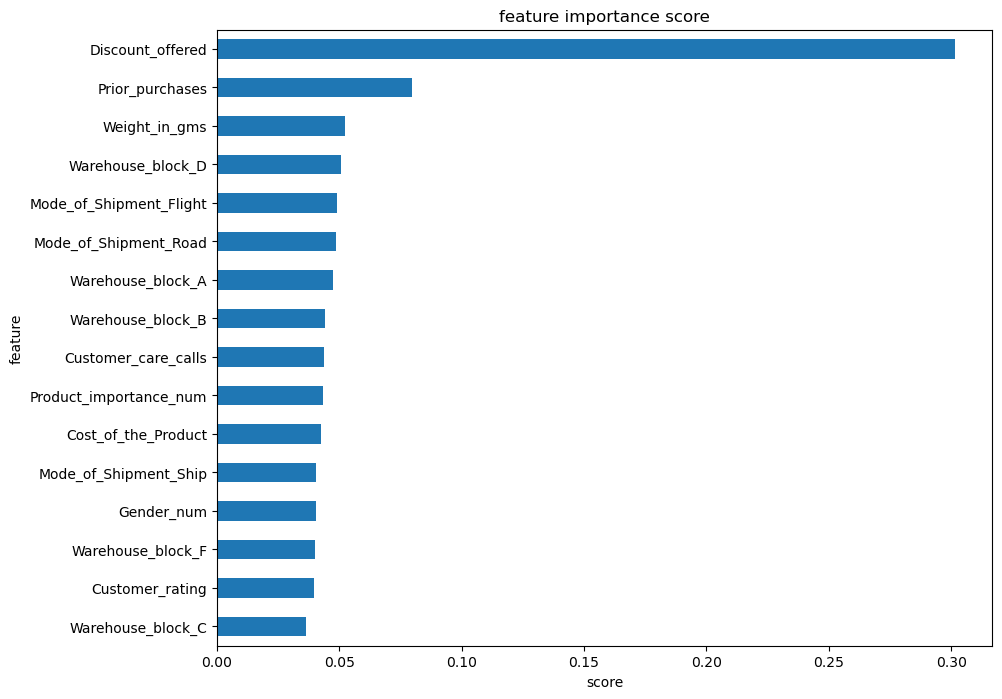

In [279]:
show_feature_importance(xg)

In [280]:
### Hyperparameter XGBoost

In [281]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xgb = XGBClassifier(random_state=42)
rs = RandomizedSearchCV(xgb, hyperparameters, cv=5, random_state=42, scoring='recall')
rs.fit(X_train, Y_train)

# Predict & Evaluation
Y_pred = rs.predict(X_test)#Check performa dari model
eval_classification(rs, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.639
Precision (Test Set): 0.696
Recall (Test Set): 0.690
F1-Score (Test Set): 0.693
AUC (Test Set) : 0.720
Average Precision (Test Set) : 0.837
 
Train Data Evaluation:
Accuracy (Train Set): 0.700
Precision (Train Set): 0.751
Recall (Train Set): 0.736
F1-Score (Train Set): 0.743
AUC (Train Set) : 0.788
Average Precision (Train Set) : 0.875


In [282]:
#best hyperparameter? (using random search)
print('max_depth:', rs.best_estimator_.get_params()['max_depth'])
print('min_child_weight:', rs.best_estimator_.get_params()['min_child_weight'])
print('gamma:', rs.best_estimator_.get_params()['gamma'])
print('tree_method:', rs.best_estimator_.get_params()['tree_method'])
print('colsample_bytree:', rs.best_estimator_.get_params()['colsample_bytree'])
print('eta:', rs.best_estimator_.get_params()['eta'])
print('lambda:', rs.best_estimator_.get_params()['lambda'])
print('alpha:', rs.best_estimator_.get_params()['alpha'])

max_depth: 90
min_child_weight: 6
gamma: 0.4
tree_method: hist
colsample_bytree: 0.1
eta: 0.13131313131313133
lambda: 0.0
alpha: 0.30000000000000004


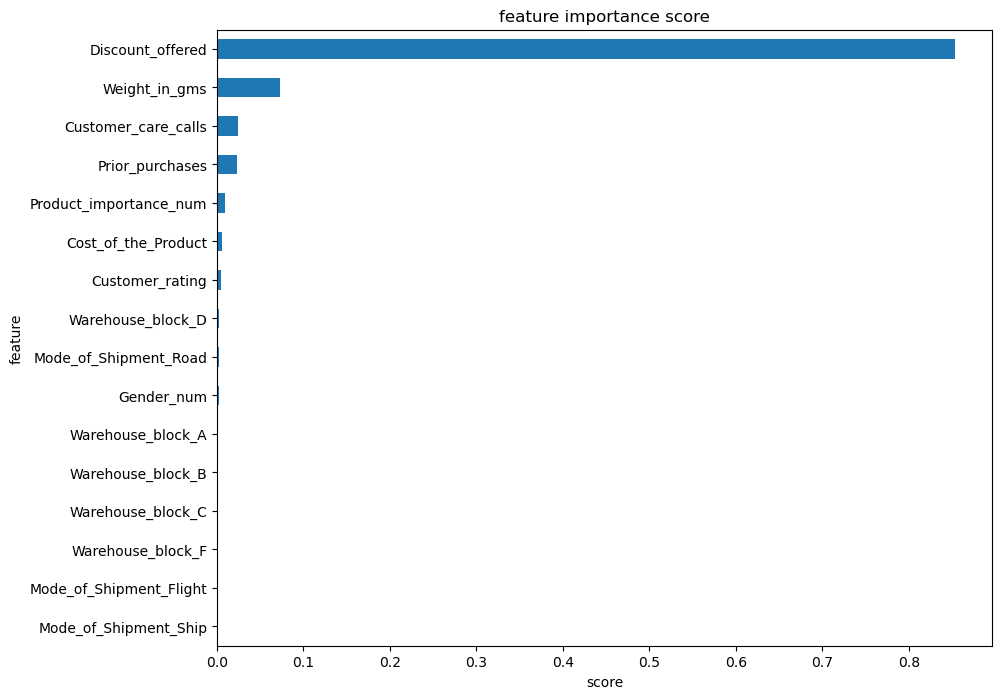

In [283]:
show_feature_importance(rs.best_estimator_)

# Business Recommendation

In [284]:
df_final = pd.read_csv('Train.csv')
df_final.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [285]:
#On Time Rate Growth Calculation 
Total = df_final['ID'].count()
Late =  df_final[df_final['Reached.on.Time_Y.N']==1]['ID'].count()
OnTime =  df_final[df_final['Reached.on.Time_Y.N']==0]['ID'].count()
PredRate = 0.767
PredLate = round(Late*PredRate)
PredOnTime = Late-PredLate

print('----- Existing -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print()
print('----- After Modeling -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('  Predicted Late : \t', round(PredLate), ',', round(PredLate/Late*100,1),'%')
print('  Predicted On Time : \t', round(PredOnTime), ',', round(PredOnTime/Late*100,1),'%')
print('Late After Pred : \t', Late-PredLate, ',', round((Late-PredLate)/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print('On Time After Pred : \t', OnTime+PredLate, ',', round((OnTime+PredLate)/Total*100,1)*0.95,'%')
print('On Time Growth rate : \t', round(((((OnTime+PredLate)*0.95)-OnTime)/((OnTime + PredLate) * 0.95))*100,1), '%')

----- Existing -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
On Time : 		 4436 , 40.3 %

----- After Modeling -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
  Predicted Late : 	 5034 , 76.7 %
  Predicted On Time : 	 1529 , 23.3 %
Late After Pred : 	 1529 , 13.9 %
On Time : 		 4436 , 40.3 %
On Time After Pred : 	 9470 , 81.79499999999999 %
On Time Growth rate : 	 50.7 %


# Hypotesis Testing

**Does discount_offered affect reached.on.time_y.n or not?**

H0 : discount_offered NOT affect the reached.on.time_y.n (have the same average discount value)

H1 : discount_offered affect the reached.on.time_y.n (have a significantly different mean value)

In [289]:
# Grouping data in column reached.on.time_y.n
df_ontime = df[df['Reached.on.Time_Y.N'] == 0]
df_late = df[df['Reached.on.Time_Y.N'] == 1]

In [290]:
# calculate the mean or average discount_offered in each group of data columns reached.on.time_y.n
df.groupby(['Reached.on.Time_Y.N'])['Discount_offered'].mean()

Reached.on.Time_Y.N
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64

In [292]:
# calculate the mean or middle value discount_offered in each group of data columns reached.on.time_y.n
df.groupby(['Reached.on.Time_Y.N'])['Discount_offered'].median()

Reached.on.Time_Y.N
0    6.0
1    9.0
Name: Discount_offered, dtype: float64

In [293]:
# calculate the P-Value of each data set in the reached.on.time_y.n column
disc_pvalue = st.f_oneway(df_ontime['Discount_offered'],
                          df_late['Discount_offered']).pvalue
disc_pvalue

0.0

In [294]:
if disc_pvalue > 0.05:
    print('Not enough evidence to suggest that differences in discount_offered affect reached.on.time_y.n (Accepts H0)')
else:
    print('The results of the hypothesis test state that discount_offered has a significant effect on reached.on.time_y.n (Rejects H0)')

The results of the hypothesis test state that discount_offered has a significant effect on reached.on.time_y.n (Rejects H0)
